In [560]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, cross_validate
import sklearn, sklearn.metrics
import statsmodels.formula.api as smf
import sklearn
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
import seaborn as sns
import math
from sklearn.model_selection import RandomizedSearchCV
import datetime
import xgboost as xgb

from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
import lightgbm as lgb

In [561]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import FloatSlider

In [2]:
training_data=pd.read_csv("C:/Users/yuka.abe/Desktop/Untitled Folder/Housing Price Prediction Project/train.csv")
testing_data=pd.read_csv("C:/Users/yuka.abe/Desktop/Untitled Folder/Housing Price Prediction Project/test.csv")

# Define all the functions:

# Below are the functions for data transformation:

In [3]:
def func_variable_log_transformation(dataset):
    #define the list of variables to transform:
    variables_to_transform=['MiscVal',
     'PoolArea',
     'LotArea',
     '3SsnPorch',
     'LowQualFinSF',
     #'KitchenAbvGr', # this is number of kitchen
     'BsmtFinSF2',
     'ScreenPorch',
     #'BsmtHalfBath', # this is number of half baths
     'EnclosedPorch',
     'MasVnrArea',
     'OpenPorchSF',
     'WoodDeckSF',
     'GrLivArea',
     'SalePrice']
    
    dataset1=dataset.copy()
    log_transformation_variable_list=[]
    for variable in variables_to_transform:
        print("Below is the distribution of the ", variable, " before log transformation: ")
        dataset1[variable].hist(bins=100)
        plt.xlabel(variable)
        plt.ylabel("histogram")
        plt.title(variable + " histogram before transformation")
        plt.show()

        new_variable=variable+ " log transformation"
        dataset1[new_variable] = np.log(dataset1[variable]+1)
        del dataset1[variable]

        print("Below is the distribution of the ", variable, " after log transformation: ")
        dataset1[new_variable].hist(bins=100)
        plt.xlabel(new_variable)
        plt.ylabel("histogram")
        plt.title(variable + " histogram after transformation")
        plt.show()
        
        log_transformation_variable_list.append(new_variable)
        
    return dataset1,log_transformation_variable_list
    


In [4]:
def func_variable_log_transformation_transformation_only(dataset):
    #define the list of variables to transform:
    variables_to_transform=['MiscVal',
     'PoolArea',
     'LotArea',
     '3SsnPorch',
     'LowQualFinSF',
     #'KitchenAbvGr', # this is number of kitchen
     'BsmtFinSF2',
     'ScreenPorch',
     #'BsmtHalfBath', # this is number of half baths
     'EnclosedPorch',
     'MasVnrArea',
     'OpenPorchSF',
     'WoodDeckSF',
     'GrLivArea',
     'SalePrice']
    
    dataset1=dataset.copy()
    log_transformation_variable_list=[]
    for variable in variables_to_transform:
       
        new_variable=variable+ " log transformation"
        dataset1[new_variable] = np.log(dataset1[variable]+1)
        del dataset1[variable]
        
        log_transformation_variable_list.append(new_variable)
        
    return dataset1,log_transformation_variable_list
    


In [158]:
def func_variable_log_transformation_transformation_only_dv_not_included(dataset):
    #define the list of variables to transform:
    variables_to_transform=['MiscVal',
     'PoolArea',
     'LotArea',
     '3SsnPorch',
     'LowQualFinSF',
     #'KitchenAbvGr', # this is number of kitchen
     'BsmtFinSF2',
     'ScreenPorch',
     #'BsmtHalfBath', # this is number of half baths
     'EnclosedPorch',
     'MasVnrArea',
     'OpenPorchSF',
     'WoodDeckSF',
     'GrLivArea']
    # 'SalePrice'
    
    dataset1=dataset.copy()
    log_transformation_variable_list=[]
    for variable in variables_to_transform:
       
        new_variable=variable+ " log transformation"
        dataset1[new_variable] = np.log(dataset1[variable]+1)
        del dataset1[variable]
        
        log_transformation_variable_list.append(new_variable)
        
    return dataset1,log_transformation_variable_list
    


In [5]:
def func_variable_boxcox_transformation(dataset):
    lam = 0.15
    #define the list of variables to transform:
    variables_to_transform=['MiscVal',
     'PoolArea',
     'LotArea',
     '3SsnPorch',
     'LowQualFinSF',
     #'KitchenAbvGr', # this is number of kitchen
     'BsmtFinSF2',
     'ScreenPorch',
     #'BsmtHalfBath', # this is number of half baths
     'EnclosedPorch',
     'MasVnrArea',
     'OpenPorchSF',
     'WoodDeckSF',
     'SalePrice',
     'GrLivArea']
    
    dataset1=dataset.copy()
    boxcox_transformation_variable_list=[]
    for variable in variables_to_transform:
        print("Below is the distribution of the ", variable, " before boxcox transformation: ")
        dataset1[variable].hist(bins=100)
        plt.xlabel(variable)
        plt.ylabel("histogram")
        plt.title(variable + " histogram before transformation")
        plt.show()

        new_variable=variable+ " boxcox transformation"
        dataset1[new_variable] = boxcox1p(dataset1[variable], lam)
        del dataset1[variable]

        print("Below is the distribution of the ", variable, " after boxcox transformation: ")
        dataset1[new_variable].hist(bins=100)
        plt.xlabel(new_variable)
        plt.ylabel("histogram")
        plt.title(variable + " histogram after transformation")
        plt.show()

        boxcox_transformation_variable_list.append(new_variable)
        
        
    return dataset1, boxcox_transformation_variable_list

    


In [6]:
def func_variable_boxcox_transformation_transformation_only(dataset):
    lam = 0.15
    #define the list of variables to transform:
    variables_to_transform=['MiscVal',
     'PoolArea',
     'LotArea',
     '3SsnPorch',
     'LowQualFinSF',
     #'KitchenAbvGr', # this is number of kitchen
     'BsmtFinSF2',
     'ScreenPorch',
     #'BsmtHalfBath', # this is number of half baths
     'EnclosedPorch',
     'MasVnrArea',
     'OpenPorchSF',
     'WoodDeckSF',
     'SalePrice',
     'GrLivArea']
    
    dataset1=dataset.copy()
    boxcox_transformation_variable_list=[]
    for variable in variables_to_transform:
        new_variable=variable+ " boxcox transformation"
        dataset1[new_variable] = boxcox1p(dataset1[variable], lam)
        del dataset1[variable]
        boxcox_transformation_variable_list.append(new_variable)
        
        
    return dataset1, boxcox_transformation_variable_list

    


In [159]:
def func_variable_boxcox_transformation_transformation_only_dv_not_included(dataset):
    lam = 0.15
    #define the list of variables to transform:
    variables_to_transform=['MiscVal',
     'PoolArea',
     'LotArea',
     '3SsnPorch',
     'LowQualFinSF',
     #'KitchenAbvGr', # this is number of kitchen
     'BsmtFinSF2',
     'ScreenPorch',
     #'BsmtHalfBath', # this is number of half baths
     'EnclosedPorch',
     'MasVnrArea',
     'OpenPorchSF',
     'WoodDeckSF',
     'GrLivArea']
     
    
    dataset1=dataset.copy()
    boxcox_transformation_variable_list=[]
    for variable in variables_to_transform:
        new_variable=variable+ " boxcox transformation"
        dataset1[new_variable] = boxcox1p(dataset1[variable], lam)
        del dataset1[variable]
        boxcox_transformation_variable_list.append(new_variable)
        
        
    return dataset1, boxcox_transformation_variable_list

    


# Step 1: Inputing missing data:

In [7]:
def imputation_for_missing_value(training_data):
    data=training_data
    data1=data.copy()
    
    # delete the fields that are not needed:
    del data1['Id']
    del data1['Alley']
    del data1['FireplaceQu']
    del data1['PoolQC']
    del data1['Fence']
    del data1['MiscFeature']
    
    # Fill missing value for LotFrontage with mean
    data1['LotFrontage'].fillna(data1['LotFrontage'].mean(), inplace=True)
    
    # Fill missing value with for MasVnrType with "Unknown"
    data1.loc[pd.isnull(data1['MasVnrType']), 'MasVnrType']='Unknown'
    
    # Fill missing value for MasVnrArea with 0 
    data1['MasVnrArea'].fillna(0, inplace=True)
    
    # Fill missing value for Electrical with "Unknown"
    data1.loc[pd.isnull(data1['Electrical']), 'Electrical']='Unknown'
    
    # fill missing value for basement related variable with "Unknown"
    for variable in ['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2']:
        data1.loc[pd.isnull(data1[variable]), variable]='Unknown'
        
    # fill missing value for garage related variable with "Unknown"
    for variable in ['GarageType','GarageFinish', 'GarageQual', 'GarageCond']:
        data1.loc[pd.isnull(data1[variable]), variable]='Unknown'
        
    # fill missing value GarageYrBlt with YearBuilt
    data1.loc[pd.isnull(data1['GarageYrBlt']), 'GarageYrBlt']=data1.loc[pd.isnull(data1['GarageYrBlt']), 'YearBuilt']

    return data1

# Step 2: Detect and delete the outliers:

In [8]:
def func_outlier_deletion_numercial_variables(dataset):
    dataset1=dataset.copy()
    dataset1=dataset1.loc[dataset1['GrLivArea']<=4600]
    dataset1=dataset1.loc[dataset1['GarageArea']<=1300.5]
    dataset1=dataset1.loc[dataset1['TotalBsmtSF']<=6100]
    dataset1=dataset1.loc[dataset1['BsmtFinSF1']<6110]
    dataset1=dataset1.loc[dataset1['LotFrontage']<=300]
    return dataset1

# Step 3: Encode the labels to dummy variables:

In [9]:
def func_variable_encoding(dataset):
    encoding_varaibles_list=[ 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
            'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
            'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
            'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
            'YrSold', 'MoSold', 'MSZoning',
            'LandContour',
             'Utilities',
             'LotConfig',
             'Neighborhood',
             'Condition1',
             'Condition2',
             'BldgType',
             'HouseStyle',
             'OverallQual',
             'YearBuilt',
             'YearRemodAdd',
             'RoofStyle',
             'RoofMatl',
             'Exterior1st',
             'Exterior2nd',
             'MasVnrType',
             'Foundation',
             'Heating',
             'Electrical',
             'GarageType',
             'GarageYrBlt',
             'SaleType',
             'SaleCondition']
    dataset1=dataset.copy()
    categorical_encoded_variable_list=[]
    for variable_name in encoding_varaibles_list:
        dataset1[variable_name]=dataset1[variable_name].astype('str')
        df_dummies=pd.get_dummies(dataset1[variable_name]).iloc[:,0:-1 ]
        df_dummies.columns=variable_name+'_'+df_dummies.columns
        dataset1=pd.merge(dataset1, df_dummies, left_index=True, right_index=True)
        del dataset1[variable_name]
        for column in df_dummies.columns: 
            categorical_encoded_variable_list.append(column)
    return dataset1, categorical_encoded_variable_list

# Combine step 1, 2, 3 as a single function called datacleaning_step

In [10]:
def func_data_cleaning(dataset):
    dataset_step1= imputation_for_missing_value(dataset)
    dataset_step2= func_outlier_deletion_numercial_variables(dataset_step1)
    dataset_step3, categorical_encoded_variable_list=func_variable_encoding(dataset_step2)
    
    return dataset_step3
    

In [368]:
def func_data_cleaning_without_deleteing_data(dataset):
    dataset_step1= imputation_for_missing_value(dataset)
    #dataset_step2= func_outlier_deletion_numercial_variables(dataset_step1)
    dataset_step3, categorical_encoded_variable_list=func_variable_encoding(dataset_step1)
    
    return dataset_step3
    

# Step 4: Adding features:

In [11]:
def func_adding_features(dataset):
    dataset1=dataset.copy()
    dataset1['TotalSF'] = dataset1['TotalBsmtSF'] + dataset1['1stFlrSF'] + dataset1['2ndFlrSF']  
    return dataset1
    

# Step 5: Variable transformation (log transformation & boxcox transformation)

In [12]:
def func_data_transformation(dataset, transformation_type):
    if transformation_type=='log transformation':
        transformed_data, _=func_variable_log_transformation(dataset)
    else:
        transformed_data, _=func_variable_boxcox_transformation(dataset)
    return transformed_data

In [152]:
def func_data_transformation_transformation_only(dataset, transformation_type):
    if transformation_type=='log transformation':
        transformed_data, _=func_variable_log_transformation_transformation_only(dataset)
    else:
        transformed_data, _=func_variable_boxcox_transformation_transformation_only(dataset)
    return transformed_data

In [160]:
def func_data_transformation_transformation_only_dv_not_included(dataset, transformation_type):
    if transformation_type=='log transformation':
        transformed_data, _=func_variable_log_transformation_transformation_only_dv_not_included(dataset)
    else:
        transformed_data, _=func_variable_boxcox_transformation_transformation_only_dv_not_included(dataset)
    return transformed_data

# Step 6: Scale the data by using minmax scaler

In [14]:
def func_data_scaling(dataset, scaling_type):
    
    categorical_encoded_variable_list= ['BsmtQual_Ex',
     'BsmtQual_Fa',
     'BsmtQual_Gd',
     'BsmtQual_TA',
     'BsmtCond_Fa',
     'BsmtCond_Gd',
     'BsmtCond_Po',
     'BsmtCond_TA',
     'GarageQual_Ex',
     'GarageQual_Fa',
     'GarageQual_Gd',
     'GarageQual_Po',
     'GarageQual_TA',
     'GarageCond_Ex',
     'GarageCond_Fa',
     'GarageCond_Gd',
     'GarageCond_Po',
     'GarageCond_TA',
     'ExterQual_Ex',
     'ExterQual_Fa',
     'ExterQual_Gd',
     'ExterCond_Ex',
     'ExterCond_Fa',
     'ExterCond_Gd',
     'ExterCond_Po',
     'HeatingQC_Ex',
     'HeatingQC_Fa',
     'HeatingQC_Gd',
     'HeatingQC_Po',
     'KitchenQual_Ex',
     'KitchenQual_Fa',
     'KitchenQual_Gd',
     'BsmtFinType1_ALQ',
     'BsmtFinType1_BLQ',
     'BsmtFinType1_GLQ',
     'BsmtFinType1_LwQ',
     'BsmtFinType1_Rec',
     'BsmtFinType1_Unf',
     'BsmtFinType2_ALQ',
     'BsmtFinType2_BLQ',
     'BsmtFinType2_GLQ',
     'BsmtFinType2_LwQ',
     'BsmtFinType2_Rec',
     'BsmtFinType2_Unf',
     'Functional_Maj1',
     'Functional_Maj2',
     'Functional_Min1',
     'Functional_Min2',
     'Functional_Mod',
     'Functional_Sev',
     'BsmtExposure_Av',
     'BsmtExposure_Gd',
     'BsmtExposure_Mn',
     'BsmtExposure_No',
     'GarageFinish_Fin',
     'GarageFinish_RFn',
     'GarageFinish_Unf',
     'LandSlope_Gtl',
     'LandSlope_Mod',
     'LotShape_IR1',
     'LotShape_IR2',
     'LotShape_IR3',
     'PavedDrive_N',
     'PavedDrive_P',
     'Street_Grvl',
     'CentralAir_N',
     'MSSubClass_120',
     'MSSubClass_160',
     'MSSubClass_180',
     'MSSubClass_190',
     'MSSubClass_20',
     'MSSubClass_30',
     'MSSubClass_40',
     'MSSubClass_45',
     'MSSubClass_50',
     'MSSubClass_60',
     'MSSubClass_70',
     'MSSubClass_75',
     'MSSubClass_80',
     'MSSubClass_85',
     'OverallCond_1',
     'OverallCond_2',
     'OverallCond_3',
     'OverallCond_4',
     'OverallCond_5',
     'OverallCond_6',
     'OverallCond_7',
     'OverallCond_8',
     'YrSold_2006',
     'YrSold_2007',
     'YrSold_2008',
     'YrSold_2009',
     'MoSold_1',
     'MoSold_10',
     'MoSold_11',
     'MoSold_12',
     'MoSold_2',
     'MoSold_3',
     'MoSold_4',
     'MoSold_5',
     'MoSold_6',
     'MoSold_7',
     'MoSold_8',
     'MSZoning_C (all)',
     'MSZoning_FV',
     'MSZoning_RH',
     'MSZoning_RL',
     'LandContour_Bnk',
     'LandContour_HLS',
     'LandContour_Low',
     'Utilities_AllPub',
     'LotConfig_Corner',
     'LotConfig_CulDSac',
     'LotConfig_FR2',
     'LotConfig_FR3',
     'Neighborhood_Blmngtn',
     'Neighborhood_Blueste',
     'Neighborhood_BrDale',
     'Neighborhood_BrkSide',
     'Neighborhood_ClearCr',
     'Neighborhood_CollgCr',
     'Neighborhood_Crawfor',
     'Neighborhood_Edwards',
     'Neighborhood_Gilbert',
     'Neighborhood_IDOTRR',
     'Neighborhood_MeadowV',
     'Neighborhood_Mitchel',
     'Neighborhood_NAmes',
     'Neighborhood_NPkVill',
     'Neighborhood_NWAmes',
     'Neighborhood_NoRidge',
     'Neighborhood_NridgHt',
     'Neighborhood_OldTown',
     'Neighborhood_SWISU',
     'Neighborhood_Sawyer',
     'Neighborhood_SawyerW',
     'Neighborhood_Somerst',
     'Neighborhood_StoneBr',
     'Neighborhood_Timber',
     'Condition1_Artery',
     'Condition1_Feedr',
     'Condition1_Norm',
     'Condition1_PosA',
     'Condition1_PosN',
     'Condition1_RRAe',
     'Condition1_RRAn',
     'Condition1_RRNe',
     'Condition2_Artery',
     'Condition2_Feedr',
     'Condition2_Norm',
     'Condition2_PosA',
     'Condition2_PosN',
     'Condition2_RRAe',
     'Condition2_RRAn',
     'BldgType_1Fam',
     'BldgType_2fmCon',
     'BldgType_Duplex',
     'BldgType_Twnhs',
     'HouseStyle_1.5Fin',
     'HouseStyle_1.5Unf',
     'HouseStyle_1Story',
     'HouseStyle_2.5Fin',
     'HouseStyle_2.5Unf',
     'HouseStyle_2Story',
     'HouseStyle_SFoyer',
     'OverallQual_1',
     'OverallQual_10',
     'OverallQual_2',
     'OverallQual_3',
     'OverallQual_4',
     'OverallQual_5',
     'OverallQual_6',
     'OverallQual_7',
     'OverallQual_8',
     'YearBuilt_1872',
     'YearBuilt_1875',
     'YearBuilt_1880',
     'YearBuilt_1882',
     'YearBuilt_1885',
     'YearBuilt_1890',
     'YearBuilt_1892',
     'YearBuilt_1893',
     'YearBuilt_1898',
     'YearBuilt_1900',
     'YearBuilt_1904',
     'YearBuilt_1905',
     'YearBuilt_1906',
     'YearBuilt_1908',
     'YearBuilt_1910',
     'YearBuilt_1911',
     'YearBuilt_1912',
     'YearBuilt_1913',
     'YearBuilt_1914',
     'YearBuilt_1915',
     'YearBuilt_1916',
     'YearBuilt_1917',
     'YearBuilt_1918',
     'YearBuilt_1919',
     'YearBuilt_1920',
     'YearBuilt_1921',
     'YearBuilt_1922',
     'YearBuilt_1923',
     'YearBuilt_1924',
     'YearBuilt_1925',
     'YearBuilt_1926',
     'YearBuilt_1927',
     'YearBuilt_1928',
     'YearBuilt_1929',
     'YearBuilt_1930',
     'YearBuilt_1931',
     'YearBuilt_1932',
     'YearBuilt_1934',
     'YearBuilt_1935',
     'YearBuilt_1936',
     'YearBuilt_1937',
     'YearBuilt_1938',
     'YearBuilt_1939',
     'YearBuilt_1940',
     'YearBuilt_1941',
     'YearBuilt_1942',
     'YearBuilt_1945',
     'YearBuilt_1946',
     'YearBuilt_1947',
     'YearBuilt_1948',
     'YearBuilt_1949',
     'YearBuilt_1950',
     'YearBuilt_1951',
     'YearBuilt_1952',
     'YearBuilt_1953',
     'YearBuilt_1954',
     'YearBuilt_1955',
     'YearBuilt_1956',
     'YearBuilt_1957',
     'YearBuilt_1958',
     'YearBuilt_1959',
     'YearBuilt_1960',
     'YearBuilt_1961',
     'YearBuilt_1962',
     'YearBuilt_1963',
     'YearBuilt_1964',
     'YearBuilt_1965',
     'YearBuilt_1966',
     'YearBuilt_1967',
     'YearBuilt_1968',
     'YearBuilt_1969',
     'YearBuilt_1970',
     'YearBuilt_1971',
     'YearBuilt_1972',
     'YearBuilt_1973',
     'YearBuilt_1974',
     'YearBuilt_1975',
     'YearBuilt_1976',
     'YearBuilt_1977',
     'YearBuilt_1978',
     'YearBuilt_1979',
     'YearBuilt_1980',
     'YearBuilt_1981',
     'YearBuilt_1982',
     'YearBuilt_1983',
     'YearBuilt_1984',
     'YearBuilt_1985',
     'YearBuilt_1986',
     'YearBuilt_1987',
     'YearBuilt_1988',
     'YearBuilt_1989',
     'YearBuilt_1990',
     'YearBuilt_1991',
     'YearBuilt_1992',
     'YearBuilt_1993',
     'YearBuilt_1994',
     'YearBuilt_1995',
     'YearBuilt_1996',
     'YearBuilt_1997',
     'YearBuilt_1998',
     'YearBuilt_1999',
     'YearBuilt_2000',
     'YearBuilt_2001',
     'YearBuilt_2002',
     'YearBuilt_2003',
     'YearBuilt_2004',
     'YearBuilt_2005',
     'YearBuilt_2006',
     'YearBuilt_2007',
     'YearBuilt_2008',
     'YearBuilt_2009',
     'YearRemodAdd_1950',
     'YearRemodAdd_1951',
     'YearRemodAdd_1952',
     'YearRemodAdd_1953',
     'YearRemodAdd_1954',
     'YearRemodAdd_1955',
     'YearRemodAdd_1956',
     'YearRemodAdd_1957',
     'YearRemodAdd_1958',
     'YearRemodAdd_1959',
     'YearRemodAdd_1960',
     'YearRemodAdd_1961',
     'YearRemodAdd_1962',
     'YearRemodAdd_1963',
     'YearRemodAdd_1964',
     'YearRemodAdd_1965',
     'YearRemodAdd_1966',
     'YearRemodAdd_1967',
     'YearRemodAdd_1968',
     'YearRemodAdd_1969',
     'YearRemodAdd_1970',
     'YearRemodAdd_1971',
     'YearRemodAdd_1972',
     'YearRemodAdd_1973',
     'YearRemodAdd_1974',
     'YearRemodAdd_1975',
     'YearRemodAdd_1976',
     'YearRemodAdd_1977',
     'YearRemodAdd_1978',
     'YearRemodAdd_1979',
     'YearRemodAdd_1980',
     'YearRemodAdd_1981',
     'YearRemodAdd_1982',
     'YearRemodAdd_1983',
     'YearRemodAdd_1984',
     'YearRemodAdd_1985',
     'YearRemodAdd_1986',
     'YearRemodAdd_1987',
     'YearRemodAdd_1988',
     'YearRemodAdd_1989',
     'YearRemodAdd_1990',
     'YearRemodAdd_1991',
     'YearRemodAdd_1992',
     'YearRemodAdd_1993',
     'YearRemodAdd_1994',
     'YearRemodAdd_1995',
     'YearRemodAdd_1996',
     'YearRemodAdd_1997',
     'YearRemodAdd_1998',
     'YearRemodAdd_1999',
     'YearRemodAdd_2000',
     'YearRemodAdd_2001',
     'YearRemodAdd_2002',
     'YearRemodAdd_2003',
     'YearRemodAdd_2004',
     'YearRemodAdd_2005',
     'YearRemodAdd_2006',
     'YearRemodAdd_2007',
     'YearRemodAdd_2008',
     'YearRemodAdd_2009',
     'RoofStyle_Flat',
     'RoofStyle_Gable',
     'RoofStyle_Gambrel',
     'RoofStyle_Hip',
     'RoofStyle_Mansard',
     'RoofMatl_CompShg',
     'RoofMatl_Membran',
     'RoofMatl_Metal',
     'RoofMatl_Roll',
     'RoofMatl_Tar&Grv',
     'RoofMatl_WdShake',
     'Exterior1st_AsbShng',
     'Exterior1st_AsphShn',
     'Exterior1st_BrkComm',
     'Exterior1st_BrkFace',
     'Exterior1st_CBlock',
     'Exterior1st_CemntBd',
     'Exterior1st_HdBoard',
     'Exterior1st_ImStucc',
     'Exterior1st_MetalSd',
     'Exterior1st_Plywood',
     'Exterior1st_Stone',
     'Exterior1st_Stucco',
     'Exterior1st_VinylSd',
     'Exterior1st_Wd Sdng',
     'Exterior2nd_AsbShng',
     'Exterior2nd_AsphShn',
     'Exterior2nd_Brk Cmn',
     'Exterior2nd_BrkFace',
     'Exterior2nd_CBlock',
     'Exterior2nd_CmentBd',
     'Exterior2nd_HdBoard',
     'Exterior2nd_ImStucc',
     'Exterior2nd_MetalSd',
     'Exterior2nd_Other',
     'Exterior2nd_Plywood',
     'Exterior2nd_Stone',
     'Exterior2nd_Stucco',
     'Exterior2nd_VinylSd',
     'Exterior2nd_Wd Sdng',
     'MasVnrType_BrkCmn',
     'MasVnrType_BrkFace',
     'MasVnrType_None',
     'MasVnrType_Stone',
     'Foundation_BrkTil',
     'Foundation_CBlock',
     'Foundation_PConc',
     'Foundation_Slab',
     'Foundation_Stone',
     'Heating_Floor',
     'Heating_GasA',
     'Heating_GasW',
     'Heating_Grav',
     'Heating_OthW',
     'Electrical_FuseA',
     'Electrical_FuseF',
     'Electrical_FuseP',
     'Electrical_Mix',
     'Electrical_SBrkr',
     'GarageType_2Types',
     'GarageType_Attchd',
     'GarageType_Basment',
     'GarageType_BuiltIn',
     'GarageType_CarPort',
     'GarageType_Detchd',
     'GarageYrBlt_1872.0',
     'GarageYrBlt_1875.0',
     'GarageYrBlt_1900.0',
     'GarageYrBlt_1906.0',
     'GarageYrBlt_1908.0',
     'GarageYrBlt_1910.0',
     'GarageYrBlt_1911.0',
     'GarageYrBlt_1912.0',
     'GarageYrBlt_1914.0',
     'GarageYrBlt_1915.0',
     'GarageYrBlt_1916.0',
     'GarageYrBlt_1918.0',
     'GarageYrBlt_1919.0',
     'GarageYrBlt_1920.0',
     'GarageYrBlt_1921.0',
     'GarageYrBlt_1922.0',
     'GarageYrBlt_1923.0',
     'GarageYrBlt_1924.0',
     'GarageYrBlt_1925.0',
     'GarageYrBlt_1926.0',
     'GarageYrBlt_1927.0',
     'GarageYrBlt_1928.0',
     'GarageYrBlt_1929.0',
     'GarageYrBlt_1930.0',
     'GarageYrBlt_1931.0',
     'GarageYrBlt_1932.0',
     'GarageYrBlt_1933.0',
     'GarageYrBlt_1934.0',
     'GarageYrBlt_1935.0',
     'GarageYrBlt_1936.0',
     'GarageYrBlt_1937.0',
     'GarageYrBlt_1938.0',
     'GarageYrBlt_1939.0',
     'GarageYrBlt_1940.0',
     'GarageYrBlt_1941.0',
     'GarageYrBlt_1942.0',
     'GarageYrBlt_1945.0',
     'GarageYrBlt_1946.0',
     'GarageYrBlt_1947.0',
     'GarageYrBlt_1948.0',
     'GarageYrBlt_1949.0',
     'GarageYrBlt_1950.0',
     'GarageYrBlt_1951.0',
     'GarageYrBlt_1952.0',
     'GarageYrBlt_1953.0',
     'GarageYrBlt_1954.0',
     'GarageYrBlt_1955.0',
     'GarageYrBlt_1956.0',
     'GarageYrBlt_1957.0',
     'GarageYrBlt_1958.0',
     'GarageYrBlt_1959.0',
     'GarageYrBlt_1960.0',
     'GarageYrBlt_1961.0',
     'GarageYrBlt_1962.0',
     'GarageYrBlt_1963.0',
     'GarageYrBlt_1964.0',
     'GarageYrBlt_1965.0',
     'GarageYrBlt_1966.0',
     'GarageYrBlt_1967.0',
     'GarageYrBlt_1968.0',
     'GarageYrBlt_1969.0',
     'GarageYrBlt_1970.0',
     'GarageYrBlt_1971.0',
     'GarageYrBlt_1972.0',
     'GarageYrBlt_1973.0',
     'GarageYrBlt_1974.0',
     'GarageYrBlt_1975.0',
     'GarageYrBlt_1976.0',
     'GarageYrBlt_1977.0',
     'GarageYrBlt_1978.0',
     'GarageYrBlt_1979.0',
     'GarageYrBlt_1980.0',
     'GarageYrBlt_1981.0',
     'GarageYrBlt_1982.0',
     'GarageYrBlt_1983.0',
     'GarageYrBlt_1984.0',
     'GarageYrBlt_1985.0',
     'GarageYrBlt_1986.0',
     'GarageYrBlt_1987.0',
     'GarageYrBlt_1988.0',
     'GarageYrBlt_1989.0',
     'GarageYrBlt_1990.0',
     'GarageYrBlt_1991.0',
     'GarageYrBlt_1992.0',
     'GarageYrBlt_1993.0',
     'GarageYrBlt_1994.0',
     'GarageYrBlt_1995.0',
     'GarageYrBlt_1996.0',
     'GarageYrBlt_1997.0',
     'GarageYrBlt_1998.0',
     'GarageYrBlt_1999.0',
     'GarageYrBlt_2000.0',
     'GarageYrBlt_2001.0',
     'GarageYrBlt_2002.0',
     'GarageYrBlt_2003.0',
     'GarageYrBlt_2004.0',
     'GarageYrBlt_2005.0',
     'GarageYrBlt_2006.0',
     'GarageYrBlt_2007.0',
     'GarageYrBlt_2008.0',
     'GarageYrBlt_2009.0',
     'SaleType_COD',
     'SaleType_CWD',
     'SaleType_Con',
     'SaleType_ConLD',
     'SaleType_ConLI',
     'SaleType_ConLw',
     'SaleType_New',
     'SaleType_Oth',
     'SaleCondition_Abnorml',
     'SaleCondition_AdjLand',
     'SaleCondition_Alloca',
     'SaleCondition_Family',
     'SaleCondition_Normal']

    # Create a copy for the dataset:
    dataset1=dataset.copy()
    
    # Create a list of the numerical variable from the dataset columns and exclude the encoded categorical variables:
    numerical_variable_list=[f for f in dataset1.columns if f not in categorical_encoded_variable_list]

    
    new_variable_name_list=[]
    old_variable_list=[]
    for variable in numerical_variable_list:
        #Use the min max scaler to scale the data:

        new_variable_name=variable+" Scaled"
        if scaling_type=='Min Max Scaler':
            Scaled_variable=MinMaxScaler().fit_transform(dataset1[variable].values.reshape(-1, 1))
        if scaling_type=='Standard Scaler':
            Scaled_variable=StandardScaler().fit_transform(dataset1[variable].values.reshape(-1, 1))
            
        remapped_Scaled_variable=pd.Series(map(lambda x: x[0], Scaled_variable))
        
        rescaled_new_variable=pd.DataFrame(remapped_Scaled_variable, index=dataset1.index, columns=[new_variable_name])
        
        dataset1=pd.merge(dataset1,rescaled_new_variable, left_index=True, right_index=True )
        
        #Create visualizations to compare on the distribution of the variable before and after minmaxscaling:
        print("Distribution Before Scaling: ")
        dataset1[variable].hist(bins=100)
        plt.xlabel(variable)
        plt.ylabel("histogram")
        plt.title(variable + " histogram before scaling")
        plt.show()

        print("Distribution After Scaling: ")
        dataset1[new_variable_name].hist(bins=100)
        plt.xlabel(new_variable_name)
        plt.ylabel("histogram")
        plt.title(variable + " histogram after scaling")
        plt.show()

        new_variable_name_list.append(new_variable_name)
        

    # After the varaibles being scaled, compare on the scatter plot between scaled and non_scaled variables relationship with the target variable: SalePrice
    for pair in list(zip(numerical_variable_list, new_variable_name_list)):
        
        print("Relationship between variable and sale price before scaling:")
        plt.scatter(dataset1[pair[0]], dataset1[dataset1.columns[dataset1.columns.str.contains("SalePrice")].values[0]])
        plt.xlabel(pair[0])
        plt.ylabel(dataset1.columns[dataset1.columns.str.contains("SalePrice")].values[0])
        plt.show()

        print("Relationship between variable and sale price after scaling:")
        plt.scatter(dataset1[pair[1]], dataset1[dataset1.columns[dataset1.columns.str.contains("SalePrice")].values[1]])
        plt.xlabel(pair[1])
        plt.ylabel(dataset1.columns[dataset1.columns.str.contains("SalePrice")].values[1])
        plt.show()
        
        old_variable_list.append(pair[0])
    
    for variable in old_variable_list:
        del dataset1[variable]
    
    dataset1=dataset1.fillna(0)
    
    return dataset1



In [15]:
def func_data_scaling_scaling_only(dataset, scaling_type):
    
    categorical_encoded_variable_list= ['BsmtQual_Ex',
     'BsmtQual_Fa',
     'BsmtQual_Gd',
     'BsmtQual_TA',
     'BsmtCond_Fa',
     'BsmtCond_Gd',
     'BsmtCond_Po',
     'BsmtCond_TA',
     'GarageQual_Ex',
     'GarageQual_Fa',
     'GarageQual_Gd',
     'GarageQual_Po',
     'GarageQual_TA',
     'GarageCond_Ex',
     'GarageCond_Fa',
     'GarageCond_Gd',
     'GarageCond_Po',
     'GarageCond_TA',
     'ExterQual_Ex',
     'ExterQual_Fa',
     'ExterQual_Gd',
     'ExterCond_Ex',
     'ExterCond_Fa',
     'ExterCond_Gd',
     'ExterCond_Po',
     'HeatingQC_Ex',
     'HeatingQC_Fa',
     'HeatingQC_Gd',
     'HeatingQC_Po',
     'KitchenQual_Ex',
     'KitchenQual_Fa',
     'KitchenQual_Gd',
     'BsmtFinType1_ALQ',
     'BsmtFinType1_BLQ',
     'BsmtFinType1_GLQ',
     'BsmtFinType1_LwQ',
     'BsmtFinType1_Rec',
     'BsmtFinType1_Unf',
     'BsmtFinType2_ALQ',
     'BsmtFinType2_BLQ',
     'BsmtFinType2_GLQ',
     'BsmtFinType2_LwQ',
     'BsmtFinType2_Rec',
     'BsmtFinType2_Unf',
     'Functional_Maj1',
     'Functional_Maj2',
     'Functional_Min1',
     'Functional_Min2',
     'Functional_Mod',
     'Functional_Sev',
     'BsmtExposure_Av',
     'BsmtExposure_Gd',
     'BsmtExposure_Mn',
     'BsmtExposure_No',
     'GarageFinish_Fin',
     'GarageFinish_RFn',
     'GarageFinish_Unf',
     'LandSlope_Gtl',
     'LandSlope_Mod',
     'LotShape_IR1',
     'LotShape_IR2',
     'LotShape_IR3',
     'PavedDrive_N',
     'PavedDrive_P',
     'Street_Grvl',
     'CentralAir_N',
     'MSSubClass_120',
     'MSSubClass_160',
     'MSSubClass_180',
     'MSSubClass_190',
     'MSSubClass_20',
     'MSSubClass_30',
     'MSSubClass_40',
     'MSSubClass_45',
     'MSSubClass_50',
     'MSSubClass_60',
     'MSSubClass_70',
     'MSSubClass_75',
     'MSSubClass_80',
     'MSSubClass_85',
     'OverallCond_1',
     'OverallCond_2',
     'OverallCond_3',
     'OverallCond_4',
     'OverallCond_5',
     'OverallCond_6',
     'OverallCond_7',
     'OverallCond_8',
     'YrSold_2006',
     'YrSold_2007',
     'YrSold_2008',
     'YrSold_2009',
     'MoSold_1',
     'MoSold_10',
     'MoSold_11',
     'MoSold_12',
     'MoSold_2',
     'MoSold_3',
     'MoSold_4',
     'MoSold_5',
     'MoSold_6',
     'MoSold_7',
     'MoSold_8',
     'MSZoning_C (all)',
     'MSZoning_FV',
     'MSZoning_RH',
     'MSZoning_RL',
     'LandContour_Bnk',
     'LandContour_HLS',
     'LandContour_Low',
     'Utilities_AllPub',
     'LotConfig_Corner',
     'LotConfig_CulDSac',
     'LotConfig_FR2',
     'LotConfig_FR3',
     'Neighborhood_Blmngtn',
     'Neighborhood_Blueste',
     'Neighborhood_BrDale',
     'Neighborhood_BrkSide',
     'Neighborhood_ClearCr',
     'Neighborhood_CollgCr',
     'Neighborhood_Crawfor',
     'Neighborhood_Edwards',
     'Neighborhood_Gilbert',
     'Neighborhood_IDOTRR',
     'Neighborhood_MeadowV',
     'Neighborhood_Mitchel',
     'Neighborhood_NAmes',
     'Neighborhood_NPkVill',
     'Neighborhood_NWAmes',
     'Neighborhood_NoRidge',
     'Neighborhood_NridgHt',
     'Neighborhood_OldTown',
     'Neighborhood_SWISU',
     'Neighborhood_Sawyer',
     'Neighborhood_SawyerW',
     'Neighborhood_Somerst',
     'Neighborhood_StoneBr',
     'Neighborhood_Timber',
     'Condition1_Artery',
     'Condition1_Feedr',
     'Condition1_Norm',
     'Condition1_PosA',
     'Condition1_PosN',
     'Condition1_RRAe',
     'Condition1_RRAn',
     'Condition1_RRNe',
     'Condition2_Artery',
     'Condition2_Feedr',
     'Condition2_Norm',
     'Condition2_PosA',
     'Condition2_PosN',
     'Condition2_RRAe',
     'Condition2_RRAn',
     'BldgType_1Fam',
     'BldgType_2fmCon',
     'BldgType_Duplex',
     'BldgType_Twnhs',
     'HouseStyle_1.5Fin',
     'HouseStyle_1.5Unf',
     'HouseStyle_1Story',
     'HouseStyle_2.5Fin',
     'HouseStyle_2.5Unf',
     'HouseStyle_2Story',
     'HouseStyle_SFoyer',
     'OverallQual_1',
     'OverallQual_10',
     'OverallQual_2',
     'OverallQual_3',
     'OverallQual_4',
     'OverallQual_5',
     'OverallQual_6',
     'OverallQual_7',
     'OverallQual_8',
     'YearBuilt_1872',
     'YearBuilt_1875',
     'YearBuilt_1880',
     'YearBuilt_1882',
     'YearBuilt_1885',
     'YearBuilt_1890',
     'YearBuilt_1892',
     'YearBuilt_1893',
     'YearBuilt_1898',
     'YearBuilt_1900',
     'YearBuilt_1904',
     'YearBuilt_1905',
     'YearBuilt_1906',
     'YearBuilt_1908',
     'YearBuilt_1910',
     'YearBuilt_1911',
     'YearBuilt_1912',
     'YearBuilt_1913',
     'YearBuilt_1914',
     'YearBuilt_1915',
     'YearBuilt_1916',
     'YearBuilt_1917',
     'YearBuilt_1918',
     'YearBuilt_1919',
     'YearBuilt_1920',
     'YearBuilt_1921',
     'YearBuilt_1922',
     'YearBuilt_1923',
     'YearBuilt_1924',
     'YearBuilt_1925',
     'YearBuilt_1926',
     'YearBuilt_1927',
     'YearBuilt_1928',
     'YearBuilt_1929',
     'YearBuilt_1930',
     'YearBuilt_1931',
     'YearBuilt_1932',
     'YearBuilt_1934',
     'YearBuilt_1935',
     'YearBuilt_1936',
     'YearBuilt_1937',
     'YearBuilt_1938',
     'YearBuilt_1939',
     'YearBuilt_1940',
     'YearBuilt_1941',
     'YearBuilt_1942',
     'YearBuilt_1945',
     'YearBuilt_1946',
     'YearBuilt_1947',
     'YearBuilt_1948',
     'YearBuilt_1949',
     'YearBuilt_1950',
     'YearBuilt_1951',
     'YearBuilt_1952',
     'YearBuilt_1953',
     'YearBuilt_1954',
     'YearBuilt_1955',
     'YearBuilt_1956',
     'YearBuilt_1957',
     'YearBuilt_1958',
     'YearBuilt_1959',
     'YearBuilt_1960',
     'YearBuilt_1961',
     'YearBuilt_1962',
     'YearBuilt_1963',
     'YearBuilt_1964',
     'YearBuilt_1965',
     'YearBuilt_1966',
     'YearBuilt_1967',
     'YearBuilt_1968',
     'YearBuilt_1969',
     'YearBuilt_1970',
     'YearBuilt_1971',
     'YearBuilt_1972',
     'YearBuilt_1973',
     'YearBuilt_1974',
     'YearBuilt_1975',
     'YearBuilt_1976',
     'YearBuilt_1977',
     'YearBuilt_1978',
     'YearBuilt_1979',
     'YearBuilt_1980',
     'YearBuilt_1981',
     'YearBuilt_1982',
     'YearBuilt_1983',
     'YearBuilt_1984',
     'YearBuilt_1985',
     'YearBuilt_1986',
     'YearBuilt_1987',
     'YearBuilt_1988',
     'YearBuilt_1989',
     'YearBuilt_1990',
     'YearBuilt_1991',
     'YearBuilt_1992',
     'YearBuilt_1993',
     'YearBuilt_1994',
     'YearBuilt_1995',
     'YearBuilt_1996',
     'YearBuilt_1997',
     'YearBuilt_1998',
     'YearBuilt_1999',
     'YearBuilt_2000',
     'YearBuilt_2001',
     'YearBuilt_2002',
     'YearBuilt_2003',
     'YearBuilt_2004',
     'YearBuilt_2005',
     'YearBuilt_2006',
     'YearBuilt_2007',
     'YearBuilt_2008',
     'YearBuilt_2009',
     'YearRemodAdd_1950',
     'YearRemodAdd_1951',
     'YearRemodAdd_1952',
     'YearRemodAdd_1953',
     'YearRemodAdd_1954',
     'YearRemodAdd_1955',
     'YearRemodAdd_1956',
     'YearRemodAdd_1957',
     'YearRemodAdd_1958',
     'YearRemodAdd_1959',
     'YearRemodAdd_1960',
     'YearRemodAdd_1961',
     'YearRemodAdd_1962',
     'YearRemodAdd_1963',
     'YearRemodAdd_1964',
     'YearRemodAdd_1965',
     'YearRemodAdd_1966',
     'YearRemodAdd_1967',
     'YearRemodAdd_1968',
     'YearRemodAdd_1969',
     'YearRemodAdd_1970',
     'YearRemodAdd_1971',
     'YearRemodAdd_1972',
     'YearRemodAdd_1973',
     'YearRemodAdd_1974',
     'YearRemodAdd_1975',
     'YearRemodAdd_1976',
     'YearRemodAdd_1977',
     'YearRemodAdd_1978',
     'YearRemodAdd_1979',
     'YearRemodAdd_1980',
     'YearRemodAdd_1981',
     'YearRemodAdd_1982',
     'YearRemodAdd_1983',
     'YearRemodAdd_1984',
     'YearRemodAdd_1985',
     'YearRemodAdd_1986',
     'YearRemodAdd_1987',
     'YearRemodAdd_1988',
     'YearRemodAdd_1989',
     'YearRemodAdd_1990',
     'YearRemodAdd_1991',
     'YearRemodAdd_1992',
     'YearRemodAdd_1993',
     'YearRemodAdd_1994',
     'YearRemodAdd_1995',
     'YearRemodAdd_1996',
     'YearRemodAdd_1997',
     'YearRemodAdd_1998',
     'YearRemodAdd_1999',
     'YearRemodAdd_2000',
     'YearRemodAdd_2001',
     'YearRemodAdd_2002',
     'YearRemodAdd_2003',
     'YearRemodAdd_2004',
     'YearRemodAdd_2005',
     'YearRemodAdd_2006',
     'YearRemodAdd_2007',
     'YearRemodAdd_2008',
     'YearRemodAdd_2009',
     'RoofStyle_Flat',
     'RoofStyle_Gable',
     'RoofStyle_Gambrel',
     'RoofStyle_Hip',
     'RoofStyle_Mansard',
     'RoofMatl_CompShg',
     'RoofMatl_Membran',
     'RoofMatl_Metal',
     'RoofMatl_Roll',
     'RoofMatl_Tar&Grv',
     'RoofMatl_WdShake',
     'Exterior1st_AsbShng',
     'Exterior1st_AsphShn',
     'Exterior1st_BrkComm',
     'Exterior1st_BrkFace',
     'Exterior1st_CBlock',
     'Exterior1st_CemntBd',
     'Exterior1st_HdBoard',
     'Exterior1st_ImStucc',
     'Exterior1st_MetalSd',
     'Exterior1st_Plywood',
     'Exterior1st_Stone',
     'Exterior1st_Stucco',
     'Exterior1st_VinylSd',
     'Exterior1st_Wd Sdng',
     'Exterior2nd_AsbShng',
     'Exterior2nd_AsphShn',
     'Exterior2nd_Brk Cmn',
     'Exterior2nd_BrkFace',
     'Exterior2nd_CBlock',
     'Exterior2nd_CmentBd',
     'Exterior2nd_HdBoard',
     'Exterior2nd_ImStucc',
     'Exterior2nd_MetalSd',
     'Exterior2nd_Other',
     'Exterior2nd_Plywood',
     'Exterior2nd_Stone',
     'Exterior2nd_Stucco',
     'Exterior2nd_VinylSd',
     'Exterior2nd_Wd Sdng',
     'MasVnrType_BrkCmn',
     'MasVnrType_BrkFace',
     'MasVnrType_None',
     'MasVnrType_Stone',
     'Foundation_BrkTil',
     'Foundation_CBlock',
     'Foundation_PConc',
     'Foundation_Slab',
     'Foundation_Stone',
     'Heating_Floor',
     'Heating_GasA',
     'Heating_GasW',
     'Heating_Grav',
     'Heating_OthW',
     'Electrical_FuseA',
     'Electrical_FuseF',
     'Electrical_FuseP',
     'Electrical_Mix',
     'Electrical_SBrkr',
     'GarageType_2Types',
     'GarageType_Attchd',
     'GarageType_Basment',
     'GarageType_BuiltIn',
     'GarageType_CarPort',
     'GarageType_Detchd',
     'GarageYrBlt_1872.0',
     'GarageYrBlt_1875.0',
     'GarageYrBlt_1900.0',
     'GarageYrBlt_1906.0',
     'GarageYrBlt_1908.0',
     'GarageYrBlt_1910.0',
     'GarageYrBlt_1911.0',
     'GarageYrBlt_1912.0',
     'GarageYrBlt_1914.0',
     'GarageYrBlt_1915.0',
     'GarageYrBlt_1916.0',
     'GarageYrBlt_1918.0',
     'GarageYrBlt_1919.0',
     'GarageYrBlt_1920.0',
     'GarageYrBlt_1921.0',
     'GarageYrBlt_1922.0',
     'GarageYrBlt_1923.0',
     'GarageYrBlt_1924.0',
     'GarageYrBlt_1925.0',
     'GarageYrBlt_1926.0',
     'GarageYrBlt_1927.0',
     'GarageYrBlt_1928.0',
     'GarageYrBlt_1929.0',
     'GarageYrBlt_1930.0',
     'GarageYrBlt_1931.0',
     'GarageYrBlt_1932.0',
     'GarageYrBlt_1933.0',
     'GarageYrBlt_1934.0',
     'GarageYrBlt_1935.0',
     'GarageYrBlt_1936.0',
     'GarageYrBlt_1937.0',
     'GarageYrBlt_1938.0',
     'GarageYrBlt_1939.0',
     'GarageYrBlt_1940.0',
     'GarageYrBlt_1941.0',
     'GarageYrBlt_1942.0',
     'GarageYrBlt_1945.0',
     'GarageYrBlt_1946.0',
     'GarageYrBlt_1947.0',
     'GarageYrBlt_1948.0',
     'GarageYrBlt_1949.0',
     'GarageYrBlt_1950.0',
     'GarageYrBlt_1951.0',
     'GarageYrBlt_1952.0',
     'GarageYrBlt_1953.0',
     'GarageYrBlt_1954.0',
     'GarageYrBlt_1955.0',
     'GarageYrBlt_1956.0',
     'GarageYrBlt_1957.0',
     'GarageYrBlt_1958.0',
     'GarageYrBlt_1959.0',
     'GarageYrBlt_1960.0',
     'GarageYrBlt_1961.0',
     'GarageYrBlt_1962.0',
     'GarageYrBlt_1963.0',
     'GarageYrBlt_1964.0',
     'GarageYrBlt_1965.0',
     'GarageYrBlt_1966.0',
     'GarageYrBlt_1967.0',
     'GarageYrBlt_1968.0',
     'GarageYrBlt_1969.0',
     'GarageYrBlt_1970.0',
     'GarageYrBlt_1971.0',
     'GarageYrBlt_1972.0',
     'GarageYrBlt_1973.0',
     'GarageYrBlt_1974.0',
     'GarageYrBlt_1975.0',
     'GarageYrBlt_1976.0',
     'GarageYrBlt_1977.0',
     'GarageYrBlt_1978.0',
     'GarageYrBlt_1979.0',
     'GarageYrBlt_1980.0',
     'GarageYrBlt_1981.0',
     'GarageYrBlt_1982.0',
     'GarageYrBlt_1983.0',
     'GarageYrBlt_1984.0',
     'GarageYrBlt_1985.0',
     'GarageYrBlt_1986.0',
     'GarageYrBlt_1987.0',
     'GarageYrBlt_1988.0',
     'GarageYrBlt_1989.0',
     'GarageYrBlt_1990.0',
     'GarageYrBlt_1991.0',
     'GarageYrBlt_1992.0',
     'GarageYrBlt_1993.0',
     'GarageYrBlt_1994.0',
     'GarageYrBlt_1995.0',
     'GarageYrBlt_1996.0',
     'GarageYrBlt_1997.0',
     'GarageYrBlt_1998.0',
     'GarageYrBlt_1999.0',
     'GarageYrBlt_2000.0',
     'GarageYrBlt_2001.0',
     'GarageYrBlt_2002.0',
     'GarageYrBlt_2003.0',
     'GarageYrBlt_2004.0',
     'GarageYrBlt_2005.0',
     'GarageYrBlt_2006.0',
     'GarageYrBlt_2007.0',
     'GarageYrBlt_2008.0',
     'GarageYrBlt_2009.0',
     'SaleType_COD',
     'SaleType_CWD',
     'SaleType_Con',
     'SaleType_ConLD',
     'SaleType_ConLI',
     'SaleType_ConLw',
     'SaleType_New',
     'SaleType_Oth',
     'SaleCondition_Abnorml',
     'SaleCondition_AdjLand',
     'SaleCondition_Alloca',
     'SaleCondition_Family',
     'SaleCondition_Normal']

    # Create a copy for the dataset:
    dataset1=dataset.copy()
    
    # Create a list of the numerical variable from the dataset columns and exclude the encoded categorical variables:
    numerical_variable_list=[f for f in dataset1.columns if f not in categorical_encoded_variable_list]

    
    new_variable_name_list=[]
    old_variable_list=[]
    for variable in numerical_variable_list:
        #Use the min max scaler to scale the data:

        new_variable_name=variable+" Scaled"
        if scaling_type=='Min Max Scaler':
            Scaled_variable=MinMaxScaler().fit_transform(dataset1[variable].values.reshape(-1, 1))
        if scaling_type=='Standard Scaler':
            Scaled_variable=StandardScaler().fit_transform(dataset1[variable].values.reshape(-1, 1))
            
        remapped_Scaled_variable=pd.Series(map(lambda x: x[0], Scaled_variable))
        
        rescaled_new_variable=pd.DataFrame(remapped_Scaled_variable, index=dataset1.index, columns=[new_variable_name])
        
        dataset1=pd.merge(dataset1,rescaled_new_variable, left_index=True, right_index=True )
        new_variable_name_list.append(new_variable_name)
        

    # After the varaibles being scaled, compare on the scatter plot between scaled and non_scaled variables relationship with the target variable: SalePrice
    for pair in list(zip(numerical_variable_list, new_variable_name_list)):
        
        old_variable_list.append(pair[0])
    
    for variable in old_variable_list:
        del dataset1[variable]
    
    dataset1=dataset1.fillna(0)
    
    return dataset1



# Combine step 4, 5, 6 as function for feature engineering:

In [153]:
def func_feature_engineering(dataset, transformation_type, scaling_type):
    dataset_step1=func_adding_features(dataset)
    dataset_step2=func_data_transformation_transformation_only(dataset_step1, transformation_type)
    dataset_step3=func_data_scaling_scaling_only(dataset_step2, scaling_type)
    return dataset_step3

In [161]:
def func_feature_engineering_dv_not_included(dataset, transformation_type, scaling_type):
    dataset_step1=func_adding_features(dataset)
    dataset_step2=func_data_transformation_transformation_only_dv_not_included(dataset_step1, transformation_type)
    dataset_step3=func_data_scaling_scaling_only(dataset_step2, scaling_type)
    return dataset_step3

# Step 7: Shuffle and Split the dataset into train and test sets:

In [17]:
def func_output_training_testing_datasets(dataset, test_size=0.25):
    dataset=dataset.sample(n=dataset.shape[0], random_state=28)
    y_column_name=dataset.columns[dataset.columns.str.contains('SalePrice')]
    y=dataset[y_column_name]
    feature_column_name=[i for i in dataset.columns if i!=y_column_name]
    X=dataset[feature_column_name]
    
    #train test split
    X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=test_size, random_state=42)
    
    return (X_train, X_test, y_train, y_test)


# Model fitting by using statsmodel ols (Ordinary Lease Square Model)

In [18]:
def model_fitting_ols_result_summary(X_train, y_train, X_test, y_test):
    # Add constant for training and testing data
    X_train=sm.add_constant(X_train)
    X_test=sm.add_constant(X_test)
    
    #Use OLS to fit the training dataset:
    ols_lm_model=sm.OLS(y_train, X_train)
    result=ols_lm_model.fit()
    pvalue=result.f_pvalue
    print(result.summary())
    
    
    return result.params, pvalue
    

# Return the model output:

In [565]:
def model_sklearn_model_fitting_output(X_train, y_train, X_test, y_test, estimator, estimator_name):

     # model fitting
    model=estimator.fit(X_train, y_train)
    #s = pickle.dumps(model)
    from joblib import dump, load
    current_datetime_string=str(datetime.datetime.now())[:19]
    filename=estimator_name + '.joblib'
    dump(model, filename) 

    #return model parameters
    intercept=model.intercept_
    coefficient=model.coef_

    #return training set parameters
    mse_train=sklearn.metrics.mean_squared_error(y_train,model.predict(X_train) )
    rmse_train=np.sqrt(mse_train)
    mae_train=sklearn.metrics.mean_absolute_error(y_train,model.predict(X_train) )


    # unplug the data scaling and data transformation
    cleaned_data=func_data_cleaning(training_data)
    transformed_data=func_data_transformation_transformation_only(cleaned_data, transformation_type='log transformation')
    transformed_dv_mean=np.mean(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])

    predicted_price_test_transformed_scaled=model.predict(X_test)

    actual_price_test_transformed_scaled=y_test
    transformed_dv_std=np.std(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])
    predicted_price_test_transformed_unscaled=predicted_price_test_transformed_scaled*transformed_dv_std.values[0]+transformed_dv_mean.values[0]
    actual_price_test_transformed_unscaled=actual_price_test_transformed_scaled*transformed_dv_std.values[0]+transformed_dv_mean.values[0]
    actual_price_test=math.e**actual_price_test_transformed_unscaled -1 
    predicted_price_test=math.e**predicted_price_test_transformed_unscaled -1 
    predicted_price_test=pd.DataFrame(predicted_price_test).set_index(X_test.index)
    predicted_price_test.columns=['Predicted Price']

    #Create a data frame to include the Actual Sale Price  
    unscaled_untransformed_Predicted_Price_vs_actual_price_df=pd.merge(pd.DataFrame(predicted_price_test).set_index(actual_price_test.index), actual_price_test, left_index=True, right_index=True)
    unscaled_untransformed_Predicted_Price_vs_actual_price_df.columns=['Predicted Price', 'Actual Price']
    unscaled_untransformed_Predicted_Price_vs_actual_price_df['Sale Price Residual']=unscaled_untransformed_Predicted_Price_vs_actual_price_df['Predicted Price']-unscaled_untransformed_Predicted_Price_vs_actual_price_df['Actual Price']
    mape_test=np.sum(np.abs(unscaled_untransformed_Predicted_Price_vs_actual_price_df['Sale Price Residual'])/np.mean(unscaled_untransformed_Predicted_Price_vs_actual_price_df['Actual Price']))/unscaled_untransformed_Predicted_Price_vs_actual_price_df.shape[0]



    # Create model residual dataset on the training set:

    Predicted_Pirce_Train=pd.DataFrame(model.predict(X_train), index=X_train.index, columns=['Predicted Price'])
    predicted_vs_actual_price_train=pd.merge(Predicted_Pirce_Train, y_train, left_index=True, right_index=True)
    predicted_vs_actual_price_train.columns=['Predicted Price', 'Actual Price']

    predicted_vs_actual_price_train['Residual Price']=predicted_vs_actual_price_train['Predicted Price']-predicted_vs_actual_price_train['Actual Price']
    model_resid_train=predicted_vs_actual_price_train['Residual Price']

    model_prediction_series_train=pd.DataFrame(model.predict(X_train), index=X_train.index,columns=['Predicted Price'])
    predicted_vs_actual_price_train.columns=['Predicted Sale Price', 'Actual Sale Price','Sale Price Residual']
    R_Squared_train=sklearn.metrics.r2_score(y_train, model.predict(X_train))


    print("RMSE on the training set: ", rmse_train)
    print("RSquared on the training set: ", R_Squared_train)


    #return testing parameters
    mse_test=sklearn.metrics.mean_squared_error(y_test,model.predict(X_test) )
    rmse_test=np.sqrt(mse_test)
    mae_test=sklearn.metrics.mean_absolute_error(y_test,model.predict(X_test) )


    model_prediction_series=pd.DataFrame(model.predict(X_test), index=X_test.index, columns=['Predicted Price'])
    #Prediction_Residual_df_test=pd.merge(pd.DataFrame(model_prediction_series), model_resid, left_index=True, right_index=True)
    Prediction_Residual_df_test=pd.merge(model_prediction_series, pd.DataFrame(y_test), left_index=True, right_index=True)
    
    
    Prediction_Residual_df_test=pd.merge(Prediction_Residual_df_test, y_test, left_index=True, right_index=True)
    Prediction_Residual_df_test.columns=['Predicted Sale Price', 'Sale Price Residual', 'Actual Sale Price']

    model_prediction_series=pd.DataFrame(model.predict(X_test), index=X_test.index, columns=['Predicted Price'])
    Prediction_Actual_df_test=pd.merge(model_prediction_series, pd.DataFrame(y_test), left_index=True, right_index=True)
    Prediction_Actual_df_test.columns=['Predicted Price', 'Actual Price']
    Prediction_Actual_df_test['Sale Price Residual']=Prediction_Actual_df_test['Predicted Price'] - Prediction_Actual_df_test['Actual Price']
    Prediction_Actual_df_test.columns=['Predicted Sale Price', 'Actual Sale Price' , 'Sale Price Residual']
    Prediction_Residual_df_test=Prediction_Actual_df_test
    
    #Calculate the absoluate residual:
    model_resid=Prediction_Residual_df_test['Sale Price Residual']
    model_abs_resid=np.abs(model_resid)

    R_Squared_test=sklearn.metrics.r2_score(y_test, model.predict(X_test))
    print("\n")
    print("RMSE on the testing set: ", rmse_test)
    print("RSquared on the testing set: ", R_Squared_test)
    print("Mape on the testing set: ", mape_test)


    # Relationship between Predicted Sale Price and Actual Sale Price
    plt.rcParams['figure.figsize']=[10,5]
    plt.scatter(model.predict(X_test), y_test)
    plt.xlabel('Predicted Sale Price')
    plt.ylabel('Actual Sale Price')
    plt.title("Relationship between Predicted and Actual Sale Price \n (after data transformation and scaling)")
    plt.show()

    def func_data_transformation(dataset, transformation_type):
        if transformation_type=='log transformation':
            transformed_data, _=func_variable_log_transformation(dataset)
        else:
            transformed_data, _=func_variable_boxcox_transformation(dataset)
        return transformed_data


    # Relationship between Predicted Sale Price and Actual Sale Price
    plt.scatter(predicted_price_test, actual_price_test)
    plt.xlabel('Predicted Sale Price')
    plt.ylabel('Actual Sale Price')
    plt.title("Relationship between Predicted and Actual Sale Price \n (before data transformation and scaling)")
    plt.show()


    #Plot residual plot, QQ plot and influence plot to check if the model looks right and if there's any additional outlier that we need to take out
    # Plot the residual vs Fitted value:
    plt.rcParams['figure.figsize']=[10,5]
    plot_lm_1 = plt.figure(1)
    plot_lm_1.set_figheight(8)
    plot_lm_1.set_figwidth(12)

    plot_lm_1.axes[0] = sns.scatterplot( x='Predicted Sale Price', y='Sale Price Residual', data=Prediction_Residual_df_test)
    plot_lm_1.axes[0].axhline(0, ls='--', c='r')
    plot_lm_1.axes[0].set_title('Residuals vs Fitted')
    plot_lm_1.axes[0].set_xlabel('Fitted values')
    plot_lm_1.axes[0].set_ylabel('Residuals')

    plt.show()



    # Plt the QQ Plot
    plt.rcParams['figure.figsize']=[10,5]
    QQ = ProbPlot(model_resid)
    plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

    plot_lm_2.set_figheight(8)
    plot_lm_2.set_figwidth(12)

    plot_lm_2.axes[0].set_title('Normal Q-Q')
    plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
    plot_lm_2.axes[0].set_ylabel('Standardized Residuals');



    # Merge the coefficient values with the feature names and create a coefficient data frame:
    coefficient_value_list = [i[0] for i in coefficient.reshape(-1,1).tolist()]
    coefficient_name_list=list(X_train.columns)

    coefficient_df=pd.DataFrame({'coefficient name': coefficient_name_list, 'cofficient value': coefficient_value_list })
    coefficient_df.set_index('coefficient name', inplace=True)
    coefficient_df.sort_values(by='cofficient value',  ascending=False, inplace=True)

    # Identify the top 20 features and bottom 20 features along with their coefficients

    Top_20_features=coefficient_df.head(20)
    Bottom_20_features=coefficient_df.tail(20)

    Top_20_features.sort_values(by='cofficient value',  ascending=True, inplace=True)
    Bottom_20_features.sort_values(by='cofficient value',  ascending=False, inplace=True)

    # Plot the top 20 features along with their coefficients
    plt.rcParams['figure.figsize']=[10,5]
    Top_20_features.plot(kind='barh')
    plt.title('Top 20 features based on the coefficient weight')
    plt.show()

    #Plot the bottom 20 features along with their coefficients
    plt.rcParams['figure.figsize']=[10,5]
    Bottom_20_features.plot(kind='barh')
    plt.title('Bottom 20 features based on the coefficient weight')
    plt.show()



    return coefficient_df, intercept, rmse_test, mape_test, R_Squared_test


In [20]:
def model_sklearn_model_gradient_boosting_fitting_output(X_train, y_train, X_test, y_test, estimator, estimator_name):

     # model fitting
    model=estimator.fit(X_train, y_train)
    #s = pickle.dumps(model)
    #from joblib import dump, load
    #current_datetime_string=str(datetime.datetime.now())[:19]
    #filename=estimator_name + '.joblib'
    #dump(model, filename) 

    #return model parameters
    #intercept=model.intercept_
    #coefficient=model.coef_

    #return training set parameters
    mse_train=sklearn.metrics.mean_squared_error(y_train,model.predict(X_train) )
    rmse_train=np.sqrt(mse_train)
    mae_train=sklearn.metrics.mean_absolute_error(y_train,model.predict(X_train) )


    # unplug the data scaling and data transformation
    cleaned_data=func_data_cleaning(training_data)
    transformed_data=func_data_transformation_transformation_only(cleaned_data, transformation_type='log transformation')
    transformed_dv_mean=np.mean(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])

    predicted_price_test_transformed_scaled=model.predict(X_test)

    actual_price_test_transformed_scaled=y_test
    transformed_dv_std=np.std(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])
    predicted_price_test_transformed_unscaled=predicted_price_test_transformed_scaled*transformed_dv_std.values[0]+transformed_dv_mean.values[0]
    actual_price_test_transformed_unscaled=actual_price_test_transformed_scaled*transformed_dv_std.values[0]+transformed_dv_mean.values[0]
    actual_price_test=math.e**actual_price_test_transformed_unscaled -1 
    predicted_price_test=math.e**predicted_price_test_transformed_unscaled -1 
    predicted_price_test=pd.DataFrame(predicted_price_test).set_index(X_test.index)
    predicted_price_test.columns=['Predicted Price']

    #Create a data frame to include the Actual Sale Price  
    unscaled_untransformed_Predicted_Price_vs_actual_price_df=pd.merge(pd.DataFrame(predicted_price_test).set_index(actual_price_test.index), actual_price_test, left_index=True, right_index=True)
    unscaled_untransformed_Predicted_Price_vs_actual_price_df.columns=['Predicted Price', 'Actual Price']
    unscaled_untransformed_Predicted_Price_vs_actual_price_df['Sale Price Residual']=unscaled_untransformed_Predicted_Price_vs_actual_price_df['Predicted Price']-unscaled_untransformed_Predicted_Price_vs_actual_price_df['Actual Price']
    mape_test=np.sum(np.abs(unscaled_untransformed_Predicted_Price_vs_actual_price_df['Sale Price Residual'])/np.mean(unscaled_untransformed_Predicted_Price_vs_actual_price_df['Actual Price']))/unscaled_untransformed_Predicted_Price_vs_actual_price_df.shape[0]



    # Create model residual dataset on the training set:

    Predicted_Pirce_Train=pd.DataFrame(model.predict(X_train), index=X_train.index, columns=['Predicted Price'])
    predicted_vs_actual_price_train=pd.merge(Predicted_Pirce_Train, y_train, left_index=True, right_index=True)
    predicted_vs_actual_price_train.columns=['Predicted Price', 'Actual Price']

    predicted_vs_actual_price_train['Residual Price']=predicted_vs_actual_price_train['Predicted Price']-predicted_vs_actual_price_train['Actual Price']
    model_resid_train=predicted_vs_actual_price_train['Residual Price']

    model_prediction_series_train=pd.DataFrame(model.predict(X_train), index=X_train.index,columns=['Predicted Price'])
    predicted_vs_actual_price_train.columns=['Predicted Sale Price', 'Actual Sale Price','Sale Price Residual']
    R_Squared_train=sklearn.metrics.r2_score(y_train, model.predict(X_train))


    print("RMSE on the training set: ", rmse_train)
    print("RSquared on the training set: ", R_Squared_train)


    #return testing parameters
    mse_test=sklearn.metrics.mean_squared_error(y_test,model.predict(X_test) )
    rmse_test=np.sqrt(mse_test)
    mae_test=sklearn.metrics.mean_absolute_error(y_test,model.predict(X_test) )


    model_prediction_series=pd.DataFrame(model.predict(X_test), index=X_test.index, columns=['Predicted Price'])
    #Prediction_Residual_df_test=pd.merge(pd.DataFrame(model_prediction_series), model_resid, left_index=True, right_index=True)
    Prediction_Residual_df_test=pd.merge(model_prediction_series, pd.DataFrame(y_test), left_index=True, right_index=True)
    
    
    Prediction_Residual_df_test=pd.merge(Prediction_Residual_df_test, y_test, left_index=True, right_index=True)
    Prediction_Residual_df_test.columns=['Predicted Sale Price', 'Sale Price Residual', 'Actual Sale Price']

    model_prediction_series=pd.DataFrame(model.predict(X_test), index=X_test.index, columns=['Predicted Price'])
    Prediction_Actual_df_test=pd.merge(model_prediction_series, pd.DataFrame(y_test), left_index=True, right_index=True)
    Prediction_Actual_df_test.columns=['Predicted Price', 'Actual Price']
    Prediction_Actual_df_test['Sale Price Residual']=Prediction_Actual_df_test['Predicted Price'] - Prediction_Actual_df_test['Actual Price']
    Prediction_Actual_df_test.columns=['Predicted Sale Price', 'Actual Sale Price' , 'Sale Price Residual']
    Prediction_Residual_df_test=Prediction_Actual_df_test
    
    #Calculate the absoluate residual:
    model_resid=Prediction_Residual_df_test['Sale Price Residual']
    model_abs_resid=np.abs(model_resid)

    R_Squared_test=sklearn.metrics.r2_score(y_test, model.predict(X_test))
    print("\n")
    print("RMSE on the testing set: ", rmse_test)
    print("RSquared on the testing set: ", R_Squared_test)
    print("Mape on the testing set: ", mape_test)


    # Relationship between Predicted Sale Price and Actual Sale Price
    plt.rcParams['figure.figsize']=[10,5]
    plt.scatter(model.predict(X_test), y_test)
    plt.xlabel('Predicted Sale Price')
    plt.ylabel('Actual Sale Price')
    plt.title("Relationship between Predicted and Actual Sale Price \n (after data transformation and scaling)")
    plt.show()

    def func_data_transformation(dataset, transformation_type):
        if transformation_type=='log transformation':
            transformed_data, _=func_variable_log_transformation(dataset)
        else:
            transformed_data, _=func_variable_boxcox_transformation(dataset)
        return transformed_data


    # Relationship between Predicted Sale Price and Actual Sale Price
    plt.scatter(predicted_price_test, actual_price_test)
    plt.xlabel('Predicted Sale Price')
    plt.ylabel('Actual Sale Price')
    plt.title("Relationship between Predicted and Actual Sale Price \n (before data transformation and scaling)")
    plt.show()


    #Plot residual plot, QQ plot and influence plot to check if the model looks right and if there's any additional outlier that we need to take out
    # Plot the residual vs Fitted value:
    plt.rcParams['figure.figsize']=[10,5]
    plot_lm_1 = plt.figure(1)
    plot_lm_1.set_figheight(8)
    plot_lm_1.set_figwidth(12)

    plot_lm_1.axes[0] = sns.scatterplot( x='Predicted Sale Price', y='Sale Price Residual', data=Prediction_Residual_df_test)
    plot_lm_1.axes[0].axhline(0, ls='--', c='r')
    plot_lm_1.axes[0].set_title('Residuals vs Fitted')
    plot_lm_1.axes[0].set_xlabel('Fitted values')
    plot_lm_1.axes[0].set_ylabel('Residuals')

    plt.show()



    # Plt the QQ Plot
    plt.rcParams['figure.figsize']=[10,5]
    QQ = ProbPlot(model_resid)
    plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

    plot_lm_2.set_figheight(8)
    plot_lm_2.set_figwidth(12)

    plot_lm_2.axes[0].set_title('Normal Q-Q')
    plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
    plot_lm_2.axes[0].set_ylabel('Standardized Residuals');



    # Merge the coefficient values with the feature names and create a coefficient data frame:
    #coefficient_value_list = [i[0] for i in coefficient.reshape(-1,1).tolist()]
    #coefficient_name_list=list(X_train.columns)

    #coefficient_df=pd.DataFrame({'coefficient name': coefficient_name_list, 'cofficient value': coefficient_value_list })
    #coefficient_df.set_index('coefficient name', inplace=True)
    #coefficient_df.sort_values(by='cofficient value',  ascending=False, inplace=True)

    # Identify the top 20 features and bottom 20 features along with their coefficients

    #Top_20_features=coefficient_df.head(20)
    #Bottom_20_features=coefficient_df.tail(20)

    #Top_20_features.sort_values(by='cofficient value',  ascending=True, inplace=True)
    #Bottom_20_features.sort_values(by='cofficient value',  ascending=False, inplace=True)
    
    coefficient_df=pd.DataFrame(list(zip(X_train.columns, model.feature_importances_)), columns=['coefficient name', 'coefficient value'])
    coefficient_df.set_index('coefficient name', inplace=True)
    coefficient_df.sort_values(by='coefficient value',  ascending=False, inplace=True)
    
    # Identify the top 20 features and bottom 20 features along with their coefficients

    Top_20_features=coefficient_df.head(20)
    Bottom_20_features=coefficient_df.tail(20)

    Top_20_features.sort_values(by='coefficient value',  ascending=True, inplace=True)
    Bottom_20_features.sort_values(by='coefficient value',  ascending=False, inplace=True)
    
    
    
    # Plot the top 20 features along with their coefficients
    plt.rcParams['figure.figsize']=[10,5]
    Top_20_features.plot(kind='barh')
    plt.title('Top 20 features based on the coefficient weight')
    plt.show()

    #Plot the bottom 20 features along with their coefficients
    plt.rcParams['figure.figsize']=[10,5]
    Bottom_20_features.plot(kind='barh')
    plt.title('Bottom 20 features based on the coefficient weight')
    plt.show()



    return coefficient_df, rmse_test, mape_test, R_Squared_test


# Define a function for randomized search:

In [21]:
def model_sklearn_model_randomizd_search_fitting_output(random_grid, X_train, y_train, X_test, y_test, estimator, estimator_name):
    
    randomized_model = RandomizedSearchCV(estimator=estimator, param_distributions=random_grid,
                              n_iter = 10, scoring="neg_mean_squared_error", 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)
    
    randomized_model.fit(X_train, y_train)
    
    print("Here's the best parameter from the randomized search:"  ,randomized_model.best_params_)
    
    best_random = randomized_model.best_estimator_
    
    # use the best random parameters to see if the model result gets improved
    
    model=best_random.fit(X_train, y_train)
    #s = pickle.dumps(model)
    #from joblib import dump, load
    #current_datetime_string=str(datetime.datetime.now())[:19]
    #filename=estimator_name + '.joblib'
    #dump(model, filename) 

    #return model parameters
    intercept=model.intercept_
    coefficient=model.coef_

    #return training set parameters
    mse_train=sklearn.metrics.mean_squared_error(y_train,model.predict(X_train) )
    rmse_train=np.sqrt(mse_train)
    mae_train=sklearn.metrics.mean_absolute_error(y_train,model.predict(X_train) )


    # unplug the data scaling and data transformation
    cleaned_data=func_data_cleaning(training_data)
    transformed_data=func_data_transformation_transformation_only(cleaned_data, transformation_type='log transformation')
    transformed_dv_mean=np.mean(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])

    predicted_price_test_transformed_scaled=model.predict(X_test)

    actual_price_test_transformed_scaled=y_test
    transformed_dv_std=np.std(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])
    predicted_price_test_transformed_unscaled=predicted_price_test_transformed_scaled*transformed_dv_std.values[0]+transformed_dv_mean.values[0]
    actual_price_test_transformed_unscaled=actual_price_test_transformed_scaled*transformed_dv_std.values[0]+transformed_dv_mean.values[0]
    actual_price_test=math.e**actual_price_test_transformed_unscaled -1 
    predicted_price_test=math.e**predicted_price_test_transformed_unscaled -1 
    predicted_price_test=pd.DataFrame(predicted_price_test).set_index(X_test.index)
    predicted_price_test.columns=['Predicted Price']

    #Create a data frame to include the Actual Sale Price  
    unscaled_untransformed_Predicted_Price_vs_actual_price_df=pd.merge(pd.DataFrame(predicted_price_test).set_index(actual_price_test.index), actual_price_test, left_index=True, right_index=True)
    unscaled_untransformed_Predicted_Price_vs_actual_price_df.columns=['Predicted Price', 'Actual Price']
    unscaled_untransformed_Predicted_Price_vs_actual_price_df['Sale Price Residual']=unscaled_untransformed_Predicted_Price_vs_actual_price_df['Predicted Price']-unscaled_untransformed_Predicted_Price_vs_actual_price_df['Actual Price']
    mape_test=np.sum(np.abs(unscaled_untransformed_Predicted_Price_vs_actual_price_df['Sale Price Residual'])/np.mean(unscaled_untransformed_Predicted_Price_vs_actual_price_df['Actual Price']))/unscaled_untransformed_Predicted_Price_vs_actual_price_df.shape[0]



    # Create model residual dataset on the training set:

    Predicted_Pirce_Train=pd.DataFrame(model.predict(X_train), index=X_train.index, columns=['Predicted Price'])
    predicted_vs_actual_price_train=pd.merge(Predicted_Pirce_Train, y_train, left_index=True, right_index=True)
    predicted_vs_actual_price_train.columns=['Predicted Price', 'Actual Price']

    predicted_vs_actual_price_train['Residual Price']=predicted_vs_actual_price_train['Predicted Price']-predicted_vs_actual_price_train['Actual Price']
    model_resid_train=predicted_vs_actual_price_train['Residual Price']

    model_prediction_series_train=pd.DataFrame(model.predict(X_train), index=X_train.index,columns=['Predicted Price'])
    predicted_vs_actual_price_train.columns=['Predicted Sale Price', 'Actual Sale Price','Sale Price Residual']
    R_Squared_train=sklearn.metrics.r2_score(y_train, model.predict(X_train))


    print("RMSE on the training set: ", rmse_train)
    print("RSquared on the training set: ", R_Squared_train)


    #return testing parameters
    mse_test=sklearn.metrics.mean_squared_error(y_test,model.predict(X_test) )
    rmse_test=np.sqrt(mse_test)
    mae_test=sklearn.metrics.mean_absolute_error(y_test,model.predict(X_test) )


    model_prediction_series=pd.DataFrame(model.predict(X_test), index=X_test.index, columns=['Predicted Price'])
    #Prediction_Residual_df_test=pd.merge(pd.DataFrame(model_prediction_series), model_resid, left_index=True, right_index=True)
    Prediction_Residual_df_test=pd.merge(model_prediction_series, pd.DataFrame(y_test), left_index=True, right_index=True)
    
    
    Prediction_Residual_df_test=pd.merge(Prediction_Residual_df_test, y_test, left_index=True, right_index=True)
    Prediction_Residual_df_test.columns=['Predicted Sale Price', 'Sale Price Residual', 'Actual Sale Price']

    model_prediction_series=pd.DataFrame(model.predict(X_test), index=X_test.index, columns=['Predicted Price'])
    Prediction_Actual_df_test=pd.merge(model_prediction_series, pd.DataFrame(y_test), left_index=True, right_index=True)
    Prediction_Actual_df_test.columns=['Predicted Price', 'Actual Price']
    Prediction_Actual_df_test['Sale Price Residual']=Prediction_Actual_df_test['Predicted Price'] - Prediction_Actual_df_test['Actual Price']
    Prediction_Actual_df_test.columns=['Predicted Sale Price', 'Actual Sale Price' , 'Sale Price Residual']
    Prediction_Residual_df_test=Prediction_Actual_df_test
    
    #Calculate the absoluate residual:
    model_resid=Prediction_Residual_df_test['Sale Price Residual']
    model_abs_resid=np.abs(model_resid)

    R_Squared_test=sklearn.metrics.r2_score(y_test, model.predict(X_test))
    print("\n")
    print("RMSE on the testing set: ", rmse_test)
    print("RSquared on the testing set: ", R_Squared_test)
    print("Mape on the testing set: ", mape_test)


    # Relationship between Predicted Sale Price and Actual Sale Price
    plt.rcParams['figure.figsize']=[10,5]
    plt.scatter(model.predict(X_test), y_test)
    plt.xlabel('Predicted Sale Price')
    plt.ylabel('Actual Sale Price')
    plt.title("Relationship between Predicted and Actual Sale Price \n (after data transformation and scaling)")
    plt.show()

    def func_data_transformation(dataset, transformation_type):
        if transformation_type=='log transformation':
            transformed_data, _=func_variable_log_transformation(dataset)
        else:
            transformed_data, _=func_variable_boxcox_transformation(dataset)
        return transformed_data


    # Relationship between Predicted Sale Price and Actual Sale Price
    plt.scatter(predicted_price_test, actual_price_test)
    plt.xlabel('Predicted Sale Price')
    plt.ylabel('Actual Sale Price')
    plt.title("Relationship between Predicted and Actual Sale Price \n (before data transformation and scaling)")
    plt.show()


    #Plot residual plot, QQ plot and influence plot to check if the model looks right and if there's any additional outlier that we need to take out
    # Plot the residual vs Fitted value:
    plt.rcParams['figure.figsize']=[10,5]
    plot_lm_1 = plt.figure(1)
    plot_lm_1.set_figheight(8)
    plot_lm_1.set_figwidth(12)

    plot_lm_1.axes[0] = sns.scatterplot( x='Predicted Sale Price', y='Sale Price Residual', data=Prediction_Residual_df_test)
    plot_lm_1.axes[0].axhline(0, ls='--', c='r')
    plot_lm_1.axes[0].set_title('Residuals vs Fitted')
    plot_lm_1.axes[0].set_xlabel('Fitted values')
    plot_lm_1.axes[0].set_ylabel('Residuals')

    plt.show()



    # Plt the QQ Plot
    plt.rcParams['figure.figsize']=[10,5]
    QQ = ProbPlot(model_resid)
    plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

    plot_lm_2.set_figheight(8)
    plot_lm_2.set_figwidth(12)

    plot_lm_2.axes[0].set_title('Normal Q-Q')
    plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
    plot_lm_2.axes[0].set_ylabel('Standardized Residuals');



    # Merge the coefficient values with the feature names and create a coefficient data frame:
    coefficient_value_list = [i[0] for i in coefficient.reshape(-1,1).tolist()]
    coefficient_name_list=list(X_train.columns)

    coefficient_df=pd.DataFrame({'coefficient name': coefficient_name_list, 'cofficient value': coefficient_value_list })
    coefficient_df.set_index('coefficient name', inplace=True)
    coefficient_df.sort_values(by='cofficient value',  ascending=False, inplace=True)

    # Identify the top 20 features and bottom 20 features along with their coefficients

    Top_20_features=coefficient_df.head(20)
    Bottom_20_features=coefficient_df.tail(20)

    Top_20_features.sort_values(by='cofficient value',  ascending=True, inplace=True)
    Bottom_20_features.sort_values(by='cofficient value',  ascending=False, inplace=True)

    # Plot the top 20 features along with their coefficients
    plt.rcParams['figure.figsize']=[10,5]
    Top_20_features.plot(kind='barh')
    plt.title('Top 20 features based on the coefficient weight')
    plt.show()

    #Plot the bottom 20 features along with their coefficients
    plt.rcParams['figure.figsize']=[10,5]
    Bottom_20_features.plot(kind='barh')
    plt.title('Bottom 20 features based on the coefficient weight')
    plt.show()



    return coefficient_df, intercept, rmse_test, mape_test, R_Squared_test


In [22]:
def model_sklearn_model_gradient_boosting_randomized_search_fitting_output(random_grid, X_train, y_train, X_test, y_test, estimator, estimator_name):

    randomized_model = RandomizedSearchCV(estimator=estimator, param_distributions=random_grid,
                              n_iter = 10, scoring="neg_mean_squared_error", 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)
    
    randomized_model.fit(X_train, y_train)
    
    print("Here's the best parameter from the randomized search:"  ,randomized_model.best_params_)
    
    best_random = randomized_model.best_estimator_
    
    # use the best random parameters to see if the model result gets improved
    
    model=best_random.fit(X_train, y_train)

    #s = pickle.dumps(model)
    #from joblib import dump, load
    #current_datetime_string=str(datetime.datetime.now())[:19]
    #filename=estimator_name + '.joblib'
    #dump(model, filename) 

    #return model parameters
    #intercept=model.intercept_
    #coefficient=model.coef_

    #return training set parameters
    mse_train=sklearn.metrics.mean_squared_error(y_train,model.predict(X_train) )
    rmse_train=np.sqrt(mse_train)
    mae_train=sklearn.metrics.mean_absolute_error(y_train,model.predict(X_train) )


    # unplug the data scaling and data transformation
    cleaned_data=func_data_cleaning(training_data)
    transformed_data=func_data_transformation_transformation_only(cleaned_data, transformation_type='log transformation')
    transformed_dv_mean=np.mean(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])

    predicted_price_test_transformed_scaled=model.predict(X_test)

    actual_price_test_transformed_scaled=y_test
    transformed_dv_std=np.std(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])
    predicted_price_test_transformed_unscaled=predicted_price_test_transformed_scaled*transformed_dv_std.values[0]+transformed_dv_mean.values[0]
    actual_price_test_transformed_unscaled=actual_price_test_transformed_scaled*transformed_dv_std.values[0]+transformed_dv_mean.values[0]
    actual_price_test=math.e**actual_price_test_transformed_unscaled -1 
    predicted_price_test=math.e**predicted_price_test_transformed_unscaled -1 
    predicted_price_test=pd.DataFrame(predicted_price_test).set_index(X_test.index)
    predicted_price_test.columns=['Predicted Price']

    #Create a data frame to include the Actual Sale Price  
    unscaled_untransformed_Predicted_Price_vs_actual_price_df=pd.merge(pd.DataFrame(predicted_price_test).set_index(actual_price_test.index), actual_price_test, left_index=True, right_index=True)
    unscaled_untransformed_Predicted_Price_vs_actual_price_df.columns=['Predicted Price', 'Actual Price']
    unscaled_untransformed_Predicted_Price_vs_actual_price_df['Sale Price Residual']=unscaled_untransformed_Predicted_Price_vs_actual_price_df['Predicted Price']-unscaled_untransformed_Predicted_Price_vs_actual_price_df['Actual Price']
    mape_test=np.sum(np.abs(unscaled_untransformed_Predicted_Price_vs_actual_price_df['Sale Price Residual'])/np.mean(unscaled_untransformed_Predicted_Price_vs_actual_price_df['Actual Price']))/unscaled_untransformed_Predicted_Price_vs_actual_price_df.shape[0]



    # Create model residual dataset on the training set:

    Predicted_Pirce_Train=pd.DataFrame(model.predict(X_train), index=X_train.index, columns=['Predicted Price'])
    predicted_vs_actual_price_train=pd.merge(Predicted_Pirce_Train, y_train, left_index=True, right_index=True)
    predicted_vs_actual_price_train.columns=['Predicted Price', 'Actual Price']

    predicted_vs_actual_price_train['Residual Price']=predicted_vs_actual_price_train['Predicted Price']-predicted_vs_actual_price_train['Actual Price']
    model_resid_train=predicted_vs_actual_price_train['Residual Price']

    model_prediction_series_train=pd.DataFrame(model.predict(X_train), index=X_train.index,columns=['Predicted Price'])
    predicted_vs_actual_price_train.columns=['Predicted Sale Price', 'Actual Sale Price','Sale Price Residual']
    R_Squared_train=sklearn.metrics.r2_score(y_train, model.predict(X_train))


    print("RMSE on the training set: ", rmse_train)
    print("RSquared on the training set: ", R_Squared_train)


    #return testing parameters
    mse_test=sklearn.metrics.mean_squared_error(y_test,model.predict(X_test) )
    rmse_test=np.sqrt(mse_test)
    mae_test=sklearn.metrics.mean_absolute_error(y_test,model.predict(X_test) )


    model_prediction_series=pd.DataFrame(model.predict(X_test), index=X_test.index, columns=['Predicted Price'])
    #Prediction_Residual_df_test=pd.merge(pd.DataFrame(model_prediction_series), model_resid, left_index=True, right_index=True)
    Prediction_Residual_df_test=pd.merge(model_prediction_series, pd.DataFrame(y_test), left_index=True, right_index=True)
    
    
    Prediction_Residual_df_test=pd.merge(Prediction_Residual_df_test, y_test, left_index=True, right_index=True)
    Prediction_Residual_df_test.columns=['Predicted Sale Price', 'Sale Price Residual', 'Actual Sale Price']

    model_prediction_series=pd.DataFrame(model.predict(X_test), index=X_test.index, columns=['Predicted Price'])
    Prediction_Actual_df_test=pd.merge(model_prediction_series, pd.DataFrame(y_test), left_index=True, right_index=True)
    Prediction_Actual_df_test.columns=['Predicted Price', 'Actual Price']
    Prediction_Actual_df_test['Sale Price Residual']=Prediction_Actual_df_test['Predicted Price'] - Prediction_Actual_df_test['Actual Price']
    Prediction_Actual_df_test.columns=['Predicted Sale Price', 'Actual Sale Price' , 'Sale Price Residual']
    Prediction_Residual_df_test=Prediction_Actual_df_test
    
    #Calculate the absoluate residual:
    model_resid=Prediction_Residual_df_test['Sale Price Residual']
    model_abs_resid=np.abs(model_resid)

    R_Squared_test=sklearn.metrics.r2_score(y_test, model.predict(X_test))
    print("\n")
    print("RMSE on the testing set: ", rmse_test)
    print("RSquared on the testing set: ", R_Squared_test)
    print("Mape on the testing set: ", mape_test)


    # Relationship between Predicted Sale Price and Actual Sale Price
    plt.rcParams['figure.figsize']=[10,5]
    plt.scatter(model.predict(X_test), y_test)
    plt.xlabel('Predicted Sale Price')
    plt.ylabel('Actual Sale Price')
    plt.title("Relationship between Predicted and Actual Sale Price \n (after data transformation and scaling)")
    plt.show()

    def func_data_transformation(dataset, transformation_type):
        if transformation_type=='log transformation':
            transformed_data, _=func_variable_log_transformation(dataset)
        else:
            transformed_data, _=func_variable_boxcox_transformation(dataset)
        return transformed_data


    # Relationship between Predicted Sale Price and Actual Sale Price
    plt.scatter(predicted_price_test, actual_price_test)
    plt.xlabel('Predicted Sale Price')
    plt.ylabel('Actual Sale Price')
    plt.title("Relationship between Predicted and Actual Sale Price \n (before data transformation and scaling)")
    plt.show()


    #Plot residual plot, QQ plot and influence plot to check if the model looks right and if there's any additional outlier that we need to take out
    # Plot the residual vs Fitted value:
    plt.rcParams['figure.figsize']=[10,5]
    plot_lm_1 = plt.figure(1)
    plot_lm_1.set_figheight(8)
    plot_lm_1.set_figwidth(12)

    plot_lm_1.axes[0] = sns.scatterplot( x='Predicted Sale Price', y='Sale Price Residual', data=Prediction_Residual_df_test)
    plot_lm_1.axes[0].axhline(0, ls='--', c='r')
    plot_lm_1.axes[0].set_title('Residuals vs Fitted')
    plot_lm_1.axes[0].set_xlabel('Fitted values')
    plot_lm_1.axes[0].set_ylabel('Residuals')

    plt.show()



    # Plt the QQ Plot
    plt.rcParams['figure.figsize']=[10,5]
    QQ = ProbPlot(model_resid)
    plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

    plot_lm_2.set_figheight(8)
    plot_lm_2.set_figwidth(12)

    plot_lm_2.axes[0].set_title('Normal Q-Q')
    plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
    plot_lm_2.axes[0].set_ylabel('Standardized Residuals');



    # Merge the coefficient values with the feature names and create a coefficient data frame:
    #coefficient_value_list = [i[0] for i in coefficient.reshape(-1,1).tolist()]
    #coefficient_name_list=list(X_train.columns)

    #coefficient_df=pd.DataFrame({'coefficient name': coefficient_name_list, 'cofficient value': coefficient_value_list })
    #coefficient_df.set_index('coefficient name', inplace=True)
    #coefficient_df.sort_values(by='cofficient value',  ascending=False, inplace=True)

    # Identify the top 20 features and bottom 20 features along with their coefficients

    #Top_20_features=coefficient_df.head(20)
    #Bottom_20_features=coefficient_df.tail(20)

    #Top_20_features.sort_values(by='cofficient value',  ascending=True, inplace=True)
    #Bottom_20_features.sort_values(by='cofficient value',  ascending=False, inplace=True)
    
    coefficient_df=pd.DataFrame(list(zip(X_train.columns, model.feature_importances_)), columns=['coefficient name', 'coefficient value'])
    coefficient_df.set_index('coefficient name', inplace=True)
    coefficient_df.sort_values(by='coefficient value',  ascending=False, inplace=True)
    
    # Identify the top 20 features and bottom 20 features along with their coefficients

    Top_20_features=coefficient_df.head(20)
    Bottom_20_features=coefficient_df.tail(20)

    Top_20_features.sort_values(by='coefficient value',  ascending=True, inplace=True)
    Bottom_20_features.sort_values(by='coefficient value',  ascending=False, inplace=True)
    
    
    
    # Plot the top 20 features along with their coefficients
    plt.rcParams['figure.figsize']=[10,5]
    Top_20_features.plot(kind='barh')
    plt.title('Top 20 features based on the coefficient weight')
    plt.show()

    #Plot the bottom 20 features along with their coefficients
    plt.rcParams['figure.figsize']=[10,5]
    Bottom_20_features.plot(kind='barh')
    plt.title('Bottom 20 features based on the coefficient weight')
    plt.show()



    return coefficient_df, rmse_test, mape_test, R_Squared_test


# Create a function to use gridsearch for hyperparameter tuning:

In [23]:
def model_sklearn_model_grid_search_fitting_output(param_grid, X_train, y_train, X_test, y_test, estimator, estimator_name):
    
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = estimator, param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2, return_train_score=True,
                              scoring="neg_mean_squared_error")
    
    grid_search.fit(X_train, y_train)
    
    print("Here's the best parameter from the grid search:",  grid_search.best_params_)
    
    best_gridsearch = grid_search.best_estimator_
    
    # use the best random parameters to see if the model result gets improved
    
    model=best_gridsearch.fit(X_train, y_train)
    
    # Use pickle to save the model
    
    #s = pickle.dumps(model)
    from joblib import dump, load
    #current_datetime_string=str(datetime.datetime.now())[:19]
    #filename=estimator_name + '.joblib'
    #dump(model, filename) 

    #return model parameters
    intercept=model.intercept_
    coefficient=model.coef_

    #return training set parameters
    mse_train=sklearn.metrics.mean_squared_error(y_train,model.predict(X_train) )
    rmse_train=np.sqrt(mse_train)
    mae_train=sklearn.metrics.mean_absolute_error(y_train,model.predict(X_train) )


    # unplug the data scaling and data transformation
    cleaned_data=func_data_cleaning(training_data)
    transformed_data=func_data_transformation_transformation_only(cleaned_data, transformation_type='log transformation')
    transformed_dv_mean=np.mean(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])

    predicted_price_test_transformed_scaled=model.predict(X_test)

    actual_price_test_transformed_scaled=y_test
    transformed_dv_std=np.std(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])
    predicted_price_test_transformed_unscaled=predicted_price_test_transformed_scaled*transformed_dv_std.values[0]+transformed_dv_mean.values[0]
    actual_price_test_transformed_unscaled=actual_price_test_transformed_scaled*transformed_dv_std.values[0]+transformed_dv_mean.values[0]
    actual_price_test=math.e**actual_price_test_transformed_unscaled -1 
    predicted_price_test=math.e**predicted_price_test_transformed_unscaled -1 
    predicted_price_test=pd.DataFrame(predicted_price_test).set_index(X_test.index)
    predicted_price_test.columns=['Predicted Price']

    #Create a data frame to include the Actual Sale Price  
    unscaled_untransformed_Predicted_Price_vs_actual_price_df=pd.merge(pd.DataFrame(predicted_price_test).set_index(actual_price_test.index), actual_price_test, left_index=True, right_index=True)
    unscaled_untransformed_Predicted_Price_vs_actual_price_df.columns=['Predicted Price', 'Actual Price']
    unscaled_untransformed_Predicted_Price_vs_actual_price_df['Sale Price Residual']=unscaled_untransformed_Predicted_Price_vs_actual_price_df['Predicted Price']-unscaled_untransformed_Predicted_Price_vs_actual_price_df['Actual Price']
    mape_test=np.sum(np.abs(unscaled_untransformed_Predicted_Price_vs_actual_price_df['Sale Price Residual'])/np.mean(unscaled_untransformed_Predicted_Price_vs_actual_price_df['Actual Price']))/unscaled_untransformed_Predicted_Price_vs_actual_price_df.shape[0]



    # Create model residual dataset on the training set:

    Predicted_Pirce_Train=pd.DataFrame(model.predict(X_train), index=X_train.index, columns=['Predicted Price'])
    predicted_vs_actual_price_train=pd.merge(Predicted_Pirce_Train, y_train, left_index=True, right_index=True)
    predicted_vs_actual_price_train.columns=['Predicted Price', 'Actual Price']

    predicted_vs_actual_price_train['Residual Price']=predicted_vs_actual_price_train['Predicted Price']-predicted_vs_actual_price_train['Actual Price']
    model_resid_train=predicted_vs_actual_price_train['Residual Price']

    model_prediction_series_train=pd.DataFrame(model.predict(X_train), index=X_train.index,columns=['Predicted Price'])
    predicted_vs_actual_price_train.columns=['Predicted Sale Price', 'Actual Sale Price','Sale Price Residual']
    R_Squared_train=sklearn.metrics.r2_score(y_train, model.predict(X_train))


    print("RMSE on the training set: ", rmse_train)
    print("RSquared on the training set: ", R_Squared_train)


    #return testing parameters
    mse_test=sklearn.metrics.mean_squared_error(y_test,model.predict(X_test) )
    rmse_test=np.sqrt(mse_test)
    mae_test=sklearn.metrics.mean_absolute_error(y_test,model.predict(X_test) )


    model_prediction_series=pd.DataFrame(model.predict(X_test), index=X_test.index, columns=['Predicted Price'])
    #Prediction_Residual_df_test=pd.merge(pd.DataFrame(model_prediction_series), model_resid, left_index=True, right_index=True)
    Prediction_Residual_df_test=pd.merge(model_prediction_series, pd.DataFrame(y_test), left_index=True, right_index=True)
    
    
    Prediction_Residual_df_test=pd.merge(Prediction_Residual_df_test, y_test, left_index=True, right_index=True)
    Prediction_Residual_df_test.columns=['Predicted Sale Price', 'Sale Price Residual', 'Actual Sale Price']

    model_prediction_series=pd.DataFrame(model.predict(X_test), index=X_test.index, columns=['Predicted Price'])
    Prediction_Actual_df_test=pd.merge(model_prediction_series, pd.DataFrame(y_test), left_index=True, right_index=True)
    Prediction_Actual_df_test.columns=['Predicted Price', 'Actual Price']
    Prediction_Actual_df_test['Sale Price Residual']=Prediction_Actual_df_test['Predicted Price'] - Prediction_Actual_df_test['Actual Price']
    Prediction_Actual_df_test.columns=['Predicted Sale Price', 'Actual Sale Price' , 'Sale Price Residual']
    Prediction_Residual_df_test=Prediction_Actual_df_test
    
    #Calculate the absoluate residual:
    model_resid=Prediction_Residual_df_test['Sale Price Residual']
    model_abs_resid=np.abs(model_resid)

    R_Squared_test=sklearn.metrics.r2_score(y_test, model.predict(X_test))
    print("\n")
    print("RMSE on the testing set: ", rmse_test)
    print("RSquared on the testing set: ", R_Squared_test)
    print("Mape on the testing set: ", mape_test)


    # Relationship between Predicted Sale Price and Actual Sale Price
    plt.rcParams['figure.figsize']=[10,5]
    plt.scatter(model.predict(X_test), y_test)
    plt.xlabel('Predicted Sale Price')
    plt.ylabel('Actual Sale Price')
    plt.title("Relationship between Predicted and Actual Sale Price \n (after data transformation and scaling)")
    plt.show()

    def func_data_transformation(dataset, transformation_type):
        if transformation_type=='log transformation':
            transformed_data, _=func_variable_log_transformation(dataset)
        else:
            transformed_data, _=func_variable_boxcox_transformation(dataset)
        return transformed_data


    # Relationship between Predicted Sale Price and Actual Sale Price
    plt.scatter(predicted_price_test, actual_price_test)
    plt.xlabel('Predicted Sale Price')
    plt.ylabel('Actual Sale Price')
    plt.title("Relationship between Predicted and Actual Sale Price \n (before data transformation and scaling)")
    plt.show()


    #Plot residual plot, QQ plot and influence plot to check if the model looks right and if there's any additional outlier that we need to take out
    # Plot the residual vs Fitted value:
    plt.rcParams['figure.figsize']=[10,5]
    plot_lm_1 = plt.figure(1)
    plot_lm_1.set_figheight(8)
    plot_lm_1.set_figwidth(12)

    plot_lm_1.axes[0] = sns.scatterplot( x='Predicted Sale Price', y='Sale Price Residual', data=Prediction_Residual_df_test)
    plot_lm_1.axes[0].axhline(0, ls='--', c='r')
    plot_lm_1.axes[0].set_title('Residuals vs Fitted')
    plot_lm_1.axes[0].set_xlabel('Fitted values')
    plot_lm_1.axes[0].set_ylabel('Residuals')

    plt.show()



    # Plt the QQ Plot
    plt.rcParams['figure.figsize']=[10,5]
    QQ = ProbPlot(model_resid)
    plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

    plot_lm_2.set_figheight(8)
    plot_lm_2.set_figwidth(12)

    plot_lm_2.axes[0].set_title('Normal Q-Q')
    plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
    plot_lm_2.axes[0].set_ylabel('Standardized Residuals');



    # Merge the coefficient values with the feature names and create a coefficient data frame:
    coefficient_value_list = [i[0] for i in coefficient.reshape(-1,1).tolist()]
    coefficient_name_list=list(X_train.columns)

    coefficient_df=pd.DataFrame({'coefficient name': coefficient_name_list, 'cofficient value': coefficient_value_list })
    coefficient_df.set_index('coefficient name', inplace=True)
    coefficient_df.sort_values(by='cofficient value',  ascending=False, inplace=True)

    # Identify the top 20 features and bottom 20 features along with their coefficients

    Top_20_features=coefficient_df.head(20)
    Bottom_20_features=coefficient_df.tail(20)

    Top_20_features.sort_values(by='cofficient value',  ascending=True, inplace=True)
    Bottom_20_features.sort_values(by='cofficient value',  ascending=False, inplace=True)

    # Plot the top 20 features along with their coefficients
    plt.rcParams['figure.figsize']=[10,5]
    Top_20_features.plot(kind='barh')
    plt.title('Top 20 features based on the coefficient weight')
    plt.show()

    #Plot the bottom 20 features along with their coefficients
    plt.rcParams['figure.figsize']=[10,5]
    Bottom_20_features.plot(kind='barh')
    plt.title('Bottom 20 features based on the coefficient weight')
    plt.show()



    return coefficient_df, intercept, rmse_test, mape_test, R_Squared_test


In [343]:
def model_sklearn_model_gradient_boosting_grid_search_fitting_output(param_grid, X_train, y_train, X_test, y_test, estimator, estimator_name):

    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = estimator, param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2, return_train_score=True,
                              scoring="neg_mean_squared_error")
    
    grid_search.fit(X_train, y_train)
    
    print("Here's the best parameter from the grid search:",  grid_search.best_params_)
    
    best_gridsearch = grid_search.best_estimator_
    
    # use the best random parameters to see if the model result gets improved
    
    model=best_gridsearch.fit(X_train, y_train)
    
    #s = pickle.dumps(model)
    #from joblib import dump, load
    #current_datetime_string=str(datetime.datetime.now())[:19]
    #filename=estimator_name + '.joblib'
    #dump(model, filename) 

    #return model parameters
    #intercept=model.intercept_
    #coefficient=model.coef_

    #return training set parameters
    mse_train=sklearn.metrics.mean_squared_error(y_train,model.predict(X_train) )
    rmse_train=np.sqrt(mse_train)
    mae_train=sklearn.metrics.mean_absolute_error(y_train,model.predict(X_train) )


    # unplug the data scaling and data transformation
    cleaned_data=func_data_cleaning(training_data)
    transformed_data=func_data_transformation_transformation_only(cleaned_data, transformation_type='log transformation')
    transformed_dv_mean=np.mean(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])

    predicted_price_test_transformed_scaled=model.predict(X_test)

    actual_price_test_transformed_scaled=y_test
    transformed_dv_std=np.std(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])
    predicted_price_test_transformed_unscaled=predicted_price_test_transformed_scaled*transformed_dv_std.values[0]+transformed_dv_mean.values[0]
    actual_price_test_transformed_unscaled=actual_price_test_transformed_scaled*transformed_dv_std.values[0]+transformed_dv_mean.values[0]
    actual_price_test=math.e**actual_price_test_transformed_unscaled -1 
    predicted_price_test=math.e**predicted_price_test_transformed_unscaled -1 
    predicted_price_test=pd.DataFrame(predicted_price_test).set_index(X_test.index)
    predicted_price_test.columns=['Predicted Price']

    #Create a data frame to include the Actual Sale Price  
    unscaled_untransformed_Predicted_Price_vs_actual_price_df=pd.merge(pd.DataFrame(predicted_price_test).set_index(actual_price_test.index), actual_price_test, left_index=True, right_index=True)
    unscaled_untransformed_Predicted_Price_vs_actual_price_df.columns=['Predicted Price', 'Actual Price']
    unscaled_untransformed_Predicted_Price_vs_actual_price_df['Sale Price Residual']=unscaled_untransformed_Predicted_Price_vs_actual_price_df['Predicted Price']-unscaled_untransformed_Predicted_Price_vs_actual_price_df['Actual Price']
    mape_test=np.sum(np.abs(unscaled_untransformed_Predicted_Price_vs_actual_price_df['Sale Price Residual'])/np.mean(unscaled_untransformed_Predicted_Price_vs_actual_price_df['Actual Price']))/unscaled_untransformed_Predicted_Price_vs_actual_price_df.shape[0]



    # Create model residual dataset on the training set:

    Predicted_Pirce_Train=pd.DataFrame(model.predict(X_train), index=X_train.index, columns=['Predicted Price'])
    predicted_vs_actual_price_train=pd.merge(Predicted_Pirce_Train, y_train, left_index=True, right_index=True)
    predicted_vs_actual_price_train.columns=['Predicted Price', 'Actual Price']

    predicted_vs_actual_price_train['Residual Price']=predicted_vs_actual_price_train['Predicted Price']-predicted_vs_actual_price_train['Actual Price']
    model_resid_train=predicted_vs_actual_price_train['Residual Price']

    model_prediction_series_train=pd.DataFrame(model.predict(X_train), index=X_train.index,columns=['Predicted Price'])
    predicted_vs_actual_price_train.columns=['Predicted Sale Price', 'Actual Sale Price','Sale Price Residual']
    R_Squared_train=sklearn.metrics.r2_score(y_train, model.predict(X_train))


    print("RMSE on the training set: ", rmse_train)
    print("RSquared on the training set: ", R_Squared_train)


    #return testing parameters
    mse_test=sklearn.metrics.mean_squared_error(y_test,model.predict(X_test) )
    rmse_test=np.sqrt(mse_test)
    mae_test=sklearn.metrics.mean_absolute_error(y_test,model.predict(X_test) )


    model_prediction_series=pd.DataFrame(model.predict(X_test), index=X_test.index, columns=['Predicted Price'])
    #Prediction_Residual_df_test=pd.merge(pd.DataFrame(model_prediction_series), model_resid, left_index=True, right_index=True)
    Prediction_Residual_df_test=pd.merge(model_prediction_series, pd.DataFrame(y_test), left_index=True, right_index=True)
    
    
    Prediction_Residual_df_test=pd.merge(Prediction_Residual_df_test, y_test, left_index=True, right_index=True)
    Prediction_Residual_df_test.columns=['Predicted Sale Price', 'Sale Price Residual', 'Actual Sale Price']

    model_prediction_series=pd.DataFrame(model.predict(X_test), index=X_test.index, columns=['Predicted Price'])
    Prediction_Actual_df_test=pd.merge(model_prediction_series, pd.DataFrame(y_test), left_index=True, right_index=True)
    Prediction_Actual_df_test.columns=['Predicted Price', 'Actual Price']
    Prediction_Actual_df_test['Sale Price Residual']=Prediction_Actual_df_test['Predicted Price'] - Prediction_Actual_df_test['Actual Price']
    Prediction_Actual_df_test.columns=['Predicted Sale Price', 'Actual Sale Price' , 'Sale Price Residual']
    Prediction_Residual_df_test=Prediction_Actual_df_test
    
    #Calculate the absoluate residual:
    model_resid=Prediction_Residual_df_test['Sale Price Residual']
    model_abs_resid=np.abs(model_resid)

    R_Squared_test=sklearn.metrics.r2_score(y_test, model.predict(X_test))
    print("\n")
    print("RMSE on the testing set: ", rmse_test)
    print("RSquared on the testing set: ", R_Squared_test)
    print("Mape on the testing set: ", mape_test)


    # Relationship between Predicted Sale Price and Actual Sale Price
    plt.rcParams['figure.figsize']=[10,5]
    plt.scatter(model.predict(X_test), y_test)
    plt.xlabel('Predicted Sale Price')
    plt.ylabel('Actual Sale Price')
    plt.title("Relationship between Predicted and Actual Sale Price \n (after data transformation and scaling)")
    plt.show()

    def func_data_transformation(dataset, transformation_type):
        if transformation_type=='log transformation':
            transformed_data, _=func_variable_log_transformation(dataset)
        else:
            transformed_data, _=func_variable_boxcox_transformation(dataset)
        return transformed_data


    # Relationship between Predicted Sale Price and Actual Sale Price
    plt.scatter(predicted_price_test, actual_price_test)
    plt.xlabel('Predicted Sale Price')
    plt.ylabel('Actual Sale Price')
    plt.title("Relationship between Predicted and Actual Sale Price \n (before data transformation and scaling)")
    plt.show()


    #Plot residual plot, QQ plot and influence plot to check if the model looks right and if there's any additional outlier that we need to take out
    # Plot the residual vs Fitted value:
    plt.rcParams['figure.figsize']=[10,5]
    plot_lm_1 = plt.figure(1)
    plot_lm_1.set_figheight(8)
    plot_lm_1.set_figwidth(12)

    plot_lm_1.axes[0] = sns.scatterplot( x='Predicted Sale Price', y='Sale Price Residual', data=Prediction_Residual_df_test)
    plot_lm_1.axes[0].axhline(0, ls='--', c='r')
    plot_lm_1.axes[0].set_title('Residuals vs Fitted')
    plot_lm_1.axes[0].set_xlabel('Fitted values')
    plot_lm_1.axes[0].set_ylabel('Residuals')

    plt.show()



    # Plt the QQ Plot
    plt.rcParams['figure.figsize']=[10,5]
    QQ = ProbPlot(model_resid)
    plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

    plot_lm_2.set_figheight(8)
    plot_lm_2.set_figwidth(12)

    plot_lm_2.axes[0].set_title('Normal Q-Q')
    plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
    plot_lm_2.axes[0].set_ylabel('Standardized Residuals');



    # Merge the coefficient values with the feature names and create a coefficient data frame:
    #coefficient_value_list = [i[0] for i in coefficient.reshape(-1,1).tolist()]
    #coefficient_name_list=list(X_train.columns)

    #coefficient_df=pd.DataFrame({'coefficient name': coefficient_name_list, 'cofficient value': coefficient_value_list })
    #coefficient_df.set_index('coefficient name', inplace=True)
    #coefficient_df.sort_values(by='cofficient value',  ascending=False, inplace=True)

    # Identify the top 20 features and bottom 20 features along with their coefficients

    #Top_20_features=coefficient_df.head(20)
    #Bottom_20_features=coefficient_df.tail(20)

    #Top_20_features.sort_values(by='cofficient value',  ascending=True, inplace=True)
    #Bottom_20_features.sort_values(by='cofficient value',  ascending=False, inplace=True)
    
    coefficient_df=pd.DataFrame(list(zip(X_train.columns, model.feature_importances_)), columns=['coefficient name', 'coefficient value'])
    coefficient_df.set_index('coefficient name', inplace=True)
    coefficient_df.sort_values(by='coefficient value',  ascending=False, inplace=True)
    
    # Identify the top 20 features and bottom 20 features along with their coefficients

    Top_20_features=coefficient_df.head(20)
    Bottom_20_features=coefficient_df.tail(20)

    Top_20_features.sort_values(by='coefficient value',  ascending=True, inplace=True)
    Bottom_20_features.sort_values(by='coefficient value',  ascending=False, inplace=True)
    
    
    
    # Plot the top 20 features along with their coefficients
    plt.rcParams['figure.figsize']=[10,5]
    Top_20_features.plot(kind='barh')
    plt.title('Top 20 features based on the coefficient weight')
    plt.show()

    #Plot the bottom 20 features along with their coefficients
    plt.rcParams['figure.figsize']=[10,5]
    Bottom_20_features.plot(kind='barh')
    plt.title('Bottom 20 features based on the coefficient weight')
    plt.show()



    return coefficient_df, rmse_test, mape_test, R_Squared_test


# Step 8: Cross validate the model performance on training dataset:

In [25]:
def func_model_training_cross_validation_performance_evaluation(X_train, y_train, estimator):
    # Shuffle the data and create a fold of 20
    
    cv = KFold(n_splits=20, shuffle=True, random_state=42)
    
    # Cross validation on the training set
    cv_result=cross_validate(estimator, X_train, y_train, cv=cv,
                         scoring=('r2', 'neg_mean_squared_error'),
                         return_train_score=True)
    
    # return the R Squared on the training and testing datasets
    train_r2=cv_result['train_r2']
    test_r2=cv_result['test_r2']
    
    # return the root mean squared error on the training and testing datasets
    
    train_root_mean_squared_error=np.sqrt(cv_result['train_neg_mean_squared_error'] * -1)
    test_root_mean_squared_error=np.sqrt(cv_result['test_neg_mean_squared_error'] * -1)
    
    # Calculate the average of the root mean squared error and R squared
    train_root_mean_squared_error_mean=np.mean(train_root_mean_squared_error)
    test_root_mean_squared_error_mean=np.mean(test_root_mean_squared_error)
    r2_train_mean=np.mean(train_r2)
    r2_test_mean=np.mean(test_r2)

    return (r2_train_mean, train_root_mean_squared_error_mean, r2_test_mean,  test_root_mean_squared_error_mean)

# Step 9: Validate the model performance on the testing dataset:

In [26]:
def func_model_validation_performance_on_testing_set(X_test, y_test, model):
    y_predicted=model.predict(X_test)
    R_squared=r2_score(y_test, y_predicted)
    mse=mean_squared_error(y_test, y_predicted)
    rmse=np.sqrt(mse)
    return  rmse, R_squared
    

# Step 10: Stack models together and compare the base model performance with stack modes performance:
The purpose here is to check which base model performs the best and whether stacked model performs better than base models:

# Create a function to stack the models together:

In [365]:
def stacking(list_of_model,list_of_model_name, X_test, y_test):
    initial_df=pd.DataFrame(np.arange(0, X_test.shape[0]), columns=['initial'])
    for n in np.arange(0,len(list_of_model_name)):
        model=list_of_model[n]
        model_name=list_of_model_name[n]

        model.fit(X_train, y_train)
        prediction_test=model.predict(X_test)
        initial_df=pd.merge(initial_df, pd.DataFrame(prediction_test, columns=[model_name]), left_index=True, right_index=True)


    del initial_df['initial']

    #Caculate the average predicted price:
    for column in initial_df.columns:

        new_column_name=column+"_prediction_untransformed_unscaled"
        predicted_price_transformed_unscaled=initial_df[column]*transformed_dv_std.values[0]+transformed_dv_mean.values[0]
        predicted_price=math.e**predicted_price_transformed_unscaled -1 

        initial_df[new_column_name]=predicted_price

    predicted_price_test=np.mean(initial_df[initial_df.columns[initial_df.columns.str.contains('untransformed_unscaled')]], axis=1)   

    actual_price_test_transformed_unscaled=y_test*transformed_dv_std.values[0]+transformed_dv_mean.values[0]
    actual_price_test=math.e**actual_price_test_transformed_unscaled -1 

    #Calculate the Rmse for actual price:
    mse_test_actual=sklearn.metrics.mean_squared_error(actual_price_test,predicted_price_test)
    rmse_test_actual=np.sqrt(mse_test_actual)


    prediction_df=pd.merge(pd.DataFrame(predicted_price_test), pd.DataFrame(actual_price_test), left_index=True, right_index=True)
    prediction_df.columns=['Predicted Price', 'Actual Price']
    prediction_df['residual']=prediction_df['Predicted Price']-prediction_df['Actual Price']

    mape_test_actual=np.sum(np.abs(prediction_df['residual'])/np.mean(prediction_df['Actual Price']))/(prediction_df.shape[0])


    print("Mape before transformation and scalling: ", mape_test_actual)
    print("MSE before transformation and scalling: ", rmse_test_actual)
    
    
    # Relationship between Predicted Sale Price and Actual Sale Price
    plt.rcParams['figure.figsize']=[10,5]
    plt.scatter(model.predict(X_test), y_test)
    plt.xlabel('Predicted Sale Price')
    plt.ylabel('Actual Sale Price')
    plt.title("Relationship between Predicted and Actual Sale Price \n (after data transformation and scaling)")
    plt.show()

    def func_data_transformation(dataset, transformation_type):
        if transformation_type=='log transformation':
            transformed_data, _=func_variable_log_transformation(dataset)
        else:
            transformed_data, _=func_variable_boxcox_transformation(dataset)
        return transformed_data


    # Relationship between Predicted Sale Price and Actual Sale Price
    plt.scatter(predicted_price_test, actual_price_test)
    plt.xlabel('Predicted Sale Price')
    plt.ylabel('Actual Sale Price')
    plt.title("Relationship between Predicted and Actual Sale Price \n (before data transformation and scaling)")
    plt.show()


    #Plot residual plot, QQ plot and influence plot to check if the model looks right and if there's any additional outlier that we need to take out
    # Plot the residual vs Fitted value:
    plt.rcParams['figure.figsize']=[10,5]
    plot_lm_1 = plt.figure(1)
    plot_lm_1.set_figheight(8)
    plot_lm_1.set_figwidth(12)

    plot_lm_1.axes[0] = sns.scatterplot( x='Predicted Price', y='residual', data=prediction_df)
    plot_lm_1.axes[0].axhline(0, ls='--', c='r')
    plot_lm_1.axes[0].set_title('Residuals vs Fitted')
    plot_lm_1.axes[0].set_xlabel('Fitted values')
    plot_lm_1.axes[0].set_ylabel('Residuals')

    plt.show()


    # Plt the QQ Plot
    plt.rcParams['figure.figsize']=[10,5]
    QQ = ProbPlot(prediction_df['residual'])
    plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

    plot_lm_2.set_figheight(8)
    plot_lm_2.set_figwidth(12)

    plot_lm_2.axes[0].set_title('Normal Q-Q')
    plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
    plot_lm_2.axes[0].set_ylabel('Standardized Residuals');



    return predicted_price_test, mape_test_actual, rmse_test_actual





# Create a function to compare model performance:

In [366]:
def performance_comparison_across_models(X_train, y_train, X_test, y_test, model_option, stacked_model_list=[], stacked_model_list_name=[]):
 
    if model_option=='Ridge':
        Best_ridge_estimator=Ridge(alpha=156)
        model=Best_ridge_estimator
        model.fit(X_train, y_train)
        model_prediction=model.predict(X_test)
       
    elif model_option=='Lasso':
        Best_lasso_estimator=Lasso(alpha=0.00918)
        model=Best_lasso_estimator
        model.fit(X_train, y_train)
        model_prediction=model.predict(X_test)

        
    elif model_option=='Elastic Net':
        best_elastic_net_estimator=ElasticNet(alpha=0.066, l1_ratio=0.1)
        model=best_elastic_net_estimator
        model.fit(X_train, y_train)
        model_prediction=model.predict(X_test)


    elif model_option=='Gradient Boosting':
        Best_gradient_boosting_estimator=GradientBoostingRegressor(learning_rate=0.05, max_depth=7, max_features='sqrt', min_samples_leaf= 15, min_samples_split= 15, n_estimators= 1981)
        model=Best_gradient_boosting_estimator
        model.fit(X_train, y_train)
        model_prediction=model.predict(X_test)
        
        
    elif model_option=='Xg Boost':
        best_xgb_estimator=xgb.XGBRegressor(colsample_bytree= 0.2, learning_rate=0.01191919191919192, max_depth=7, n_estimators=6373)
        model=best_xgb_estimator
        model.fit(X_train, y_train)
        model_prediction=model.predict(X_test)
        

    elif model_option=='Light gbm':
        Best_light_gbm=lgb.LGBMRegressor(bagging_fraction= 0.6, feature_fraction= 0.33333333333333337, max_bin=15, min_data_in_leaf= 5, n_estimators= 2823, num_leaves=15, objective='regression')
        model=Best_light_gbm
        model.fit(X_train, y_train)
        model_prediction=model.predict(X_test)
        
    # Get the mse, rmse after transformation and scaling:
    mse_test=sklearn.metrics.mean_squared_error(y_test,model_prediction)
    rmse_test=np.sqrt(mse_test)
    mae_test=sklearn.metrics.mean_absolute_error(y_test,model_prediction )
    
    #Get the mse, rmse before transformation and data scaling:
    
    actual_price_test_transformed_unscaled=y_test*transformed_dv_std.values[0]+transformed_dv_mean.values[0]
    actual_price_test=math.e**actual_price_test_transformed_unscaled -1 
    
    
    predicted_price_test_transformed_unscaled=model_prediction*transformed_dv_std.values[0]+transformed_dv_mean.values[0]
    predicted_price_test=math.e**predicted_price_test_transformed_unscaled -1 


    #Calculate the Rmse for actual price:
    mse_test_actual=sklearn.metrics.mean_squared_error(actual_price_test,predicted_price_test)
    rmse_test_actual=np.sqrt(mse_test_actual)


    prediction_df=pd.merge(pd.DataFrame(predicted_price_test), pd.DataFrame(actual_price_test), left_index=True, right_index=True)
    prediction_df.columns=['Predicted Price', 'Actual Price']
    prediction_df['residual']=prediction_df['Predicted Price']-prediction_df['Actual Price']

    mape_test_actual=np.sum(np.abs(prediction_df['residual'])/np.mean(prediction_df['Actual Price']))/(prediction_df.shape[0])

    return rmse_test, rmse_test_actual, mape_test_actual
        
        

# Step 11: Create a function for end to end prediction for Kaggle test dataset:

In [463]:
def end_to_end_testing_data_prediction(X_train, y_train, new_X_test, model_option, stacked_model_list=[], stacked_model_list_name=[]):
    cleaned_data_new_test_set=func_data_cleaning_without_deleteing_data(new_X_test)
    cleaned_transformed_data_new_test_set=func_feature_engineering_dv_not_included(cleaned_data_new_test_set, transformation_type='log transformation', scaling_type='Standard Scaler')

    cleaned_data=func_data_cleaning(training_data)
    cleaned_transformed_data=func_feature_engineering(cleaned_data, transformation_type='log transformation', scaling_type='Standard Scaler')

    columns_to_remove=[i for i  in cleaned_transformed_data_new_test_set.columns if i not in cleaned_transformed_data.columns]
    columns_to_add=[i for i  in cleaned_transformed_data.columns if i not in cleaned_transformed_data_new_test_set.columns]

    #Compare the test data with training data, add the columns that are needed and remove the ones that are not trained in the model

    for column in columns_to_add:
        cleaned_transformed_data_new_test_set[column]=0

    for column in columns_to_remove:
        del cleaned_transformed_data_new_test_set[column]

    del cleaned_transformed_data_new_test_set['SalePrice log transformation Scaled']

    cleaned_transformed_data_new_test_set=cleaned_transformed_data_new_test_set[X_train.columns]

    if model_option=='Ridge':
        Best_ridge_estimator=Ridge(alpha=156)
        model=Best_ridge_estimator
        model.fit(X_train, y_train)
        model_prediction=model.predict(cleaned_transformed_data_new_test_set)

        #unscale and untransform the final prediction by leveraging the statistics from training set:

        cleaned_data=func_data_cleaning(training_data)
        transformed_data=func_data_transformation_transformation_only(cleaned_data, transformation_type='log transformation')
        transformed_dv_mean=np.mean(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])
        transformed_dv_std=np.std(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])

        model_prediction_unscaled=model_prediction*transformed_dv_std.values[0]+transformed_dv_mean.values[0]
        model_prediction_actual_price=math.e**model_prediction_unscaled -1 


    elif model_option=='Lasso':
        Best_lasso_estimator=Lasso(alpha=0.00918)
        model=Best_lasso_estimator
        model.fit(X_train, y_train)
        model_prediction=model.predict(cleaned_transformed_data_new_test_set)

        #unscale and untransform the final prediction by leveraging the statistics from training set:

        cleaned_data=func_data_cleaning(training_data)
        transformed_data=func_data_transformation_transformation_only(cleaned_data, transformation_type='log transformation')
        transformed_dv_mean=np.mean(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])
        transformed_dv_std=np.std(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])

        model_prediction_unscaled=model_prediction*transformed_dv_std.values[0]+transformed_dv_mean.values[0]
        model_prediction_actual_price=math.e**model_prediction_unscaled -1 


    elif model_option=='Elastic Net':
        best_elastic_net_estimator=ElasticNet(alpha=0.066, l1_ratio=0.1)
        model=best_elastic_net_estimator
        model.fit(X_train, y_train)
        model_prediction=model.predict(cleaned_transformed_data_new_test_set)

        #unscale and untransform the final prediction by leveraging the statistics from training set:

        cleaned_data=func_data_cleaning(training_data)
        transformed_data=func_data_transformation_transformation_only(cleaned_data, transformation_type='log transformation')
        transformed_dv_mean=np.mean(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])
        transformed_dv_std=np.std(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])

        model_prediction_unscaled=model_prediction*transformed_dv_std.values[0]+transformed_dv_mean.values[0]
        model_prediction_actual_price=math.e**model_prediction_unscaled -1 

    elif model_option=='Gradient Boosting':
        Best_gradient_boosting_estimator=GradientBoostingRegressor(learning_rate=0.05, max_depth=7, max_features='sqrt', min_samples_leaf= 15, min_samples_split= 15, n_estimators= 1981)
        model=Best_gradient_boosting_estimator
        model.fit(X_train, y_train)
        model_prediction=model.predict(cleaned_transformed_data_new_test_set)

        #unscale and untransform the final prediction by leveraging the statistics from training set:

        cleaned_data=func_data_cleaning(training_data)
        transformed_data=func_data_transformation_transformation_only(cleaned_data, transformation_type='log transformation')
        transformed_dv_mean=np.mean(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])
        transformed_dv_std=np.std(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])

        model_prediction_unscaled=model_prediction*transformed_dv_std.values[0]+transformed_dv_mean.values[0]
        model_prediction_actual_price=math.e**model_prediction_unscaled -1 


    elif model_option=='Xg Boost':
        best_xgb_estimator=xgb.XGBRegressor(colsample_bytree= 0.2, learning_rate=0.01191919191919192, max_depth=7, n_estimators=6373)
        model=best_xgb_estimator
        model.fit(X_train, y_train)
        model_prediction=model.predict(cleaned_transformed_data_new_test_set)

        #unscale and untransform the final prediction by leveraging the statistics from training set:

        cleaned_data=func_data_cleaning(training_data)
        transformed_data=func_data_transformation_transformation_only(cleaned_data, transformation_type='log transformation')
        transformed_dv_mean=np.mean(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])
        transformed_dv_std=np.std(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])

        model_prediction_unscaled=model_prediction*transformed_dv_std.values[0]+transformed_dv_mean.values[0]
        model_prediction_actual_price=math.e**model_prediction_unscaled -1 


    elif model_option=='Light gbm':
        Best_light_gbm=lgb.LGBMRegressor(bagging_fraction= 0.6, feature_fraction= 0.33333333333333337, max_bin=15, min_data_in_leaf= 5, n_estimators= 2823, num_leaves=15, objective='regression')
        model=Best_light_gbm
        model.fit(X_train, y_train)
        model_prediction=model.predict(cleaned_transformed_data_new_test_set)

        #unscale and untransform the final prediction by leveraging the statistics from training set:

        cleaned_data=func_data_cleaning(training_data)
        transformed_data=func_data_transformation_transformation_only(cleaned_data, transformation_type='log transformation')
        transformed_dv_mean=np.mean(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])
        transformed_dv_std=np.std(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])

        model_prediction_unscaled=model_prediction*transformed_dv_std.values[0]+transformed_dv_mean.values[0]
        model_prediction_actual_price=math.e**model_prediction_unscaled -1 


    elif model_option=='Stacked Model':
        initial_df=pd.DataFrame(np.arange(0, cleaned_transformed_data_new_test_set.shape[0]), columns=['initial'])
        for n in np.arange(0,len(stacked_model_list_name)):
            model=stacked_model_list[n]
            model_name=stacked_model_list_name[n]

            model.fit(X_train, y_train)
            prediction_test=model.predict(cleaned_transformed_data_new_test_set)
            initial_df=pd.merge(initial_df, pd.DataFrame(prediction_test, columns=[model_name]), left_index=True, right_index=True)

        del initial_df['initial']

        cleaned_data=func_data_cleaning(training_data)
        transformed_data=func_data_transformation_transformation_only(cleaned_data, transformation_type='log transformation')
        transformed_dv_mean=np.mean(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])
        transformed_dv_std=np.std(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])


        #Caculate the average predicted price:
        for column in initial_df.columns:

            new_column_name=column+"_prediction_untransformed_unscaled"
            predicted_price_transformed_unscaled=initial_df[column]*transformed_dv_std.values[0]+transformed_dv_mean.values[0]
            predicted_price=math.e**predicted_price_transformed_unscaled -1 

            initial_df[new_column_name]=predicted_price

        model_prediction_actual_price=np.mean(initial_df[initial_df.columns[initial_df.columns.str.contains('untransformed_unscaled')]], axis=1)   

    submission_df=pd.merge(pd.DataFrame(test_data['Id']), pd.DataFrame(model_prediction_actual_price), left_index=True, right_index=True)
    submission_df.columns=['Id','SalePrice' ]

    # Output the submission file:

    if test_data.shape[0]==submission_df.shape[0]:
        current_datetime_string=str(datetime.datetime.now())[:19]
        filename=model_option+'_'+current_datetime_string + '_submission.csv'
        filename=filename.replace(" ", "").replace(":", "")
        submission_df.to_csv(filename, index=False)
    else:
        print("Error: The final output is not consistent with test data set.")
        
    return model_prediction_actual_price







        

        
        
    

    

        
    
    
    
    
    

# Clean and Transform the Data:

In [180]:
cleaned_data=func_data_cleaning(training_data)
cleaned_transformed_data=func_feature_engineering(cleaned_data, transformation_type='log transformation', scaling_type='Standard Scaler')

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\yuka.abe\AppData\Local\

In [182]:
cleaned_transformed_data.shape

(1455, 554)

# Train models on the training set and validate the model performance on the testing set:

# Linear Regression:

# The linear regression model does not look good since there are too many features and few instances which leads to the overfitting.

RMSE on the training set:  0.2892705342850901
Mape on the training set:  -24.7440325751263
RSquared on the training set:  0.9156161167664009


RMSE on the testing set:  13083916382.285248
Mape on the testing set:  118700433742.63266
RSquared on the testing set:  -1.703188667516018e+20


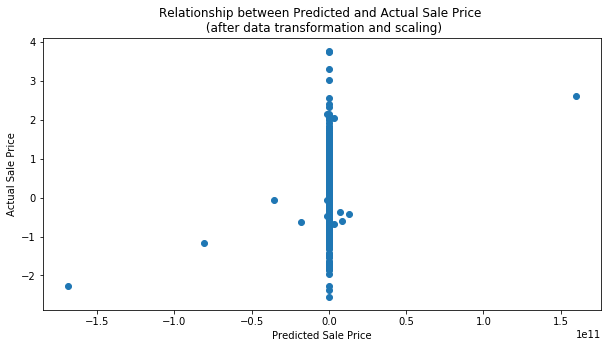

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: overflow encountered in power


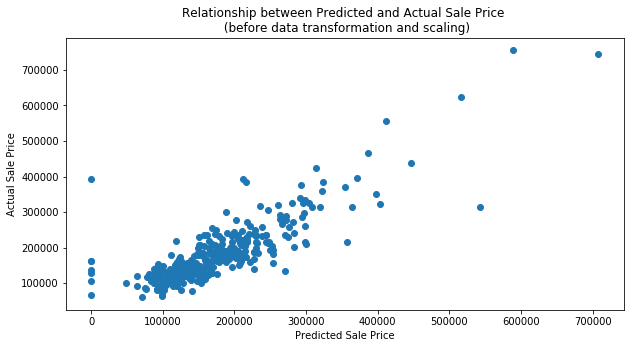

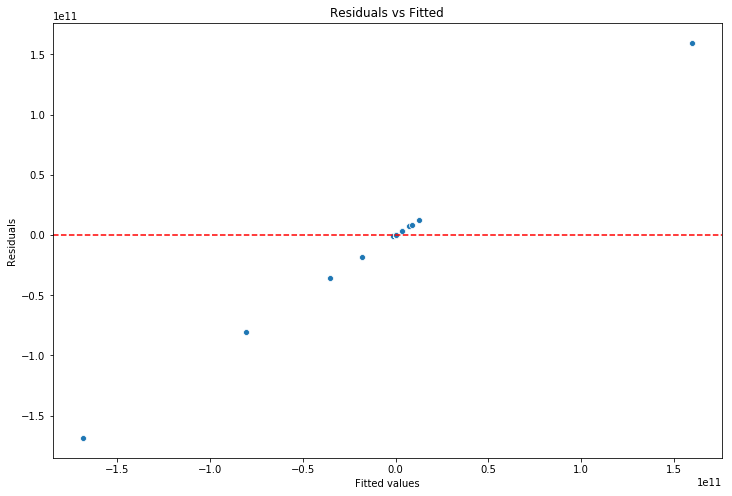

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


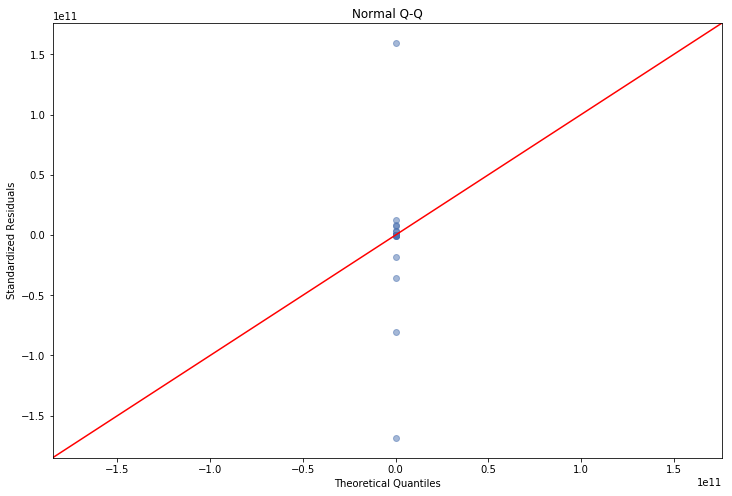

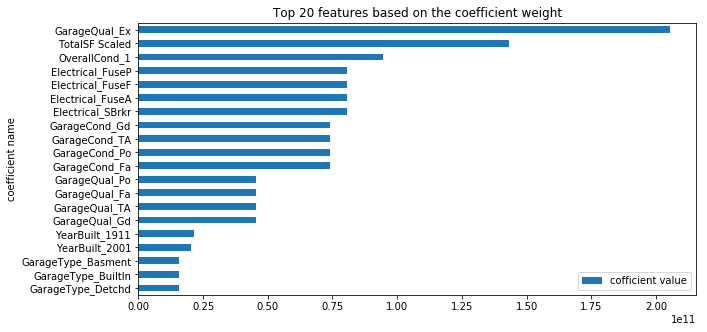

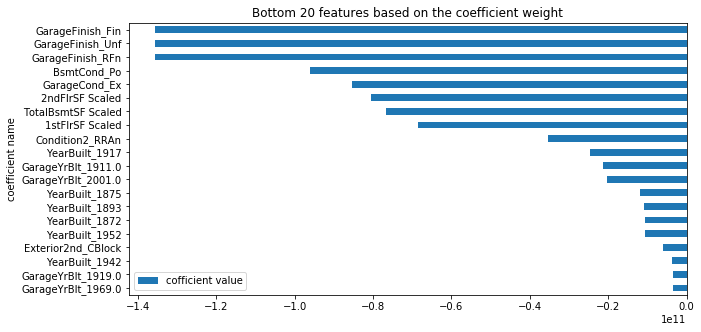

In [37]:
X_train, X_test, y_train, y_test = func_output_training_testing_datasets(cleaned_transformed_data, test_size=0.25)
estimator=LinearRegression()
coefficient_df, intercept, rmse_test, mape_test, R_Squared_test=model_sklearn_model_fitting_output(X_train, y_train, X_test, y_test, estimator)

# Regularization on the linear regression (Ridge & Lasso)

# Apply Ridge on the model:

RMSE on the training set:  0.3099458877946658
RSquared on the training set:  0.9031225120083736


RMSE on the testing set:  0.4405077789423028
RSquared on the testing set:  0.8069390659704833
Mape on the testing set:  0.13430266520233294


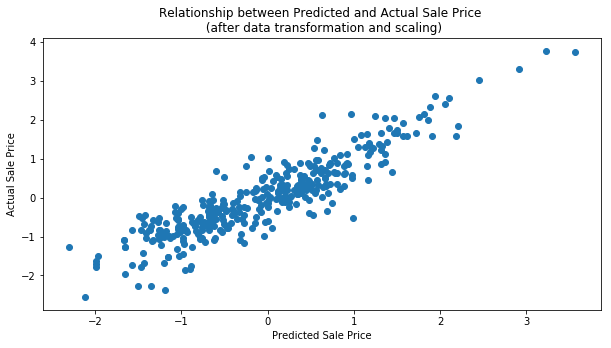

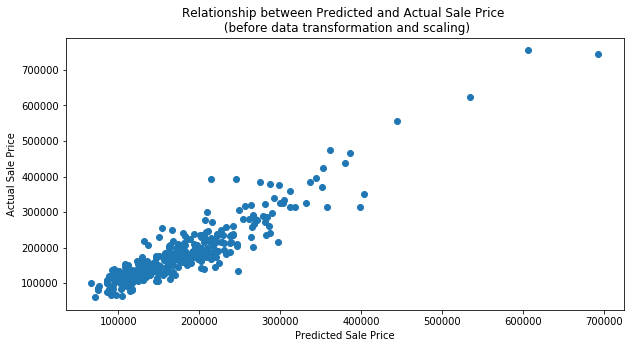

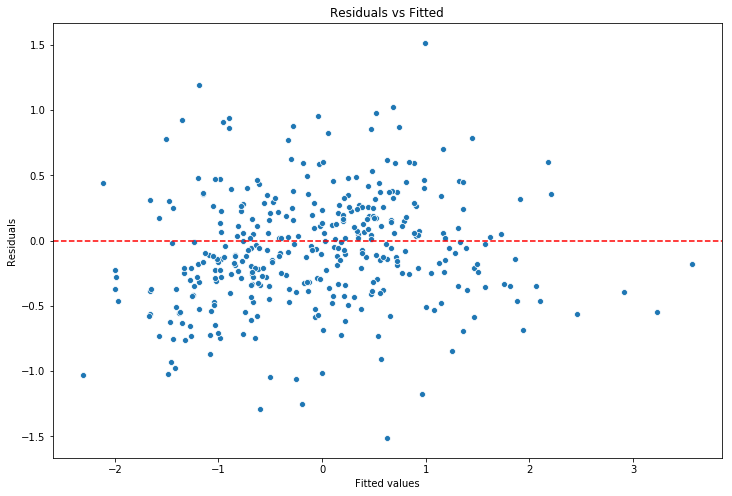

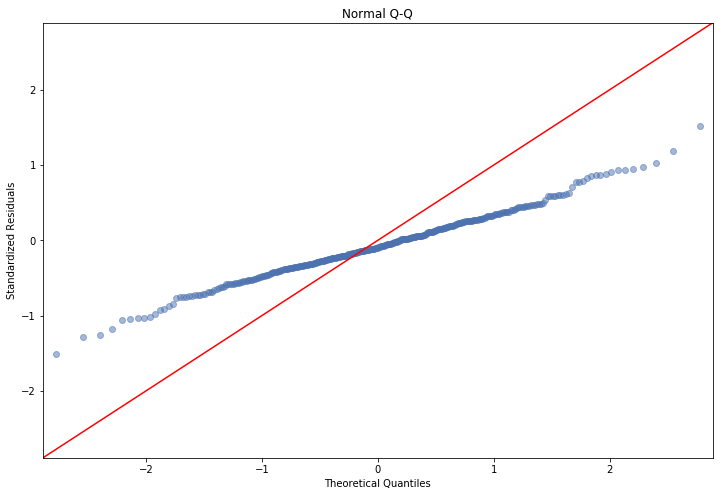

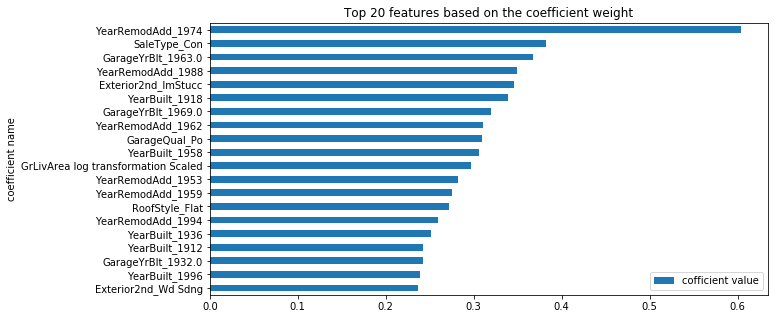

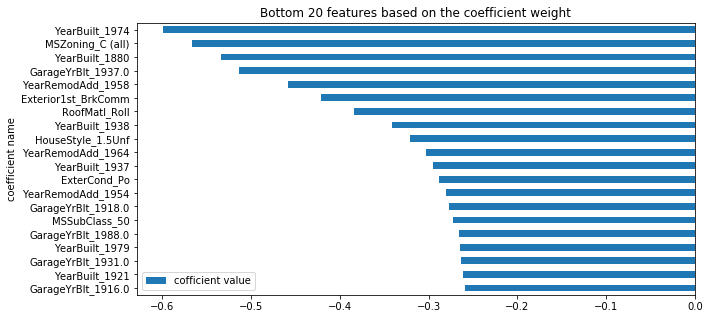

In [566]:
X_train, X_test, y_train, y_test = func_output_training_testing_datasets(cleaned_transformed_data, test_size=0.25)
estimator=Ridge(alpha=1)
estimator_name='Ridge'
coefficient_df, intercept, rmse_test, mape_test, R_Squared_test=model_sklearn_model_fitting_output(X_train, y_train, X_test, y_test, estimator, estimator_name)

# Based on the randomized search 156 is the best alpha to use for the Ridget regression.

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.5s finished


Here's the best parameter from the randomized search: {'alpha': 155.86206896551724}
RMSE on the training set:  0.39393841330416673
RSquared on the training set:  0.8435023666199838


RMSE on the testing set:  0.37291726075507337
RSquared on the testing set:  0.8616394722601429
Mape on the testing set:  0.11415888013607178


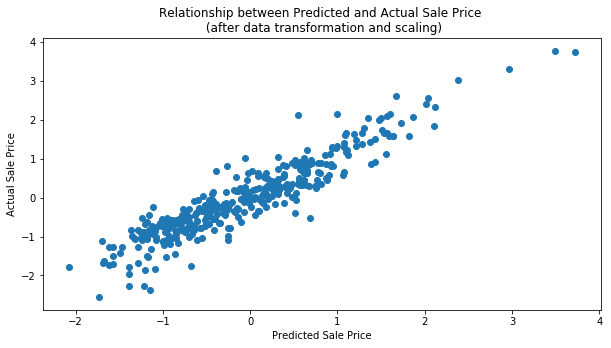

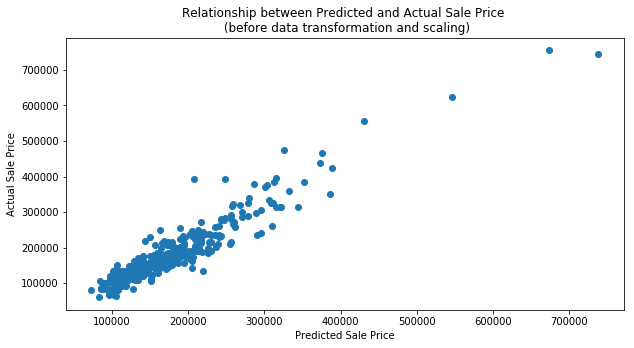

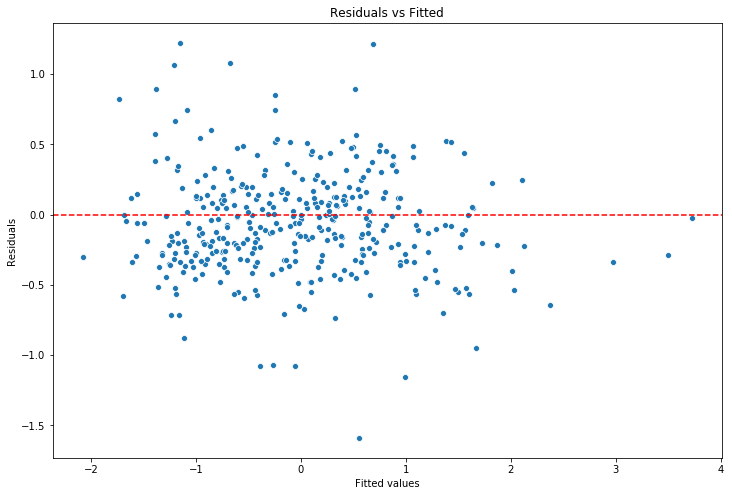

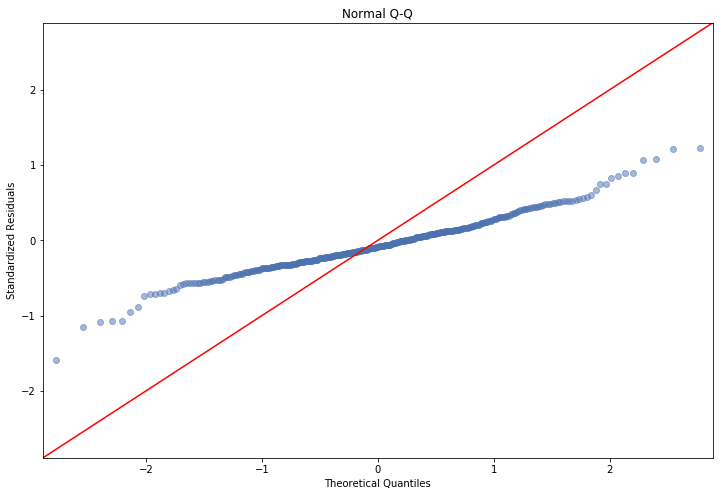

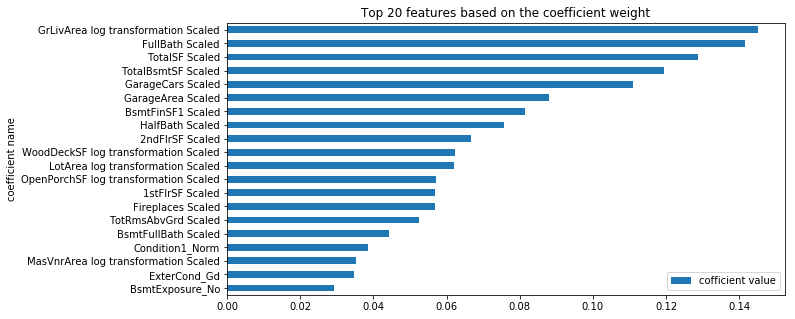

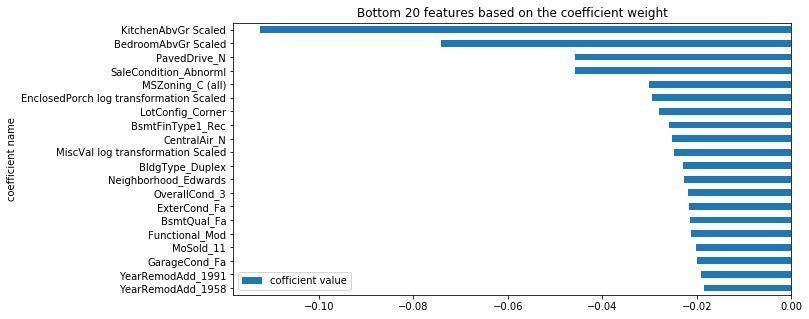

In [567]:
X_train, X_test, y_train, y_test = func_output_training_testing_datasets(cleaned_transformed_data, test_size=0.25)
random_grid={'alpha': np.linspace(start=1, stop=500, num=30)}
estimator=Ridge()
estimator_name='Ridge'
coefficient_df, intercept, rmse_test, mape_test, R_Squared_test=model_sklearn_model_randomizd_search_fitting_output(random_grid, X_train, y_train, X_test, y_test, estimator, estimator_name)
    

# Based on the Grid Search, 156 is the best alpha to use.

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.4s finished


Here's the best parameter from the grid search: {'alpha': 156.0}
RMSE on the training set:  0.39395273576384715
RSquared on the training set:  0.8434909868117983


RMSE on the testing set:  0.3729195497067848
RSquared on the testing set:  0.8616377737518032
Mape on the testing set:  0.11416040356238921


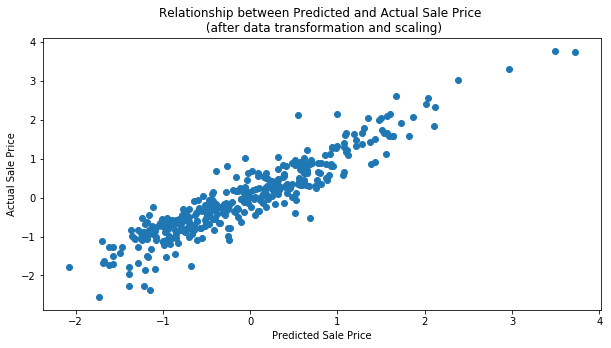

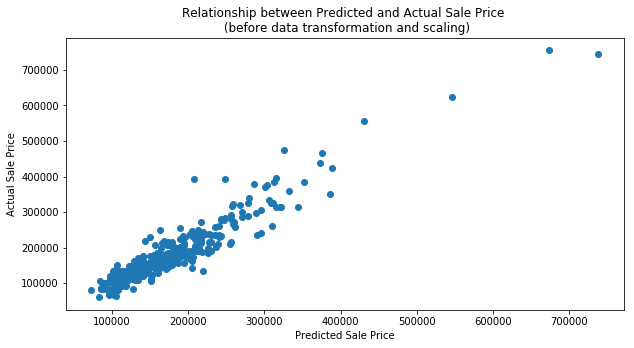

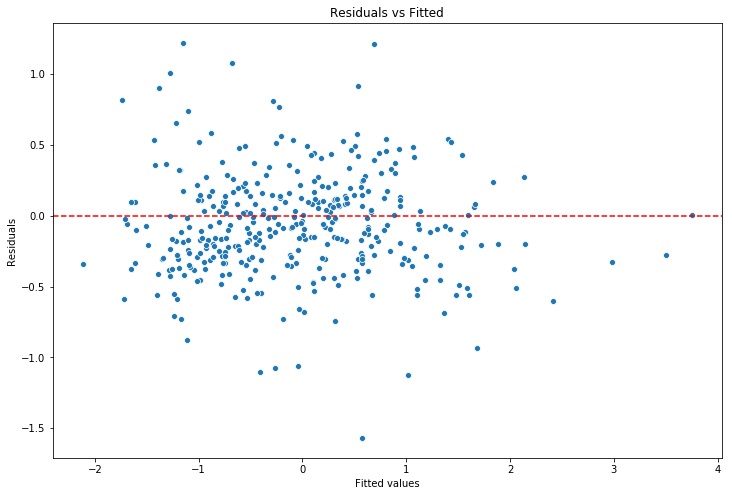

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


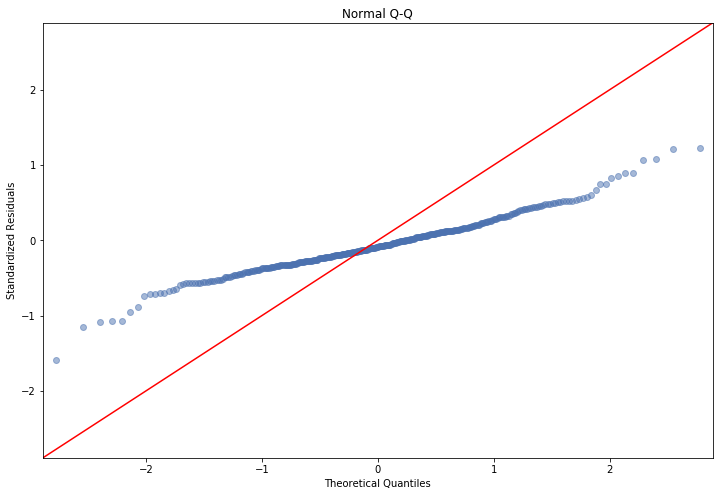

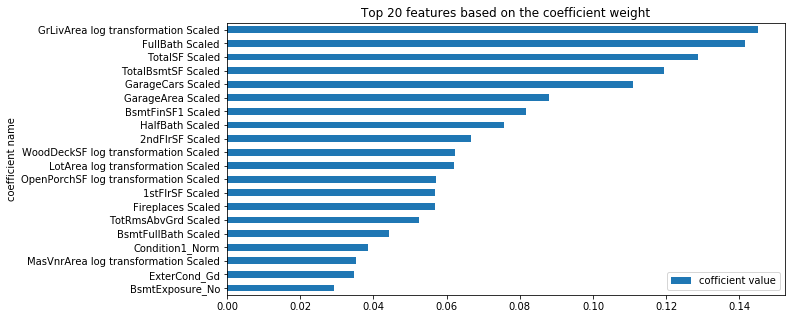

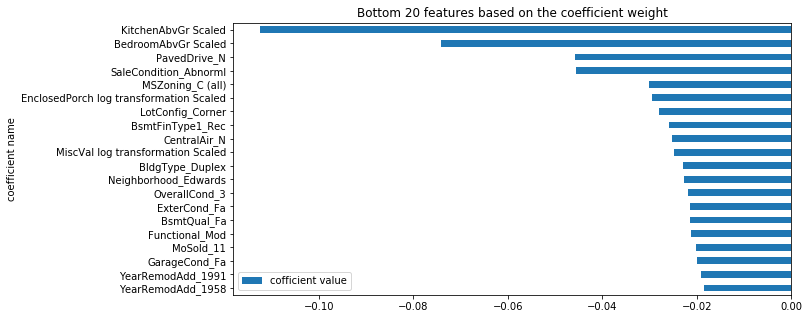

In [450]:
X_train, X_test, y_train, y_test = func_output_training_testing_datasets(cleaned_transformed_data, test_size=0.25)
param_grid={'alpha': np.linspace(start=140, stop=172, num=5)}
estimator=Ridge()
estimator_name='Ridge'
coefficient_df, intercept, rmse_test, mape_test, R_Squared_test=model_sklearn_model_grid_search_fitting_output(param_grid, X_train, y_train, X_test, y_test, estimator, estimator_name)

In [48]:
Best_ridge_estimator=Ridge(alpha=156)

# Apply Lasso on the model:

RMSE on the training set:  0.7669860753588464
RSquared on the training set:  0.4067659498577688


RMSE on the testing set:  0.7479162853045411
RSquared on the testing set:  0.44346405621596885
Mape on the testing set:  0.2435259225007258


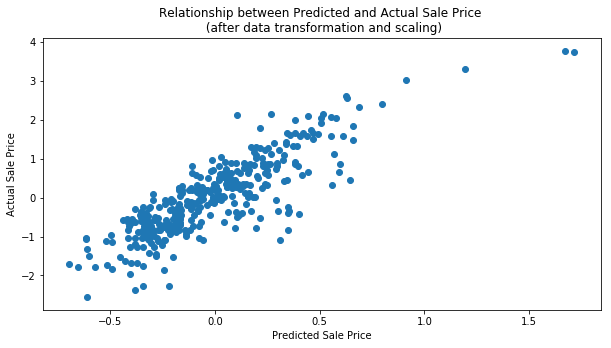

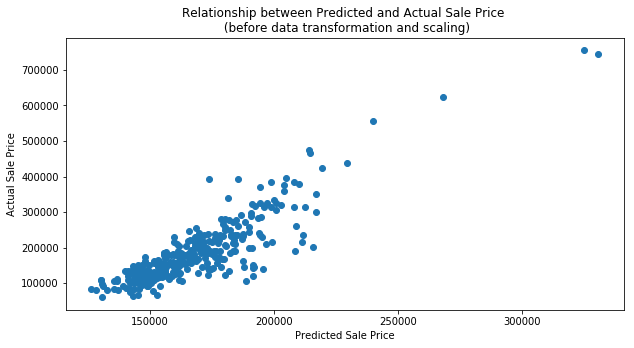

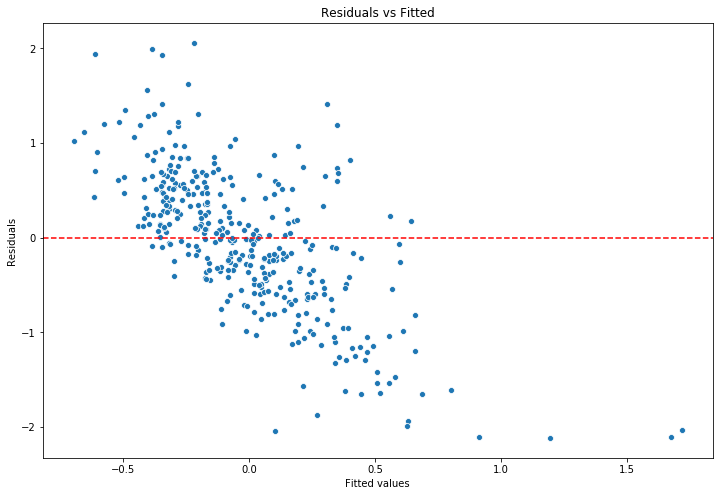

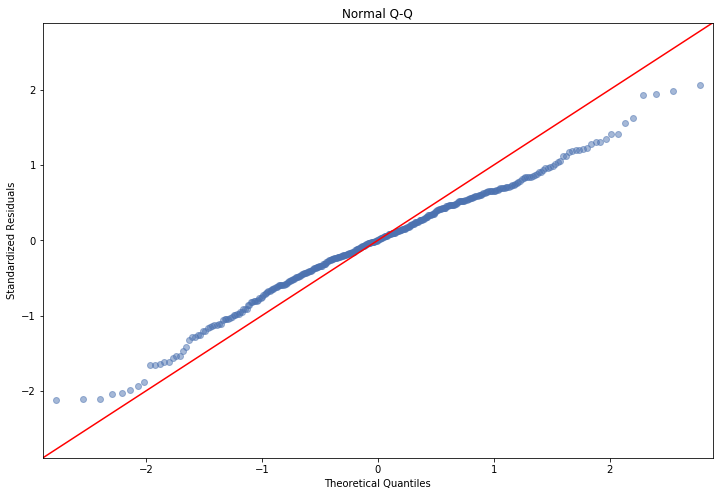

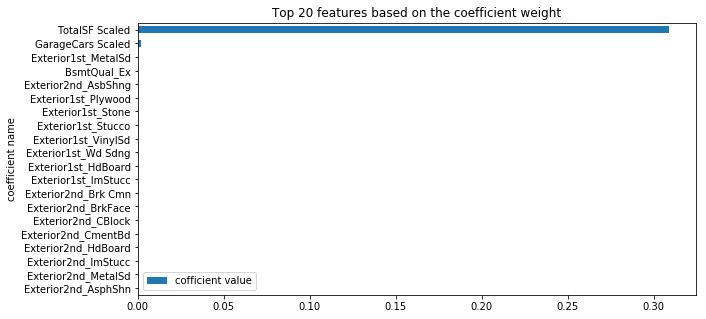

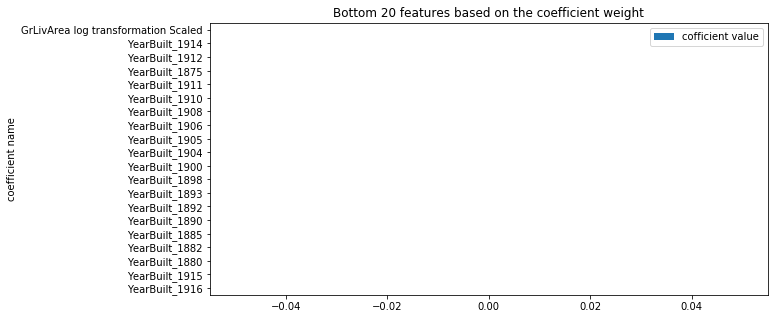

In [568]:
X_train, X_test, y_train, y_test = func_output_training_testing_datasets(cleaned_transformed_data, test_size=0.25)
estimator=Lasso(alpha=0.5)
estimator_name='Lasso'
coefficient_df, intercept, rmse_test, mape_test, R_Squared_test=model_sklearn_model_fitting_output(X_train, y_train, X_test, y_test, estimator,estimator_name)

# Use randomized search for the lasso model, alpha 0.011 is the best parameter.

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  30 | elapsed:    0.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.1s finished


Here's the best parameter from the randomized search: {'alpha': 0.0111115}
RMSE on the training set:  0.4149478729010073
RSquared on the training set:  0.8263646299322885


RMSE on the testing set:  0.3768793434679909
RSquared on the testing set:  0.8586838138144504
Mape on the testing set:  0.11328983124602195


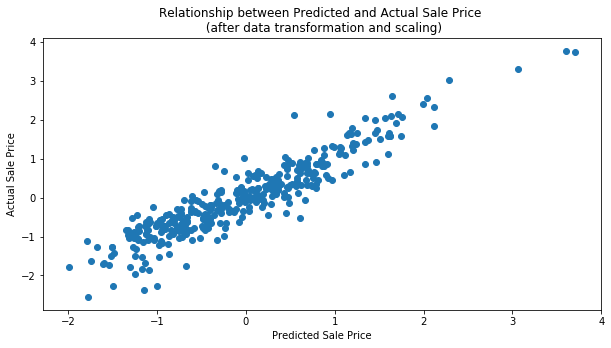

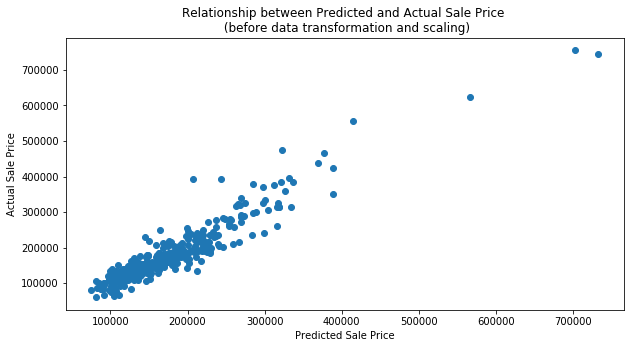

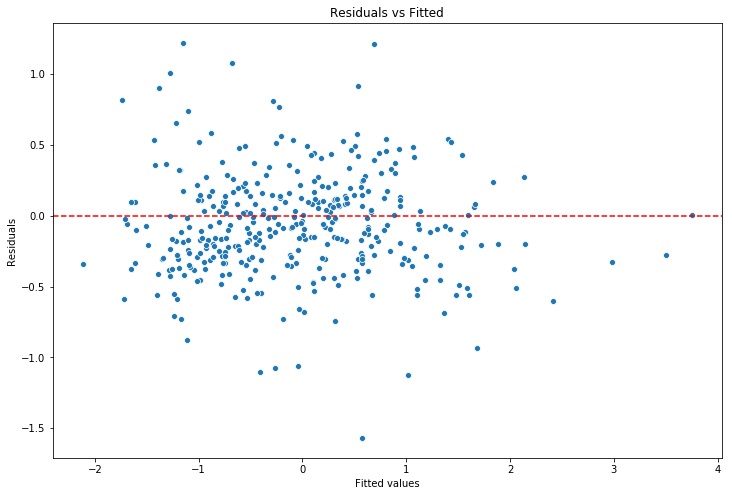

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


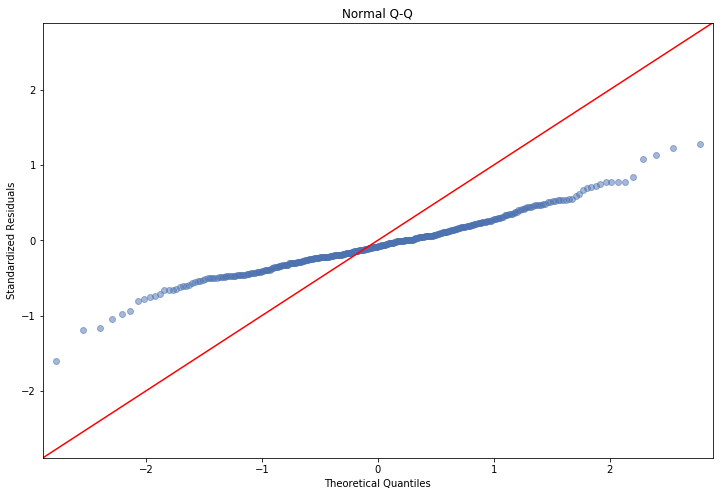

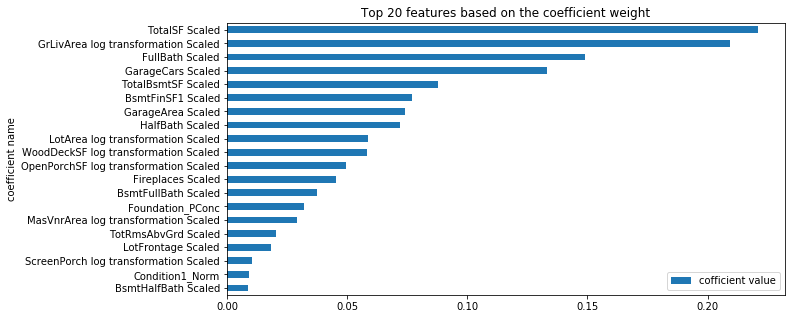

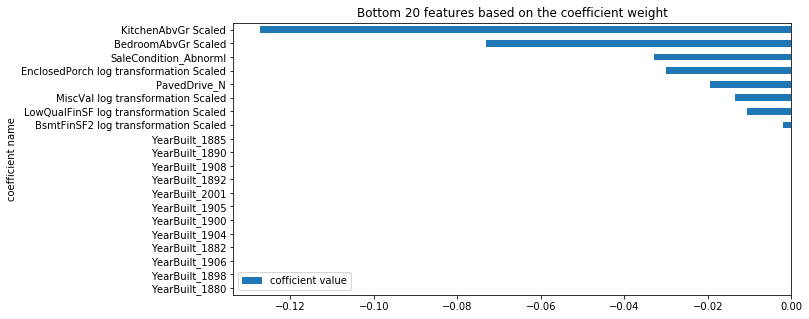

In [459]:
X_train, X_test, y_train, y_test = func_output_training_testing_datasets(cleaned_transformed_data, test_size=0.25)
random_grid={'alpha': np.linspace(start=0.0000005, stop=0.05, num=100)}
estimator=Lasso()
estimator_name='Lasso'
coefficient_df, intercept, rmse_test, mape_test, R_Squared_test=model_sklearn_model_randomizd_search_fitting_output(random_grid, X_train, y_train, X_test, y_test, estimator, estimator_name)
    

# Based on the Grid Search, alpha 0.0092 is best alpha.

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   10.8s finished


Here's the best parameter from the grid search: {'alpha': 0.009187755102040817}
RMSE on the training set:  0.41198774061062654
RSquared on the training set:  0.8288331344599577


RMSE on the testing set:  0.37586519362696225
RSquared on the testing set:  0.8594433299037086
Mape on the testing set:  0.11351717427155036


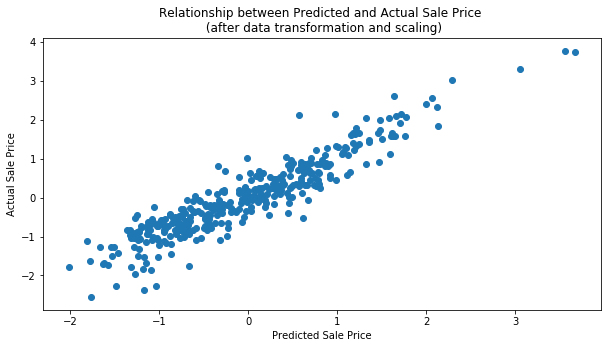

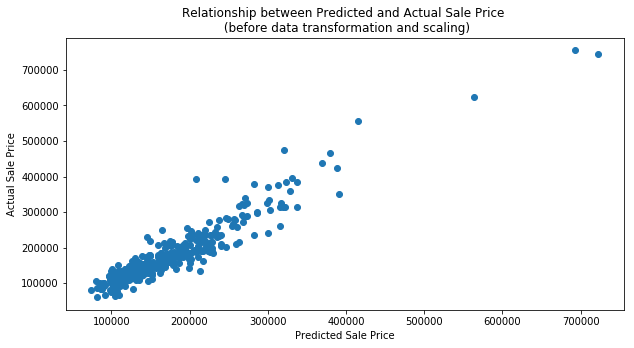

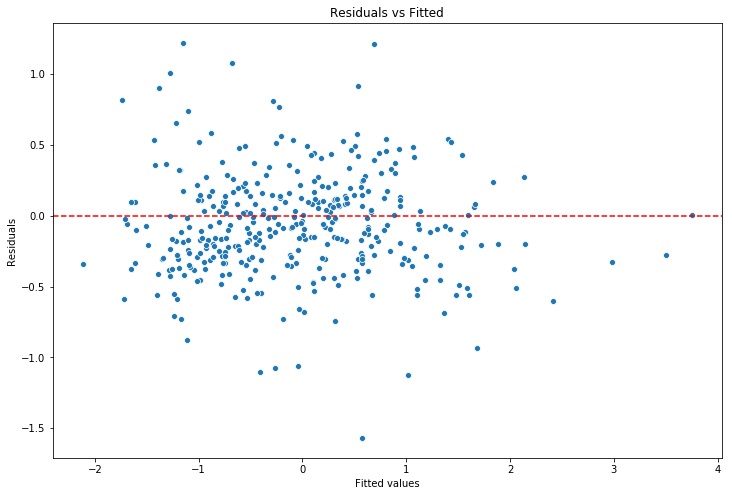

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


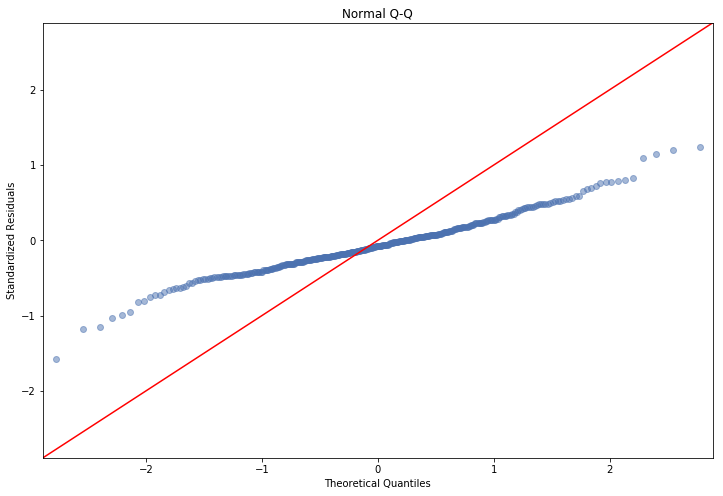

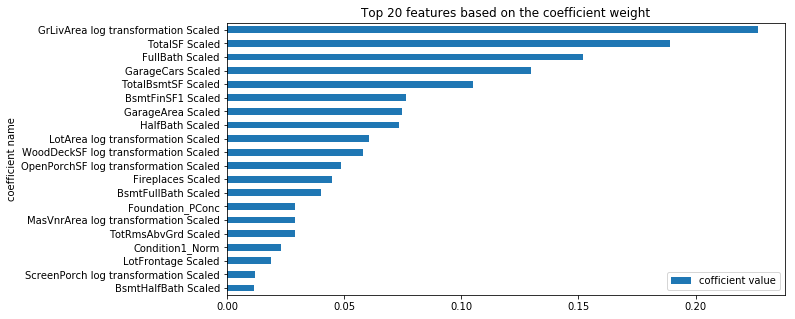

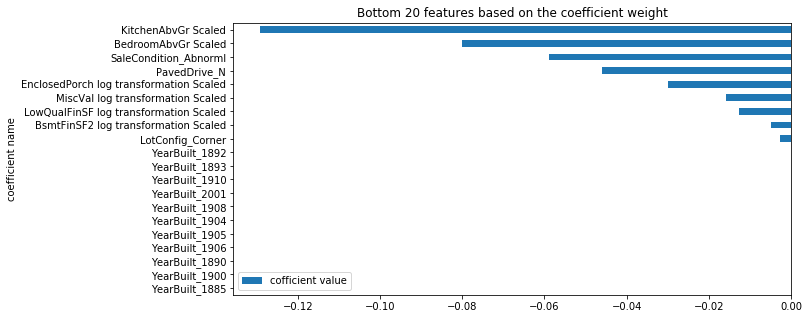

In [464]:
X_train, X_test, y_train, y_test = func_output_training_testing_datasets(cleaned_transformed_data, test_size=0.25)
param_grid={'alpha': np.linspace(start=0.00005, stop=0.01, num=50)}
estimator=Lasso()
estimator_name='Lasso'
coefficient_df, intercept, rmse_test, mape_test, R_Squared_test=model_sklearn_model_grid_search_fitting_output(param_grid, X_train, y_train, X_test, y_test, estimator, estimator_name)

In [47]:
Best_lasso_estimator=Lasso(alpha=0.00918)

# Apply ElasticNet model:

In [569]:
elastic_net=ElasticNet(alpha=0.001,l1_ratio=0.5)
estimator=elastic_net
estimator_name='ElasticNet'

RMSE on the training set:  0.34016814286164115
RSquared on the training set:  0.8833087237630186


RMSE on the testing set:  0.4037018515078847
RSquared on the testing set:  0.8378530733721966
Mape on the testing set:  0.12605674592144164


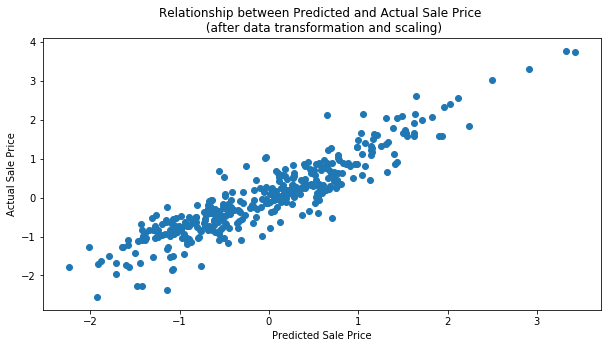

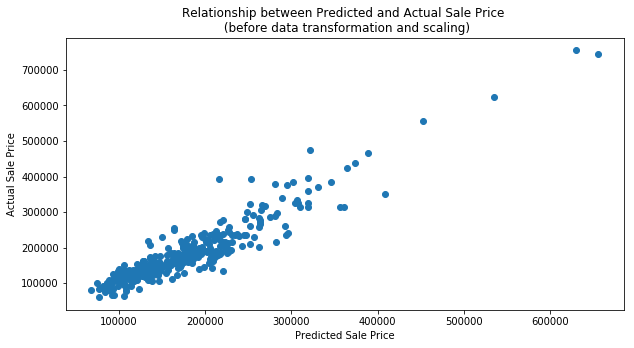

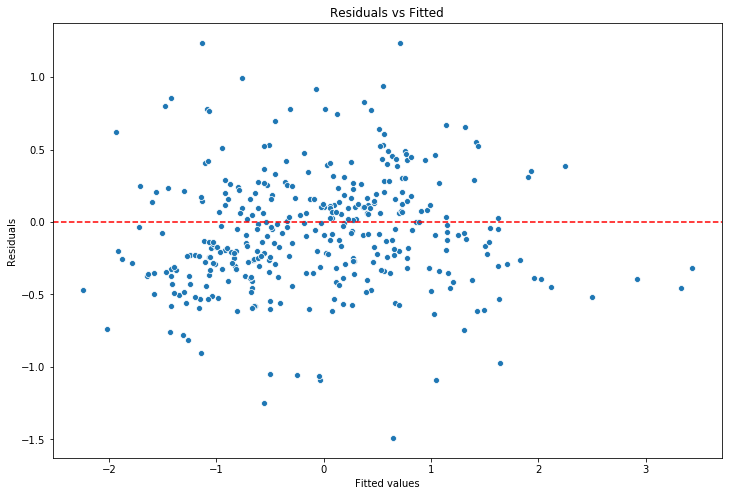

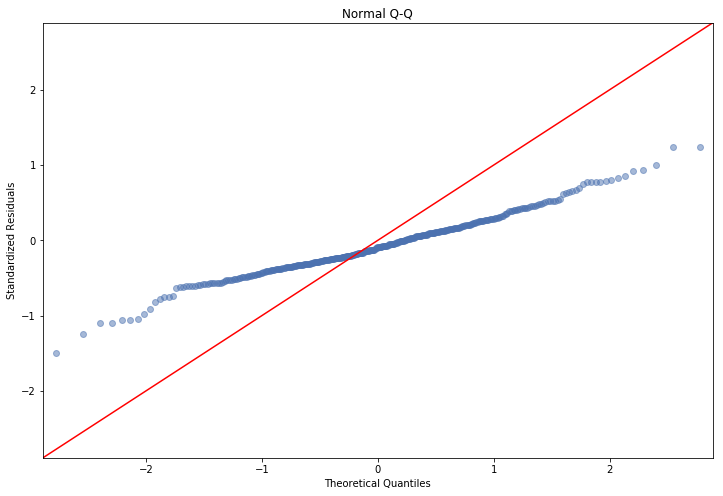

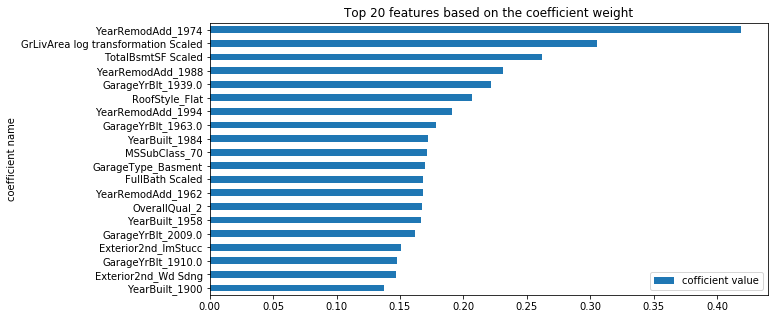

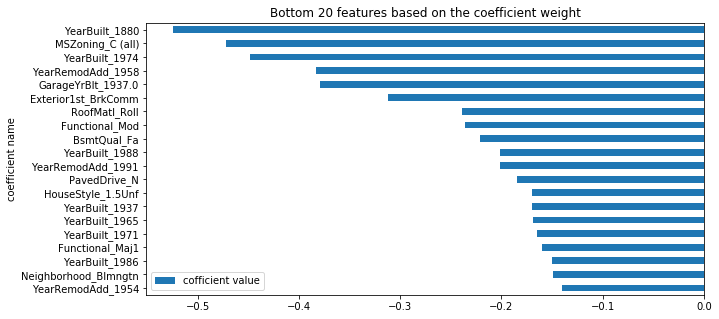

In [570]:
coefficient_df, intercept, rmse_test, mape_test, R_Squared_test=model_sklearn_model_fitting_output(X_train, y_train, X_test, y_test, estimator, estimator_name)

# Based on the randomized search, 2.7674 is best alpha and 0.0 is the best l1 ratio.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  30 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.5s finished
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Here's the best parameter from the randomized search: {'l1_ratio': 0.0, 'alpha': 2.7674371859296483}


C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


RMSE on the training set:  0.5154138668977145
RSquared on the training set:  0.7321058011100778


RMSE on the testing set:  0.4864962279858134
RSquared on the testing set:  0.764524247409881
Mape on the testing set:  0.15652346587343807


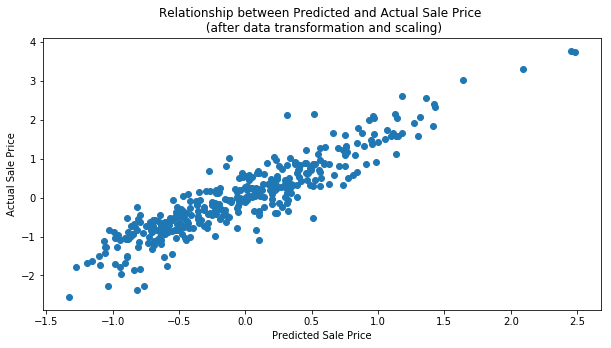

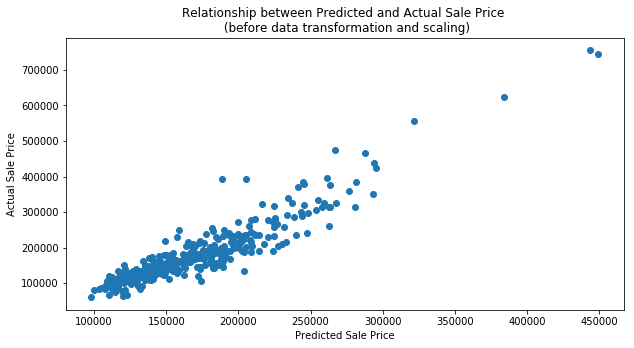

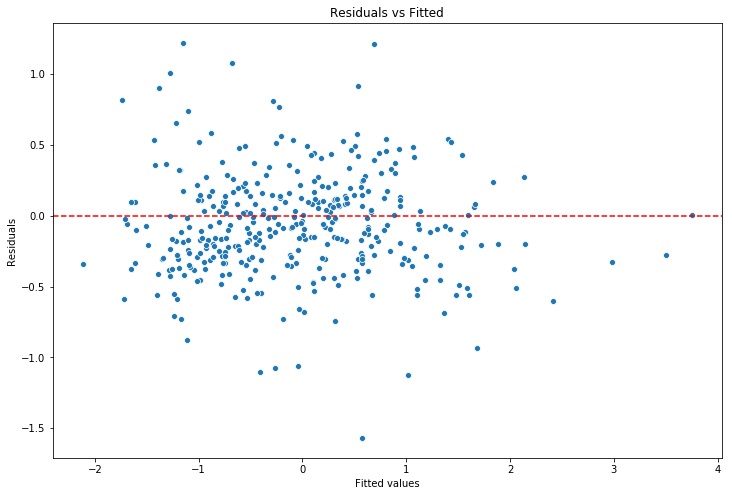

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


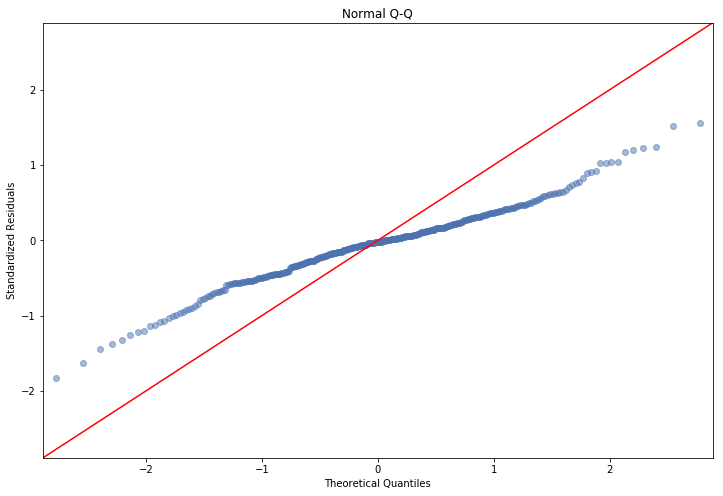

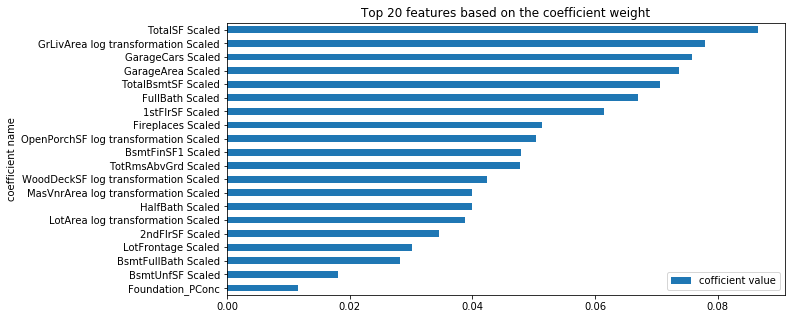

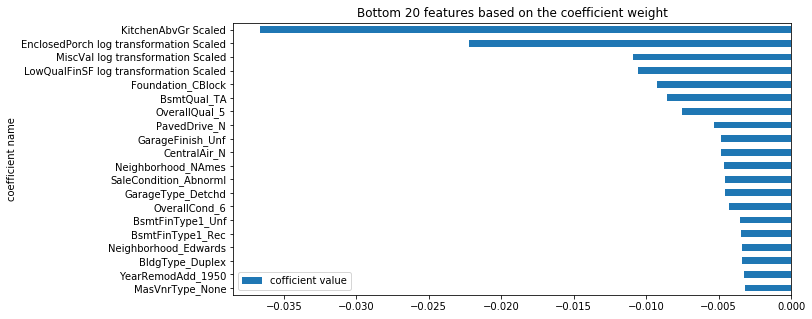

In [479]:
X_train, X_test, y_train, y_test = func_output_training_testing_datasets(cleaned_transformed_data, test_size=0.25)
random_grid={'alpha': np.linspace(start=0.005, stop=10, num=200), 'l1_ratio': np.linspace(start=0, stop=1, num=6)}
estimator=ElasticNet()
estimator_name='Elastic Net'
coefficient_df, intercept, rmse_test, mape_test, R_Squared_test=model_sklearn_model_randomizd_search_fitting_output(random_grid, X_train, y_train, X_test, y_test, estimator, estimator_name)
    

# Based on the Grid Search, the best alpha is 0.066, ls ratio is 0.1.

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  1.2min finished


Here's the best parameter from the grid search: {'alpha': 0.06612244897959184, 'l1_ratio': 0.1}
RMSE on the training set:  0.4109080162908068
RSquared on the training set:  0.8297291361281421


RMSE on the testing set:  0.37507939164550425
RSquared on the testing set:  0.8600304247237807
Mape on the testing set:  0.11363653877398083


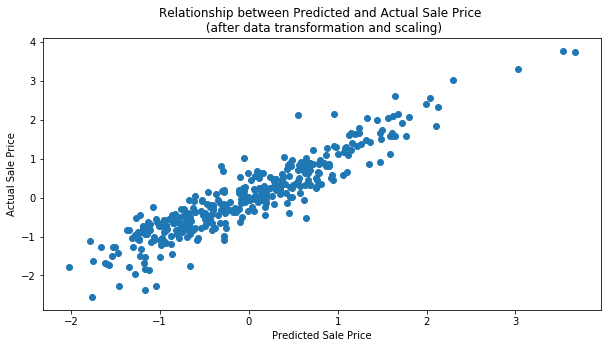

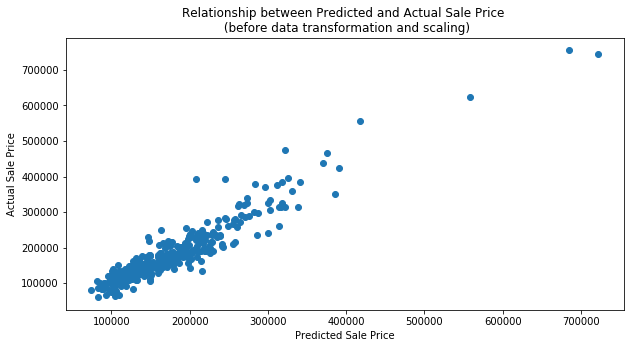

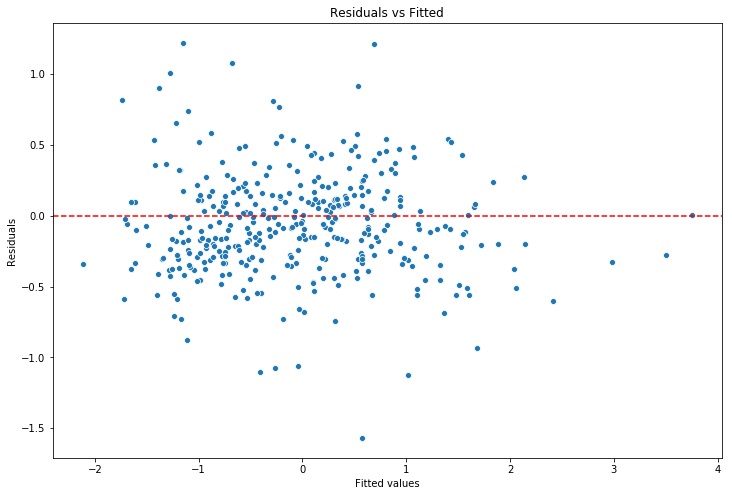

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


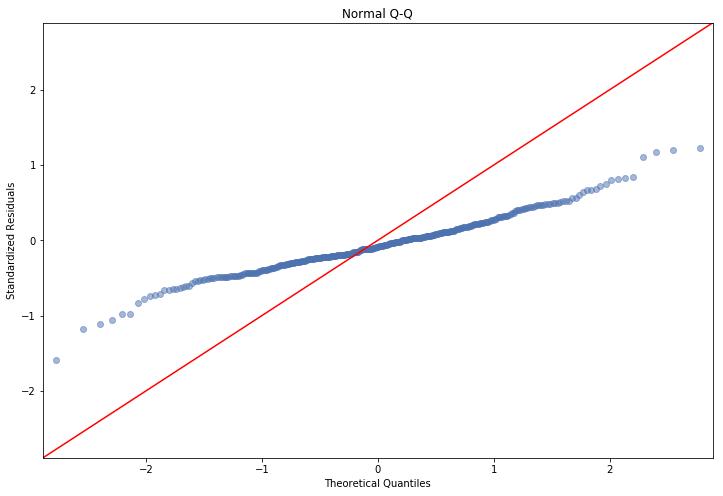

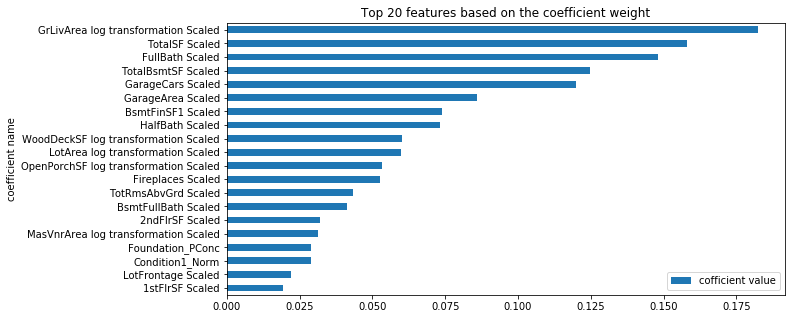

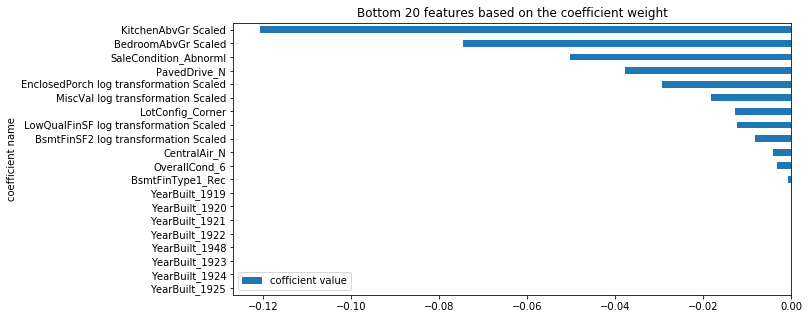

In [480]:
X_train, X_test, y_train, y_test = func_output_training_testing_datasets(cleaned_transformed_data, test_size=0.25)
param_grid={'alpha': np.linspace(start=0.01, stop=2.76, num=50), 'l1_ratio': [0.0, 0.1, 0.2]}
estimator=ElasticNet()
estimator_name='Elastic Net'
coefficient_df, intercept, rmse_test, mape_test, R_Squared_test=model_sklearn_model_grid_search_fitting_output(param_grid, X_train, y_train, X_test, y_test, estimator, estimator_name)

In [46]:
best_elastic_net_estimator=ElasticNet(alpha=0.066, l1_ratio=0.1)

# Gradient Boosting Regressor:

RMSE on the training set:  0.17744185361568818
RSquared on the training set:  0.9682485734092058


RMSE on the testing set:  0.35543272098539247
RSquared on the testing set:  0.874309616464898
Mape on the testing set:  0.10945765453993583


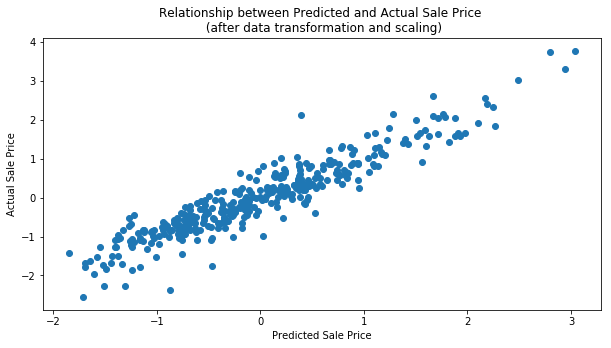

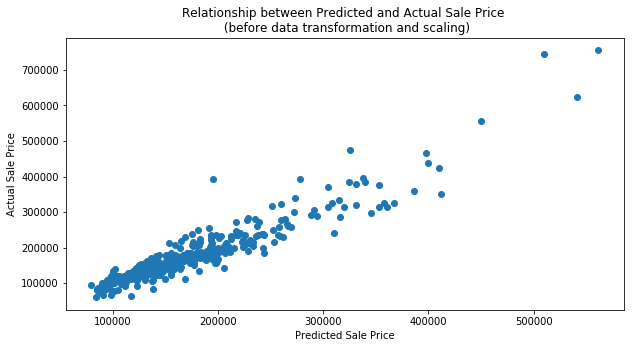

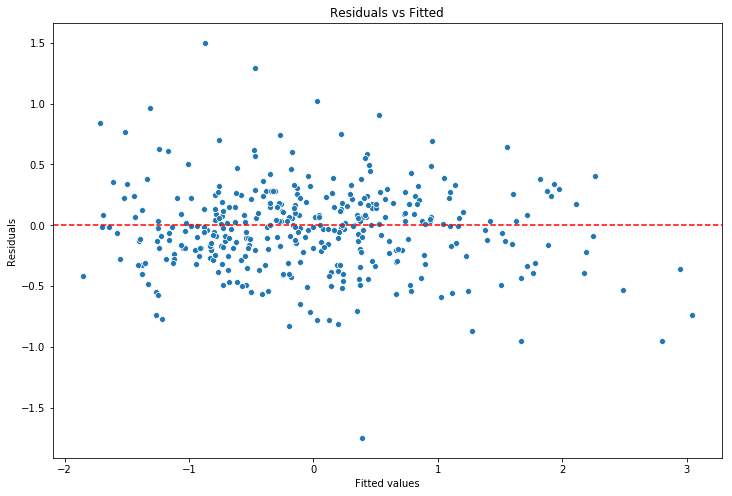

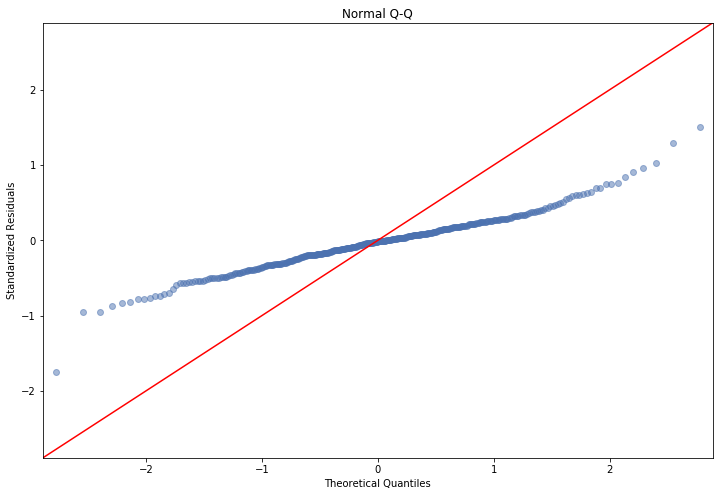

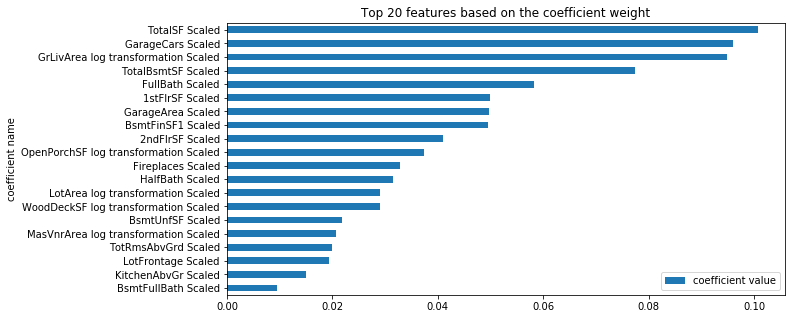

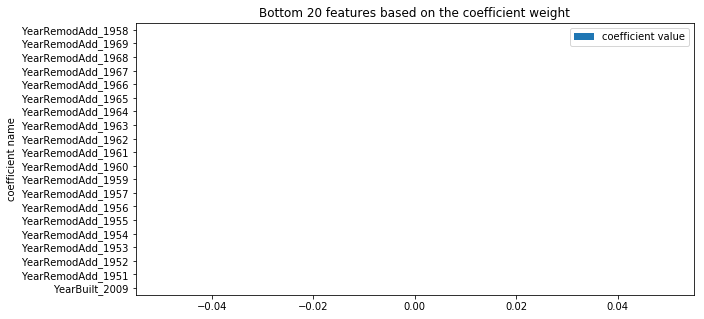

In [573]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
estimator=GBoost
estimator_name='Gradient Boosting Regressor'
X_train, X_test, y_train, y_test = func_output_training_testing_datasets(cleaned_transformed_data, test_size=0.25)
coefficient_df, rmse_test, mape_test, R_Squared_test=model_sklearn_model_gradient_boosting_fitting_output(X_train, y_train, X_test, y_test, estimator, estimator_name)


# Best Parameter for randimized Search:
{'n_estimators': 2004, 'min_samples_split': 15, 'min_samples_leaf': 15, 'max_features': 'sqrt', 'max_depth': 7.0, 'learning_rate': 0.05}

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   32.2s finished
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Here's the best parameter from the randomized search: {'n_estimators': 2004, 'min_samples_split': 15, 'min_samples_leaf': 15, 'max_features': 'sqrt', 'max_depth': 7.0, 'learning_rate': 0.05}


C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE on the training set:  0.03545391335804441
RSquared on the training set:  0.9987324080579462


RMSE on the testing set:  0.37002664417357506
RSquared on the testing set:  0.8637761240582155
Mape on the testing set:  0.11539381819313892


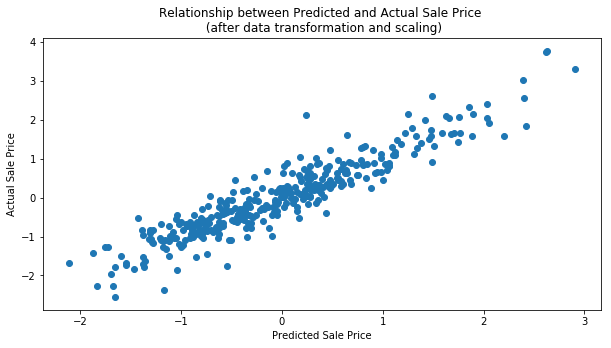

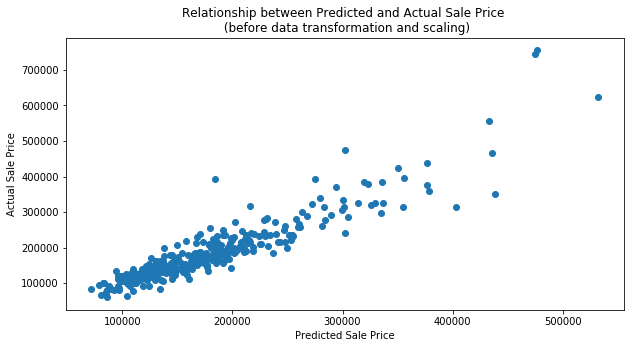

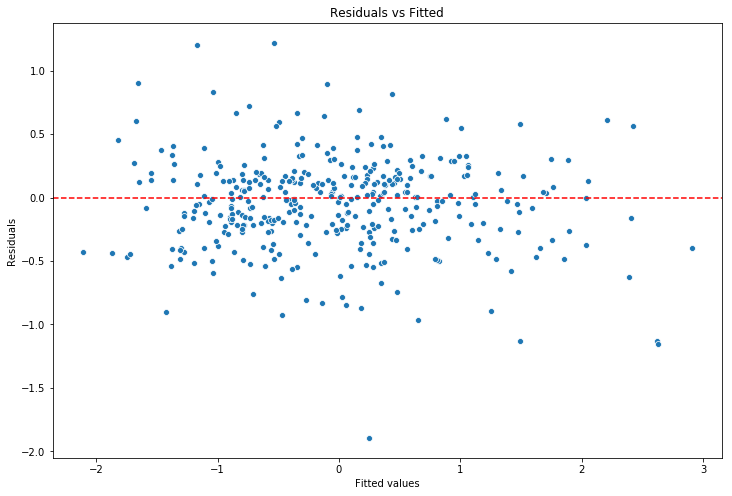

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


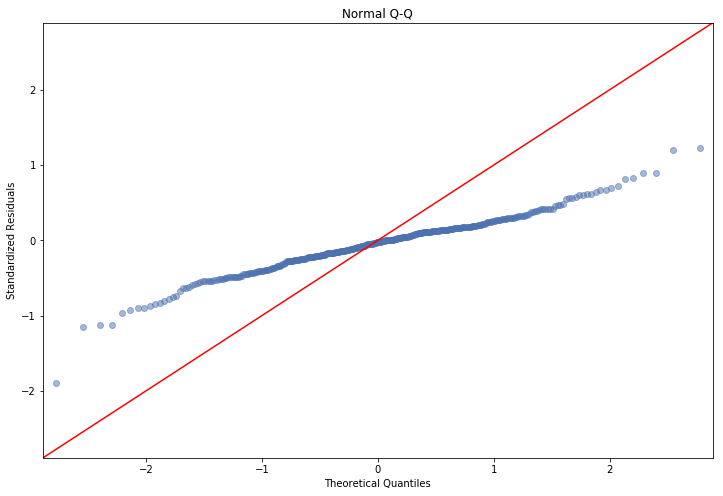

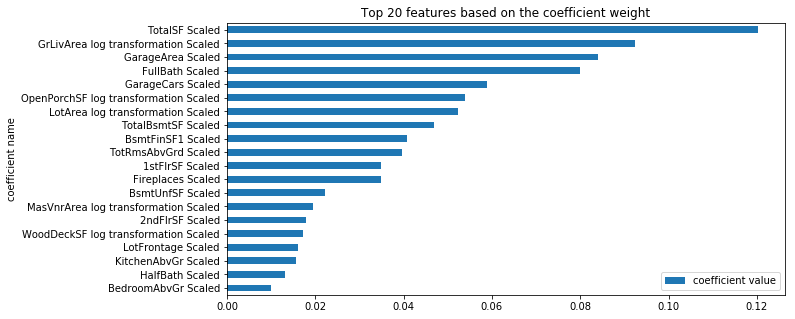

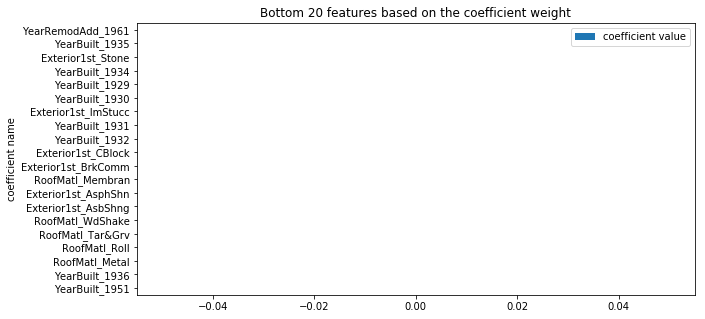

In [56]:
X_train, X_test, y_train, y_test = func_output_training_testing_datasets(cleaned_transformed_data, test_size=0.25)
random_grid={'n_estimators': np.linspace(start=100, stop=3000, num=100).astype('int'), 
             'learning_rate': np.linspace(start=0.05, stop=1, num=8), 
            'max_depth': np.linspace(start=4, stop=10, num=5), 
            'max_features':['sqrt'], 
            'min_samples_leaf': np.linspace(start=10, stop=20, num=5).astype('int'), 
            'min_samples_split': np.linspace(start=10, stop=20, num=5).astype('int')}
estimator=GradientBoostingRegressor()
coefficient_df, rmse_test, mape_test, R_Squared_test=model_sklearn_model_gradient_boosting_randomized_search_fitting_output(random_grid, X_train, y_train, X_test, y_test, estimator, estimator_name)

# Based on the grid search, below are the best parameters:

{'learning_rate': 0.05, 'max_depth': 7.0, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'min_samples_split': 15, 'n_estimators': 1981}

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  9.3min finished
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Here's the best parameter from the grid search: {'learning_rate': 0.05, 'max_depth': 7.0, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'min_samples_split': 15, 'n_estimators': 1981}


C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE on the training set:  0.03786497799760724
RSquared on the training set:  0.9985541390470364


RMSE on the testing set:  0.37309308240965305
RSquared on the testing set:  0.8615089740814532
Mape on the testing set:  0.11758305646392099


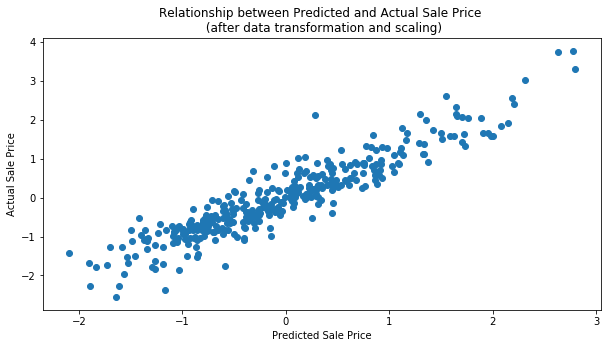

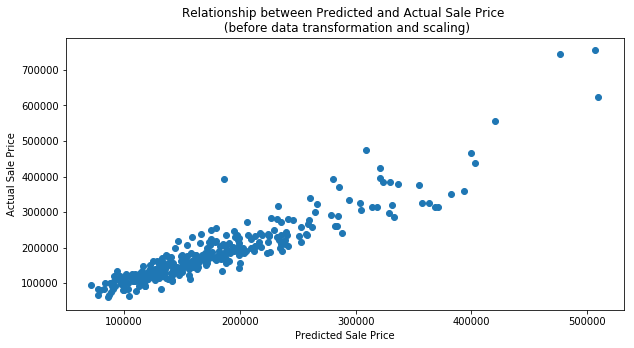

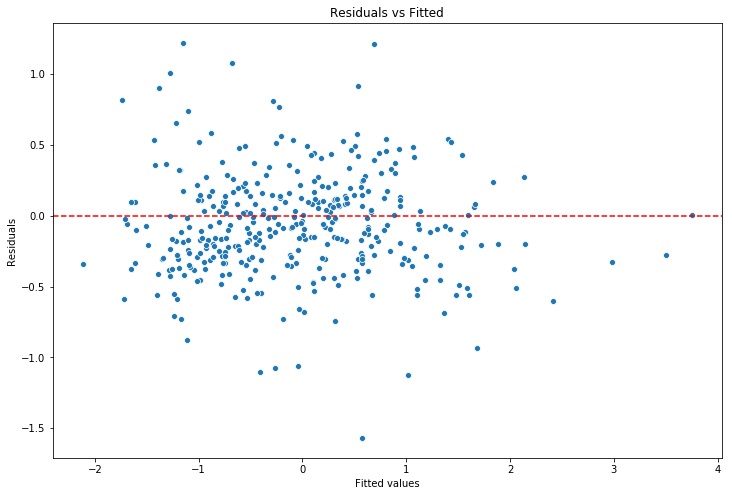

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


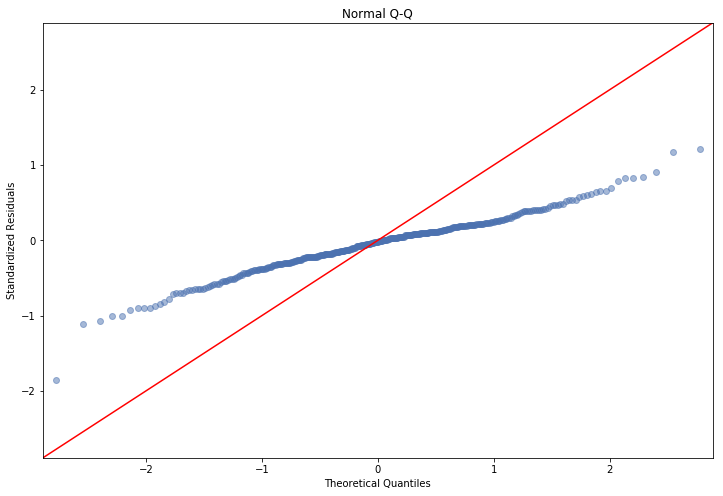

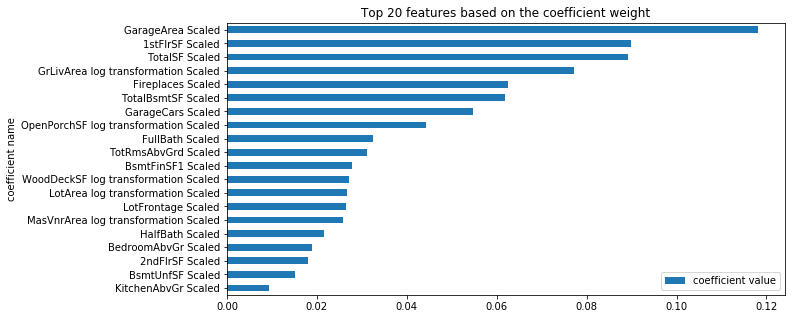

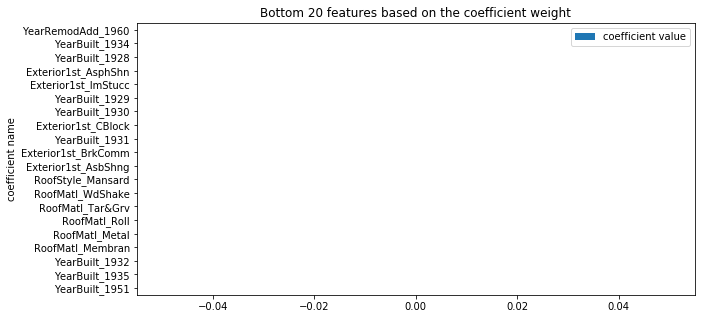

(                                         coefficient value
coefficient name                                          
GarageArea Scaled                                 0.118203
1stFlrSF Scaled                                   0.089842
TotalSF Scaled                                    0.089224
GrLivArea log transformation Scaled               0.077102
Fireplaces Scaled                                 0.062474
TotalBsmtSF Scaled                                0.061916
GarageCars Scaled                                 0.054772
OpenPorchSF log transformation Scaled             0.044163
FullBath Scaled                                   0.032593
TotRmsAbvGrd Scaled                               0.031083
BsmtFinSF1 Scaled                                 0.027858
WoodDeckSF log transformation Scaled              0.027074
LotArea log transformation Scaled                 0.026665
LotFrontage Scaled                                0.026381
MasVnrArea log transformation Scaled              0.025

In [529]:
param_grid={'n_estimators': np.linspace(start=1975, stop=2032, num=10).astype('int'), 
             'learning_rate': np.linspace(start=0.05, stop=0.18, num=4), 
            'max_depth': np.linspace(start=6, stop=8, num=3), 
            'max_features':['sqrt'], 
            'min_samples_leaf': [15], 
            'min_samples_split': [15]}
estimator=GradientBoostingRegressor()
model_sklearn_model_gradient_boosting_grid_search_fitting_output(param_grid, X_train, y_train, X_test, y_test, estimator, estimator_name)

In [63]:
Best_gradient_boosting_estimator=GradientBoostingRegressor(learning_rate=0.05, max_depth=7, max_features='sqrt', min_samples_leaf= 15, min_samples_split= 15, n_estimators= 1981)

# Use Xgboost regressor

RMSE on the training set:  0.04962935508257546
RSquared on the training set:  0.9975161327853831


RMSE on the testing set:  0.37788161729487985
RSquared on the testing set:  0.8579311811602056
Mape on the testing set:  0.11891475141691633


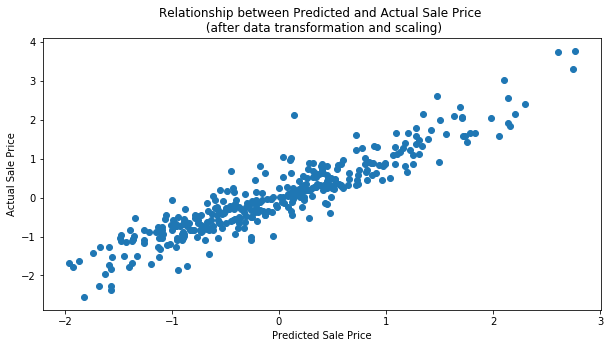

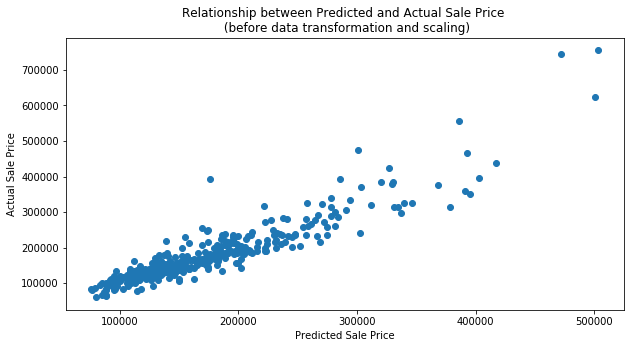

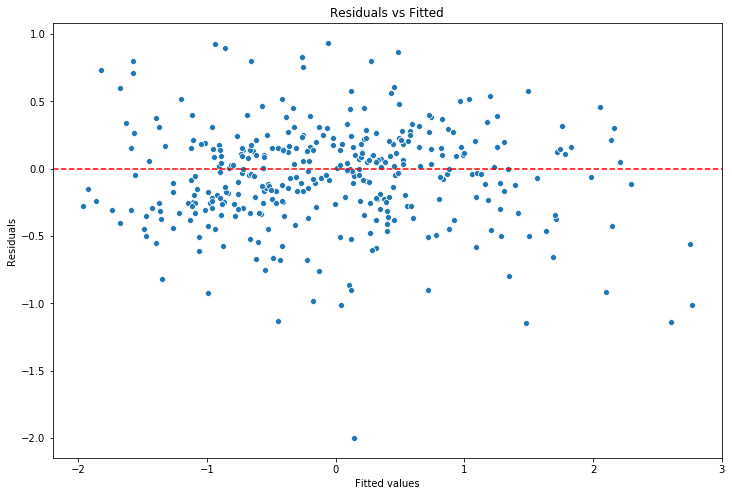

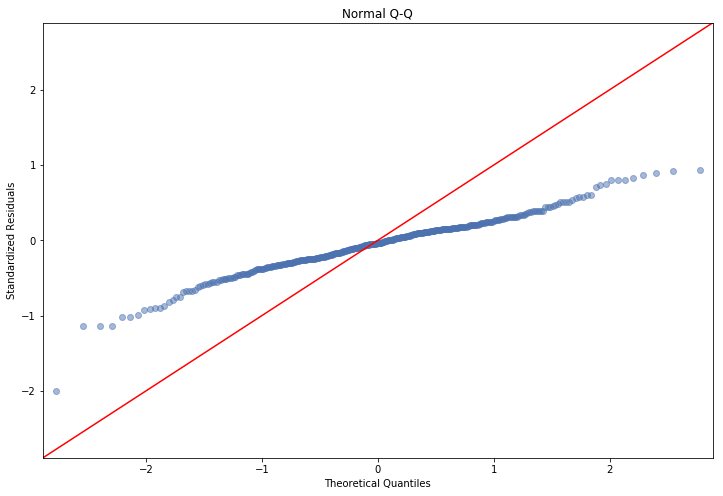

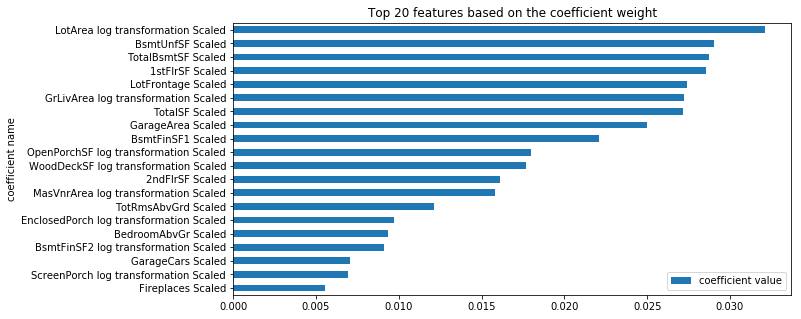

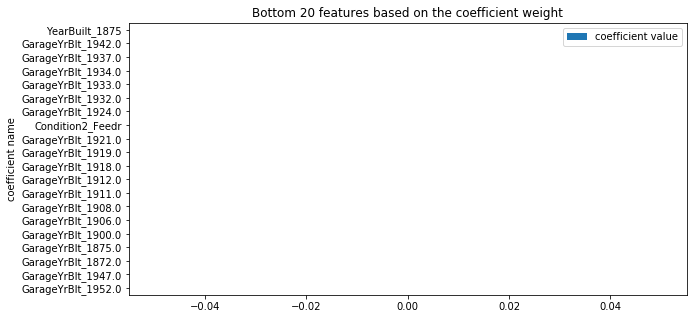

In [574]:
X_train, X_test, y_train, y_test = func_output_training_testing_datasets(cleaned_transformed_data, test_size=0.25)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=6, 
                             min_child_weight=1.5, n_estimators=7200,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=42, silent=1,
                             random_state =7)
estimator=model_xgb
estimator_name='Xgboost'
coefficient_df, rmse_test, mape_test, R_Squared_test=model_sklearn_model_gradient_boosting_fitting_output(X_train, y_train, X_test, y_test, estimator, estimator_name)

# Use randomized search to get the best parameters
# Based on the randomized search, below are the best hyperparameters for randomized search:

{'n_estimators': 6372, 'max_depth': 7, 'learning_rate': 0.01191919191919192, 'colsample_bytree': 0.2}

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 13.2min finished


Here's the best parameter from the randomized search: {'n_estimators': 6372, 'max_depth': 7, 'learning_rate': 0.01191919191919192, 'colsample_bytree': 0.2}
RMSE on the training set:  0.00417368019252194
RSquared on the training set:  0.9999824333297848


RMSE on the testing set:  0.3761479208812146
RSquared on the testing set:  0.8592317958320903
Mape on the testing set:  0.11759930636217143


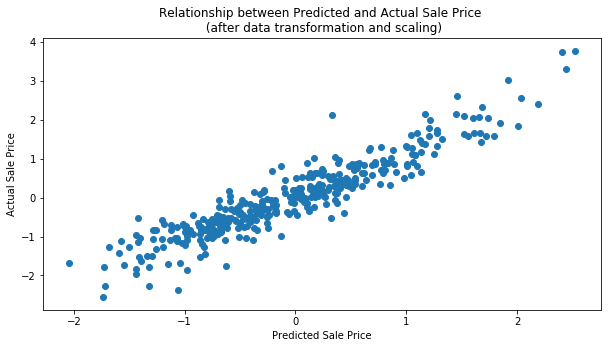

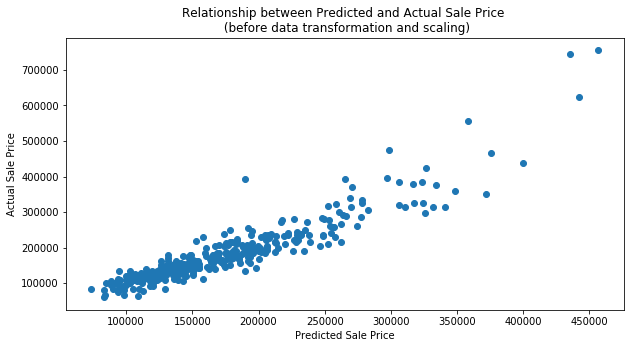

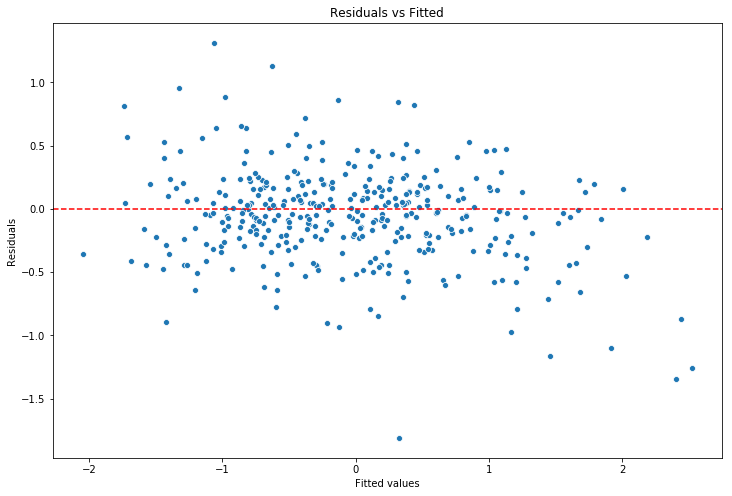

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


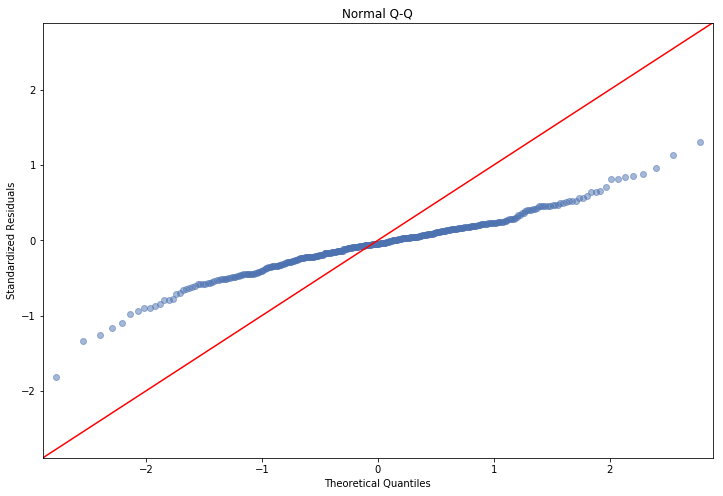

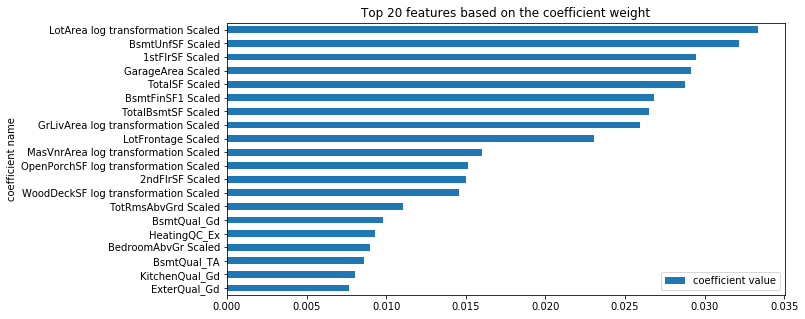

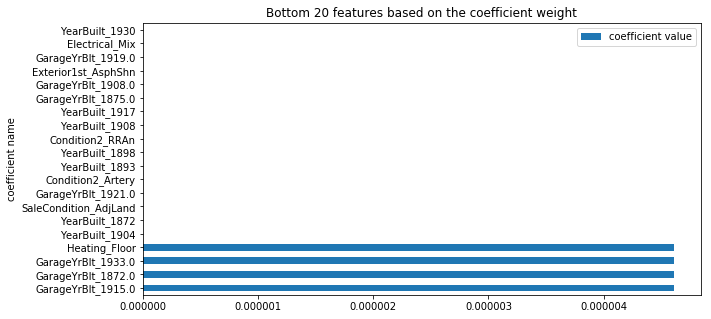

In [63]:
X_train, X_test, y_train, y_test = func_output_training_testing_datasets(cleaned_transformed_data, test_size=0.25)
random_grid={'n_estimators': np.linspace(start=100, stop=8000, num=100).astype('int'), 
             'learning_rate': np.linspace(start=0.05, stop=1, num=8), 
            'max_depth': np.linspace(start=4, stop=10, num=5).astype('int', 
            'colsample_bytree':np.linspace(start=0.1, stop=1, num=5)}
estimator=xgb.XGBRegressor()
estimator_name='Xgboost'
coefficient_df, rmse_test, mape_test, R_Squared_test=model_sklearn_model_gradient_boosting_randomized_search_fitting_output(random_grid, X_train, y_train, X_test, y_test, estimator, estimator_name)

# Based on the Grid Search, below are the best parameters:



{'colsample_bytree': 0.2, 'learning_rate': 0.01191919191919192, 'max_depth': 7, 'n_estimators': 6373}

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  8.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  8.4min finished


Here's the best parameter from the grid search: {'colsample_bytree': 0.2, 'learning_rate': 0.01191919191919192, 'max_depth': 7, 'n_estimators': 6373}
RMSE on the training set:  0.004169229297003936
RSquared on the training set:  0.9999824707766997


RMSE on the testing set:  0.3761477694634933
RSquared on the testing set:  0.8592319091640814
Mape on the testing set:  0.11759903857447296


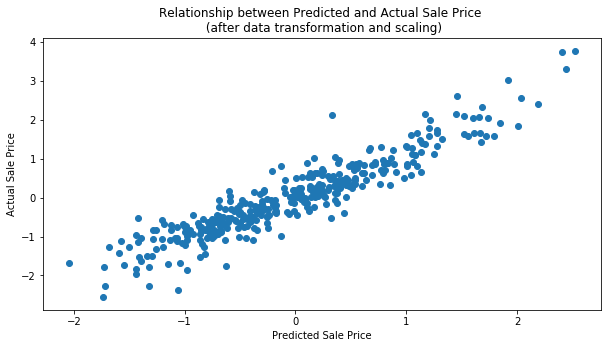

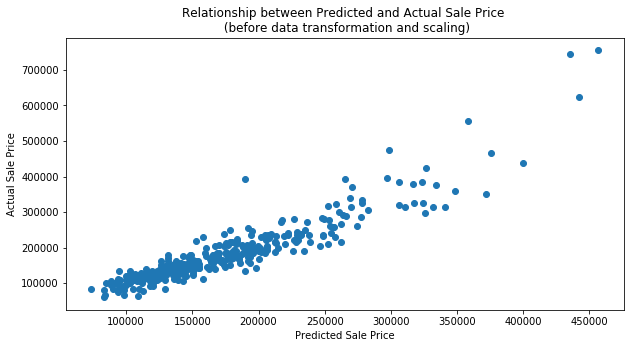

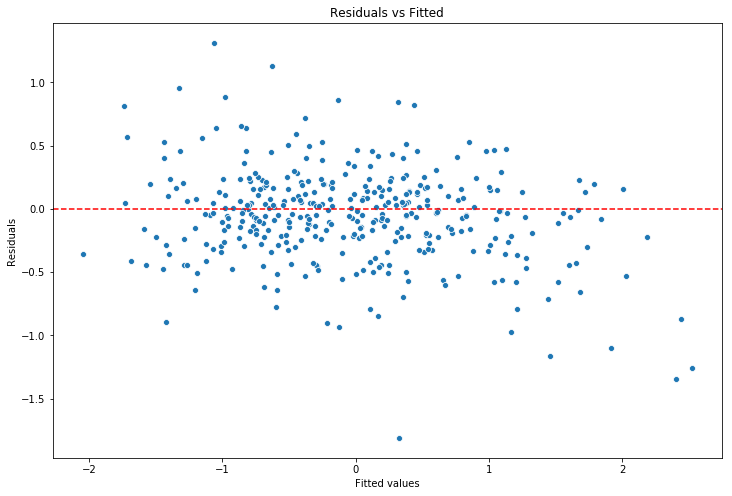

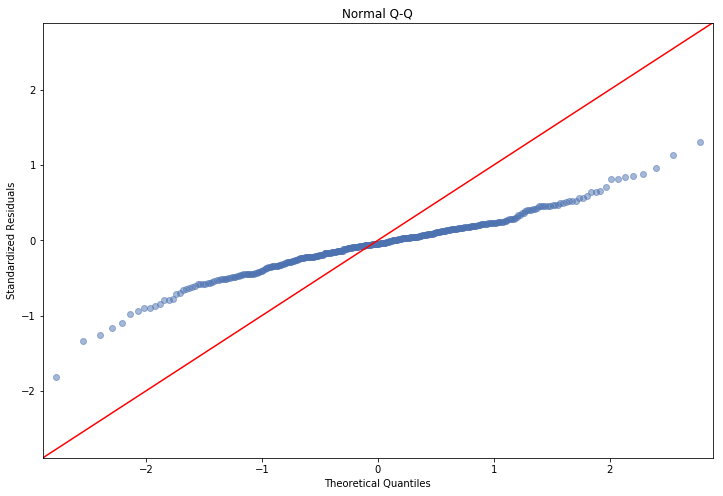

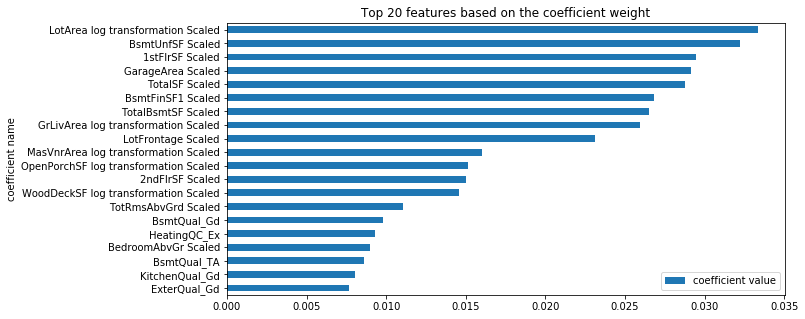

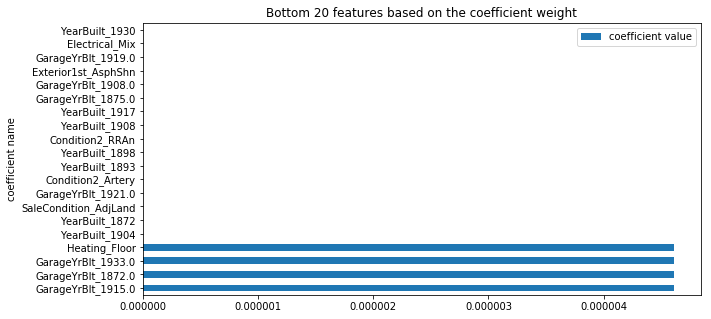

In [558]:
X_train, X_test, y_train, y_test = func_output_training_testing_datasets(cleaned_transformed_data, test_size=0.25)
param_grid={'n_estimators': np.linspace(start=6373, stop=6411, num=4).astype('int'), 'max_depth': [7], 'learning_rate': [0.01191919191919192], 'colsample_bytree': [0.2]}
estimator=xgb.XGBRegressor()
estimator_name='Xgboost'
coefficient_df, rmse_test, mape_test, R_Squared_test=model_sklearn_model_gradient_boosting_grid_search_fitting_output(param_grid, X_train, y_train, X_test, y_test, estimator, estimator_name)


In [62]:
best_xgb_estimator=xgb.XGBRegressor(colsample_bytree= 0.2, learning_rate=0.01191919191919192, max_depth=7, n_estimators=6373)

# Use LGB (Light Gradient Boosting Model):

RMSE on the training set:  0.2528846707796686
RSquared on the training set:  0.9355094441268963


RMSE on the testing set:  0.36631137676236564
RSquared on the testing set:  0.8664979136122214
Mape on the testing set:  0.11393892904029476


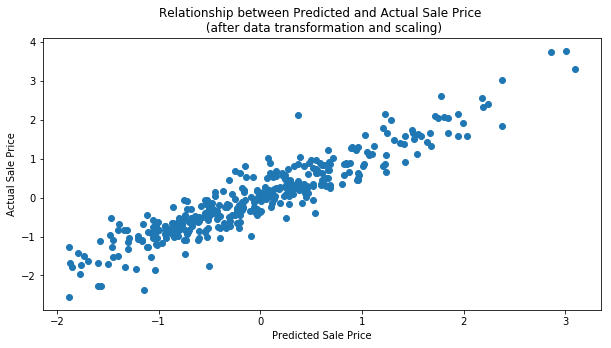

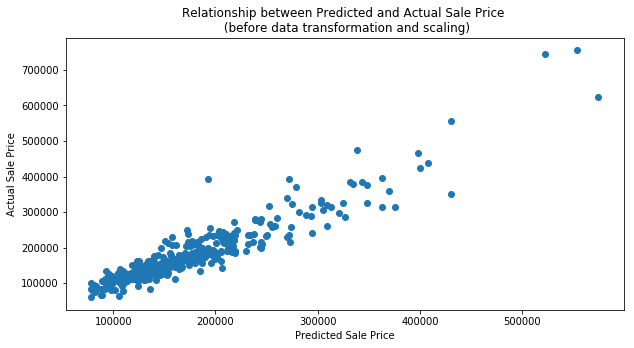

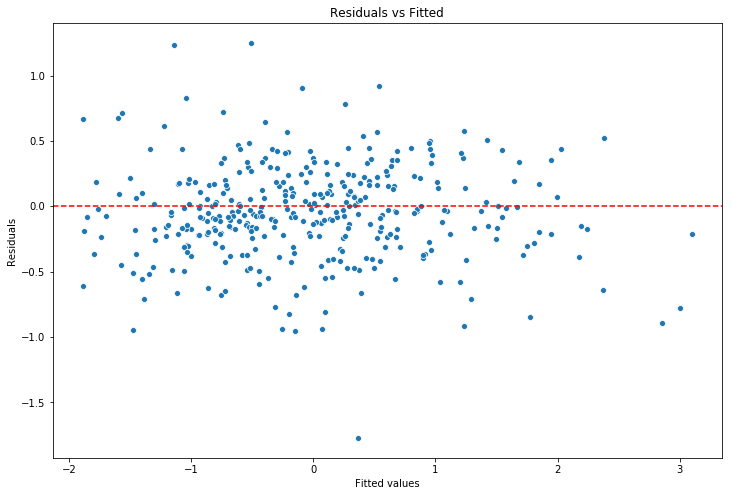

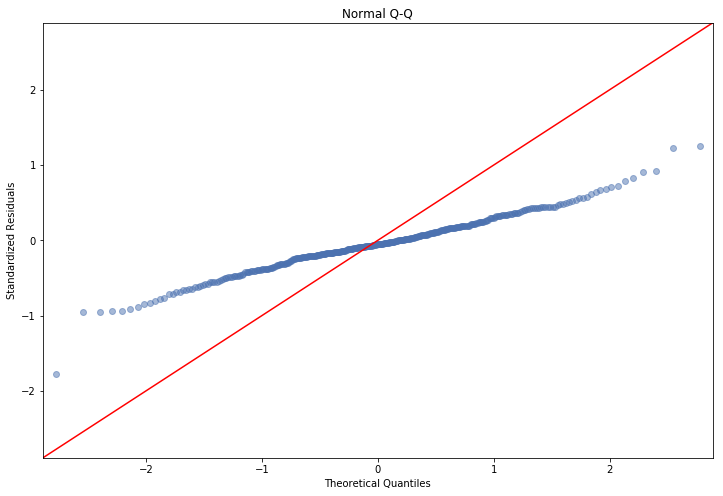

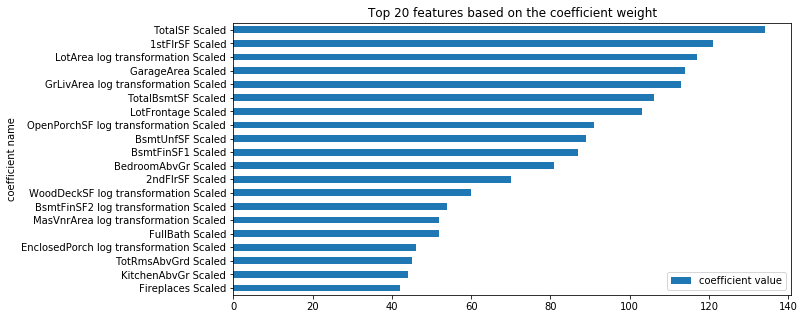

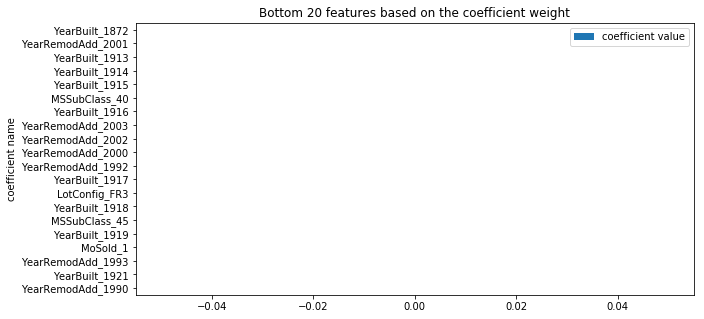

In [575]:
X_train, X_test, y_train, y_test = func_output_training_testing_datasets(cleaned_transformed_data, test_size=0.25)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
estimator=model_lgb 
estimator_name='Light GBM'
coefficient_df, rmse_test, mape_test, R_Squared_test=model_sklearn_model_gradient_boosting_fitting_output(X_train, y_train, X_test, y_test, estimator, estimator_name)

# Based on the randomized search, below are the best hyperparameters:
{'objective': 'regression', 'num_leaves': 10, 'n_estimators': 2823, 'min_data_in_leaf': 5, 'max_bin': 20, 'feature_fraction': 0.33333333333333337, 'bagging_fraction': 0.6}

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   27.5s finished


Here's the best parameter from the randomized search: {'objective': 'regression', 'num_leaves': 10, 'n_estimators': 2823, 'min_data_in_leaf': 5, 'max_bin': 20, 'feature_fraction': 0.33333333333333337, 'bagging_fraction': 0.6}
RMSE on the training set:  0.0013435503697664664
RSquared on the training set:  0.9999981796327344


RMSE on the testing set:  0.3766834614632381
RSquared on the testing set:  0.8588306730397932
Mape on the testing set:  0.11628055062142517


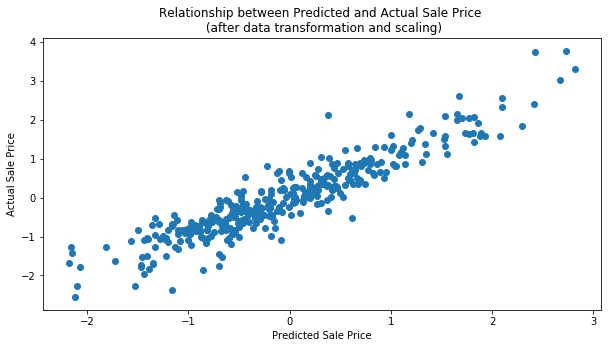

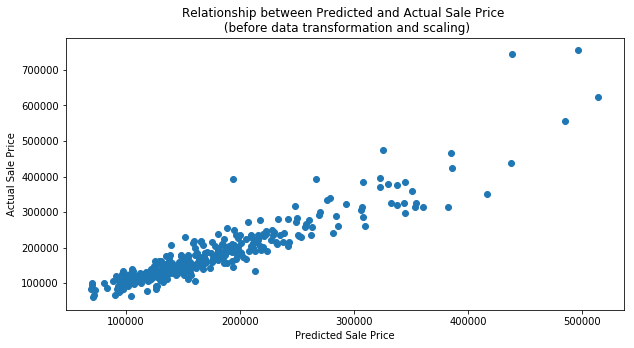

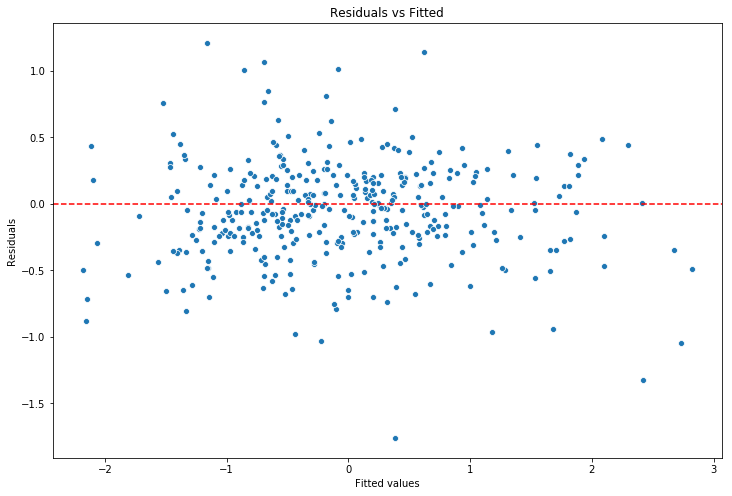

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


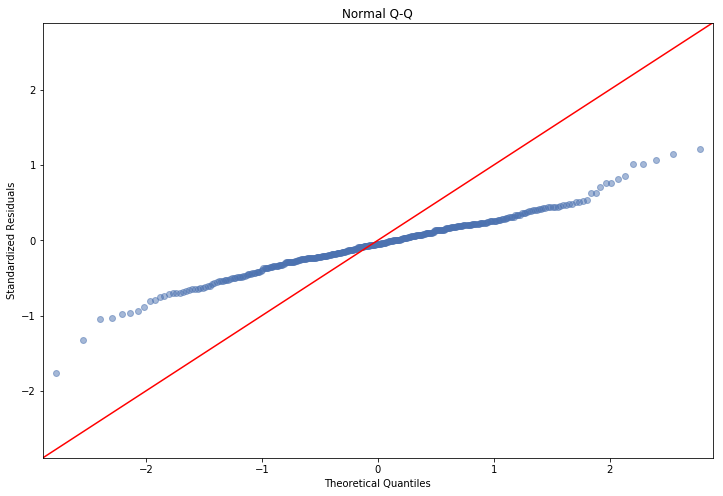

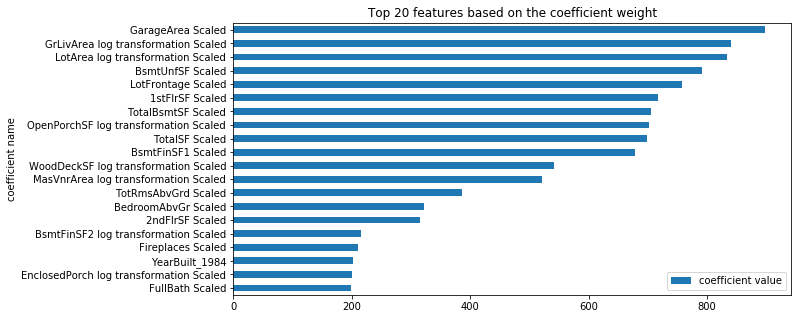

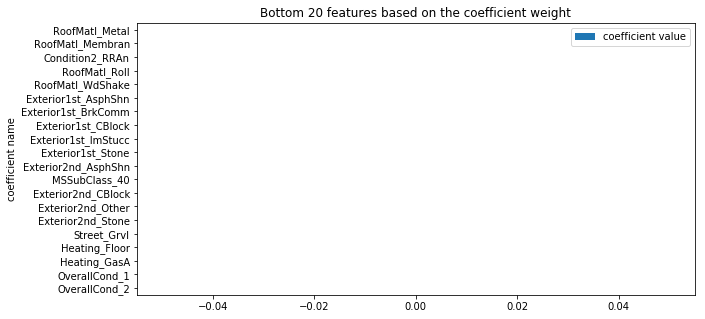

In [41]:
X_train, X_test, y_train, y_test = func_output_training_testing_datasets(cleaned_transformed_data, test_size=0.25)
random_grid={'objective': ['regression'],
             'num_leaves':np.linspace(start=2, stop=10, num=8).astype('int'), 
             'n_estimators': np.linspace(start=500, stop=3000, num=100).astype('int'), 
             'max_bin': np.linspace(start=5, stop=100, num=20).astype('int'), 
            'bagging_fraction': np.linspace(start=0.1, stop=1, num=10), 
            'feature_fraction':np.linspace(start=0.1, stop=0.8, num=4), 
            'min_data_in_leaf': np.linspace(start=5, stop=20, num=5).astype('int')}
estimator=lgb.LGBMRegressor()
coefficient_df, rmse_test, mape_test, R_Squared_test=model_sklearn_model_gradient_boosting_randomized_search_fitting_output(random_grid, X_train, y_train, X_test, y_test, estimator, estimator_name)

# Based on the Grid Search, below are the best parameters:

{'bagging_fraction': 0.6, 'feature_fraction': 0.33333333333333337, 'max_bin': 15, 'min_data_in_leaf': 5, 'n_estimators': 2823, 'num_leaves': 15, 'objective': 'regression'}


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   38.8s finished


Here's the best parameter from the grid search: {'bagging_fraction': 0.6, 'feature_fraction': 0.33333333333333337, 'max_bin': 15, 'min_data_in_leaf': 5, 'n_estimators': 2823, 'num_leaves': 15, 'objective': 'regression'}
RMSE on the training set:  6.254434880021407e-05
RSquared on the training set:  0.9999999960551793


RMSE on the testing set:  0.3618961544577255
RSquared on the testing set:  0.8696967717466858
Mape on the testing set:  0.1114518278887125


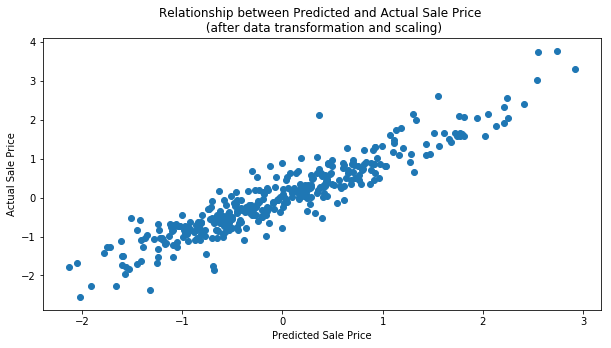

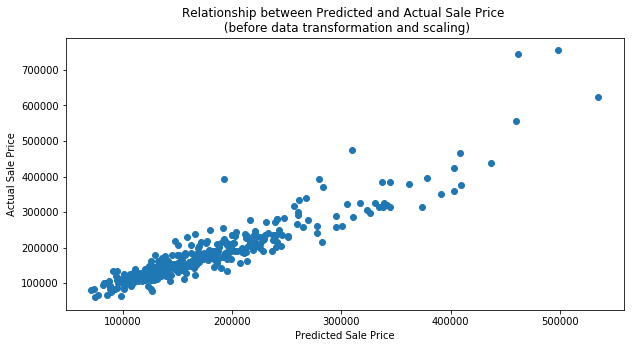

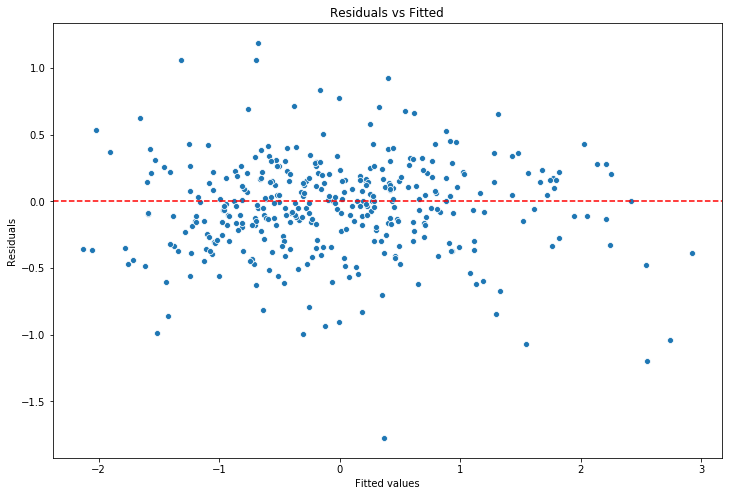

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


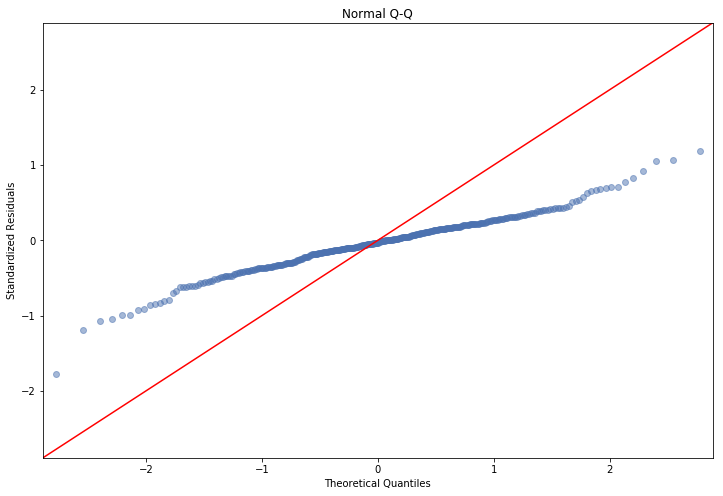

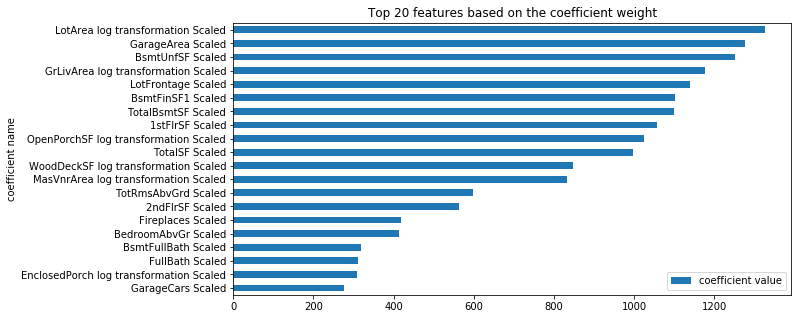

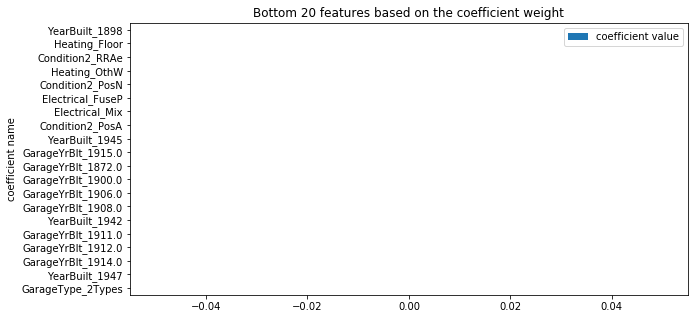

In [354]:
X_train, X_test, y_train, y_test = func_output_training_testing_datasets(cleaned_transformed_data, test_size=0.25)
param_grid={'objective': ['regression'],
             'num_leaves':[5, 10, 15], 
             'n_estimators': [2823], 
             'max_bin': [5, 10, 15, 20], 
            'bagging_fraction': [0.6], 
            'feature_fraction':[0.33333333333333337], 
            'min_data_in_leaf': [5]}
estimator=lgb.LGBMRegressor()
estimator_name='Xgboost'
coefficient_df, rmse_test, mape_test, R_Squared_test=model_sklearn_model_gradient_boosting_grid_search_fitting_output(param_grid, X_train, y_train, X_test, y_test, estimator, estimator_name)




In [60]:
Best_light_gbm=lgb.LGBMRegressor(bagging_fraction= 0.6, feature_fraction= 0.33333333333333337, max_bin=15, min_data_in_leaf= 5, n_estimators= 2823, num_leaves=15, objective='regression')

# Below are the best estimators I found after hyperparameter tuning:

In [49]:
Best_ridge_estimator

Ridge(alpha=156, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [50]:
Best_lasso_estimator

Lasso(alpha=0.00918, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [51]:
Best_lasso_estimator

Lasso(alpha=0.00918, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [66]:
best_elastic_net_estimator

ElasticNet(alpha=0.066, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
Best_gradient_boosting_estimator

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=7,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=15,
             min_weight_fraction_leaf=0.0, n_estimators=1981,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [64]:
best_xgb_estimator

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0, learning_rate=0.01191919191919192,
       max_delta_step=0, max_depth=7, min_child_weight=1, missing=None,
       n_estimators=6373, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [148]:
Best_light_gbm

LGBMRegressor(bagging_fraction=0.6, boosting_type='gbdt', class_weight=None,
       colsample_bytree=1.0, feature_fraction=0.33333333333333337,
       importance_type='split', learning_rate=0.1, max_bin=15,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_data_in_leaf=5, min_split_gain=0.0, n_estimators=2823,
       n_jobs=-1, num_leaves=15, objective='regression', random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

# Stack all the models that I've tried out together into one single model and estmate the model performance on the testing set:

# Compare the performance of base model by using RMSE.

In [363]:
list_of_model=[Best_ridge_estimator,
Best_lasso_estimator,
best_elastic_net_estimator,
Best_gradient_boosting_estimator,
best_xgb_estimator,
Best_light_gbm]

list_of_model_name=[
'Ridge',
'Lasso',
'Elastic Net',
'Gradient Boosting',
'Xg Boost',
'Light gbm']


rmse_list=[]
actual_rmse_list=[]
actual_mape_list=[]
for model_option in list_of_model_name:
    rmse_after_scaling_transformation, rmse_before_scaling_transformation, mape=performance_comparison_across_models(X_train, y_train, X_test, y_test, model_option, stacked_model_list=[], stacked_model_list_name=[])
    rmse_list.append(rmse_after_scaling_transformation)
    actual_rmse_list.append(rmse_before_scaling_transformation)
    actual_mape_list.append(mape)
    
performance_df=pd.DataFrame({'model name': list_of_model_name, 'RMSE': rmse_list, 'Actual RMSE': actual_rmse_list, 'Mape': actual_mape_list})


C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Here's the performance comparison across base models:

Light gbm is giving the best result

In [364]:
performance_df

model name      RMSE   Actual RMSE      Mape
0              Ridge  0.372920  30706.133666  0.431474
1              Lasso  0.375859  30490.569355  0.434702
2        Elastic Net  0.375070  30627.151324  0.433006
3  Gradient Boosting  0.374879  35395.717683  0.432431
4           Xg Boost  0.376148  39531.299038  0.415521
5          Light gbm  0.361896  34834.651064  0.434717

# Stack the models and check the performance:

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mape before transformation and scalling:  0.42875826657812477
MSE before transformation and scalling:  31285.720650390864


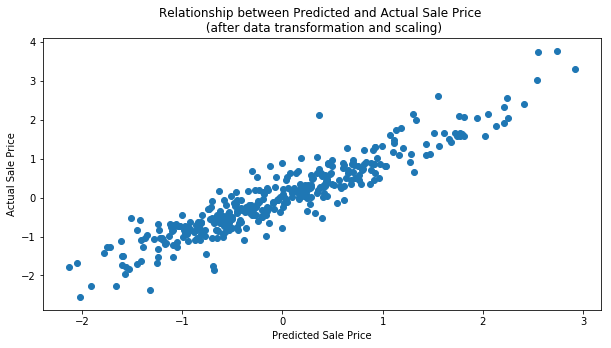

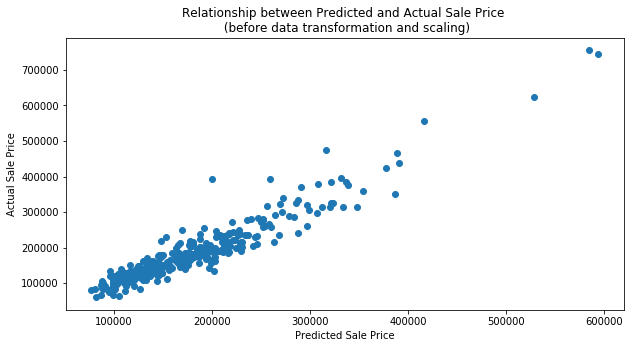

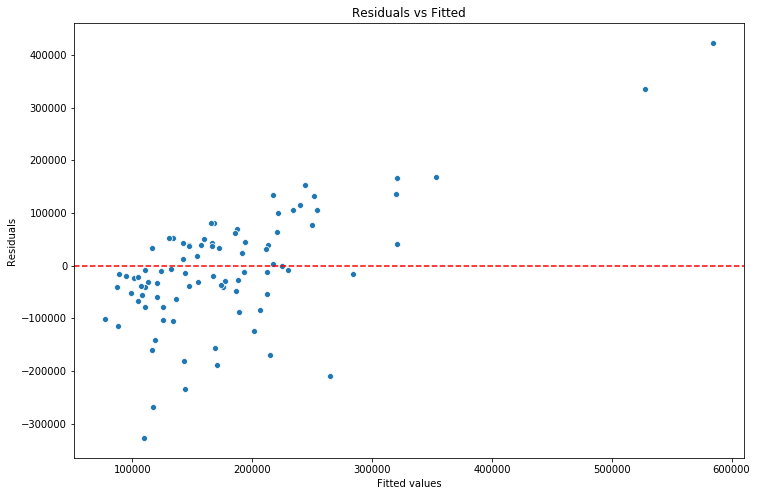

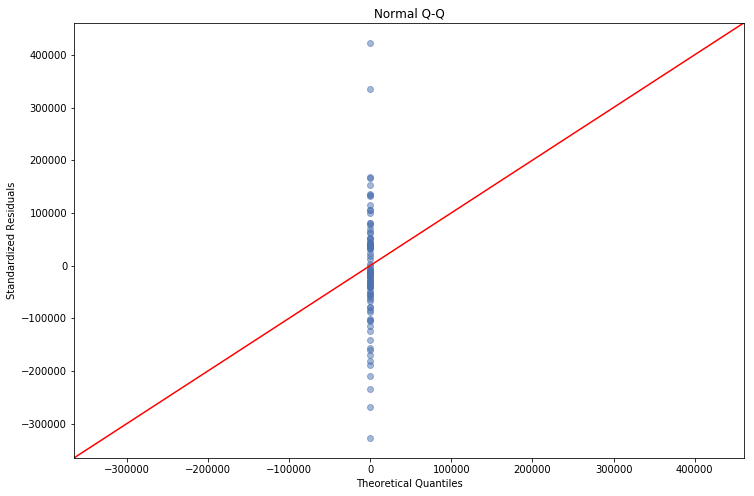

In [351]:
predicted_price_test, mape_test_actual, rmse_test_actual=stacking(list_of_model,list_of_model_name, X_test, y_test)

# Among all the base models, light GBM is performing the best. Stacked model is performing better than the based models.

# Load the Kaggle test data and output the prediction:

In [155]:
test_data=pd.read_csv("C:/Users/yuka.abe/Desktop/Untitled Folder/Housing Price Prediction Project/Data/test.csv")

# Use stacked model for predicting house price in the test data and export the submission file

In [430]:
new_X_test=test_data
model_option='Stacked Model'
stacked_model_list=[Best_ridge_estimator,
Best_lasso_estimator,
best_elastic_net_estimator,
Best_gradient_boosting_estimator,
best_xgb_estimator,
Best_light_gbm]

stacked_model_list_name=['Best_ridge_estimator',
'Best_lasso_estimator',
'best_elastic_net_estimator',
'Best_gradient_boosting_estimator',
'best_xgb_estimator',
'Best_light_gbm']

model_prediction_actual_price=end_to_end_testing_data_prediction(X_train, y_train, new_X_test, model_option, stacked_model_list=stacked_model_list, stacked_model_list_name=stacked_model_list_name)

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\yuka.abe\AppData\Local\

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\yuka.abe\AppData\Local\

In [431]:
new_X_test=test_data
model_option='Light gbm'
model_prediction_actual_price=end_to_end_testing_data_prediction(X_train, y_train, new_X_test, model_option, stacked_model_list=stacked_model_list, stacked_model_list_name=stacked_model_list_name)

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\yuka.abe\AppData\Local\

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\yuka.abe\AppData\Local\

# Create a small application for house price prediction within Jupyter notebook:

In [555]:
def end_to_end_demo_prediction(X_train, y_train, new_X_test, stacked_model_list, stacked_model_list_name):
    cleaned_data_new_test_set=func_data_cleaning_without_deleteing_data(new_X_test)
    cleaned_transformed_data_new_test_set=func_feature_engineering_dv_not_included(cleaned_data_new_test_set, transformation_type='log transformation', scaling_type='Standard Scaler')

    cleaned_data=func_data_cleaning(training_data)
    cleaned_transformed_data=func_feature_engineering(cleaned_data, transformation_type='log transformation', scaling_type='Standard Scaler')

    columns_to_remove=[i for i  in cleaned_transformed_data_new_test_set.columns if i not in cleaned_transformed_data.columns]
    columns_to_add=[i for i  in cleaned_transformed_data.columns if i not in cleaned_transformed_data_new_test_set.columns]

    #Compare the test data with training data, add the columns that are needed and remove the ones that are not trained in the model

    for column in columns_to_add:
        cleaned_transformed_data_new_test_set[column]=0

    for column in columns_to_remove:
        del cleaned_transformed_data_new_test_set[column]

    del cleaned_transformed_data_new_test_set['SalePrice log transformation Scaled']

    cleaned_transformed_data_new_test_set=cleaned_transformed_data_new_test_set[X_train.columns]

    initial_df=pd.DataFrame(np.arange(0, cleaned_transformed_data_new_test_set.shape[0]), columns=['initial'])
    
    for n in np.arange(0,len(stacked_model_list_name)):
        model=stacked_model_list[n]
        model_name=stacked_model_list_name[n]

        model.fit(X_train, y_train)
        prediction_test=model.predict(cleaned_transformed_data_new_test_set)
        initial_df=pd.merge(initial_df, pd.DataFrame(prediction_test, columns=[model_name]), left_index=True, right_index=True)

    del initial_df['initial']

    cleaned_data=func_data_cleaning(training_data)
    transformed_data=func_data_transformation_transformation_only(cleaned_data, transformation_type='log transformation')
    transformed_dv_mean=np.mean(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])
    transformed_dv_std=np.std(transformed_data[transformed_data.columns[transformed_data.columns.str.contains('SalePrice')]])


    #Caculate the average predicted price:
    for column in initial_df.columns:

        new_column_name=column+"_prediction_untransformed_unscaled"
        predicted_price_transformed_unscaled=initial_df[column]*transformed_dv_std.values[0]+transformed_dv_mean.values[0]
        predicted_price=math.e**predicted_price_transformed_unscaled -1 

        initial_df[new_column_name]=predicted_price

    model_prediction_actual_price=np.mean(initial_df[initial_df.columns[initial_df.columns.str.contains('untransformed_unscaled')]], axis=1)   

    return model_prediction_actual_price

def func_price_prediction_application_demo(basement_squarefeet, firstfloor_squarefeet, abovegroundlivingarea_squarefeet, size_garage_car_capacity, size_garage_square_feet):
    df_demo=test_data.loc[test_data['Id']==1461]
    df_demo['TotalBsmtSF']=basement_squarefeet
    df_demo['1stFlrSF']=firstfloor_squarefeet
    df_demo['GrLivArea']=abovegroundlivingarea_squarefeet
    df_demo['GarageCars']=size_garage_car_capacity
    df_demo['GarageArea']=size_garage_square_feet
    new_X_test=df_demo
    demo_prediction=end_to_end_demo_prediction(X_train, y_train, new_X_test, stacked_model_list, stacked_model_list_name)
    print ("House price prediction: ",demo_prediction[0])    

In [556]:
basement_squarefeet_widget = FloatSlider(min=0.0, max=6110, step=10, value=1000)
firstfloor_squarefeet_widget = FloatSlider(min=334, max=4692, step=10, value=1500)
abovegroundlivingarea_squarefeet_widget = FloatSlider(min=334, max=5642, step=10, value=1500)
size_garage_car_capacity_widget = FloatSlider(min=0, max=4, step=1, value=3)
size_garage_square_feet_widget = FloatSlider(min=0, max=1418, step=1, value=472)

In [559]:
import warnings
warnings.filterwarnings("ignore")
interact(func_price_prediction_application_demo,basement_squarefeet=basement_squarefeet_widget, firstfloor_squarefeet=firstfloor_squarefeet_widget,abovegroundlivingarea_squarefeet=abovegroundlivingarea_squarefeet_widget,size_garage_car_capacity=size_garage_car_capacity_widget, size_garage_square_feet= size_garage_square_feet_widget );

interactive(children=(FloatSlider(value=2140.0, description='basement_squarefeet', max=6110.0, step=10.0), Flo…